In [1]:
n_sigma_cut = 0.5 # main force for the PID

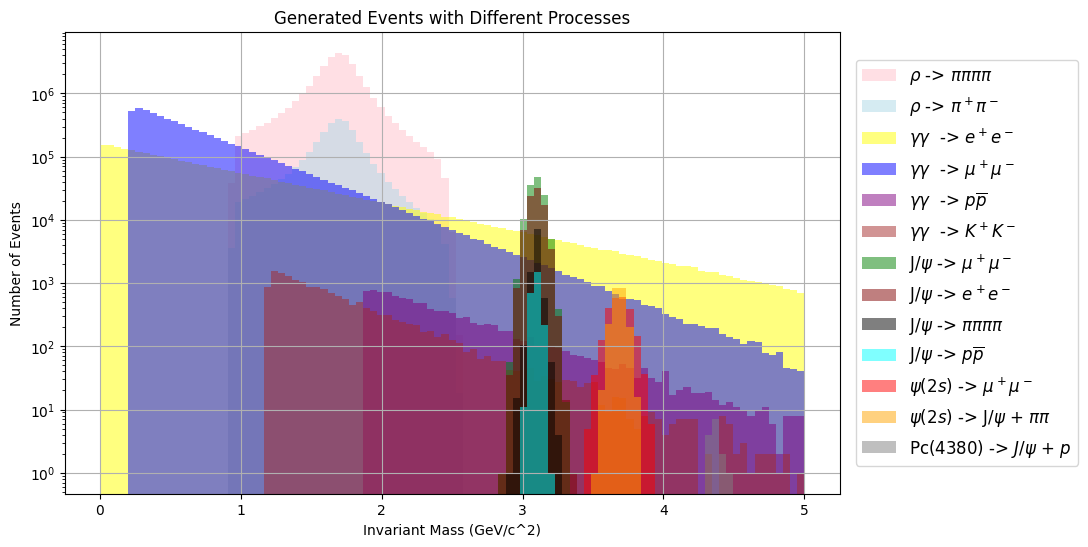

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Event generation parameters
n_photon_photon = 6768120
n_jpsi = 124800
n_psi2S_muons = 2320
n_psi2S_jpsi_pions = 2120
n_pq1 = 14
#n_pq2 = 25
n_pp_kaon = 16920
n_jpsi_protons = 2440
n_jpsi_4pi = 9470
#n_jpsi_3pi = 500
n_photon_photon_proton = 10840 
n_photon_photon_electron = 2971120
n_jpsi_electrons = 84640 #Run 3 & 4
# n_rhoprime = 2886800
# n_rho_4pi = 

n_rhoprime = 2886800
n_rho_4pi = 31950960

n_training= 30000

# Constants (GeV/c^2)
m_muon = 0.105658  # Muon mass
m_jpsi = 3.0969    # J/psi mass
m_psi2S = 3.6861   # Psi(2S) mass
m_pion = 0.13957   # Charged pion mass
m_proton= .938 
m_pentaquark= 4.38
m_electron= .0005
m_kaon= 0.49367
m_rho = 0.775
m_rho_prime = 1.465
m_rho_1700 = 1.7 

def isotropic_two_body_decay(mother_mass, daughter_mass1, daughter_mass2):
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    p = tpc_momentum_resolution(p)
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution(momentum):
    a = 0.005
    b = 0.01
    resolution = np.sqrt(a**2 + (b * momentum)**2)
    smeared_momentum = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum

def generate_photon_photon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_muon  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(mass, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, E1, E2 = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#NEW Rho Prime-------------------

def breit_wigner(m0, gamma, size=1):
    return m0 + 0.5 * gamma * np.tan(np.pi * (np.random.rand(size) - 0.5))

def relativistic_breit_wigner(m0, gamma, size=1):
    """
    Sample using relativistic Breit-Wigner:
    P(m) ∝ 1 / [(m^2 - m0^2)^2 + (m0 * gamma)^2]
    """
    m = np.zeros(size)
    for i in range(size):
        accepted = False
        while not accepted:
            # Sample uniformly in a window around the peak
            m_candidate = np.random.uniform(m0 - 3*gamma, m0 + 3*gamma)
            
            bw = 1.0 / ((m_candidate**2 - m0**2)**2 + (m0 * gamma)**2)
            bw_max = 1.0 / ((0)**2 + (m0 * gamma)**2)  # peak
            
            if np.random.rand() < bw / bw_max:
                m[i] = m_candidate
                accepted = True
    return m

def generate_rhoprime_events(n_events, m=1.7, gamma=0.250):
    events = []
    for _ in range(n_events):
        masses_rho_prime = relativistic_breit_wigner(m, gamma, size=1)[0]
        if masses_rho_prime < 2 * m_pion:
            continue
        pion1_p, pion2_p, E1, E2 = isotropic_two_body_decay(masses_rho_prime, m_pion, m_pion)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        events.append([pion1_p, pion2_p])
        # events.append(mass)
    return np.array(events)

def generate_psi2S_muons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(m_psi2S, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_psi2S_jpsi_pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        jpsi_p, pion_p, jpsi_E, pion_E = isotropic_two_body_decay(m_psi2S, m_jpsi, 2 * m_pion)
        muon1_p, muon2_p, muon1_E, muon2_E = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # jpsi_p = tpc_momentum_resolution(np.linalg.norm(jpsi_p))
        # pion_p = tpc_momentum_resolution(np.linalg.norm(pion_p))
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        smearedTracks.append(pion_p)
        smearedTracks.append(pion_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_protons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(m_jpsi, m_proton, m_proton)
        # proton1_p = tpc_momentum_resolution(np.linalg.norm(proton1_p))
        # proton2_p = tpc_momentum_resolution(np.linalg.norm(proton2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)
#generate_jpsi_protons_events(n_events)

#NEW jpsi->ee
def generate_jpsi_electrons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        electron1_p, electron2_p, _, _ = isotropic_two_body_decay(m_jpsi, m_electron, m_electron)
        # proton1_p = tpc_momentum_resolution(np.linalg.norm(proton1_p))
        # proton2_p = tpc_momentum_resolution(np.linalg.norm(proton2_p))
        smearedTracks.append(electron1_p)
        smearedTracks.append(electron2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_pp_kaon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_kaon + 0.2 # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        pp_kaon1_p, pp_kaon2_p, _, _ = isotropic_two_body_decay(mass, m_kaon, m_kaon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(pp_kaon1_p)
        smearedTracks.append(pp_kaon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#-----------New gamma + gamma -> proton + proton

def generate_photon_photon_proton_events(n_events):
    masses = np.random.exponential(0.595, n_events) + 2 * m_proton  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(mass, m_proton, m_proton)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#-----------New gamma + gamma -> electrons

def generate_photon_photon_electron_events(n_events):
    masses = np.random.exponential(0.925, n_events) + 2 * m_electron  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        electron1_p, electron2_p, _, _ = isotropic_two_body_decay(mass, m_electron, m_electron)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(electron1_p)
        smearedTracks.append(electron2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def isotropic_three_body_decay(mother_mass, daughter_mass1, daughter_mass2, daughter_mass3):
    """
    Simulates an isotropic three-body decay, distributing energy and momentum according to phase space constraints.
    Returns the momenta and energies of the three daughter particles.
    """
    # Total energy available for distribution after accounting for minimum required energy
    total_energy_available = (mother_mass - daughter_mass1 - daughter_mass2 - daughter_mass3)
    
    if total_energy_available <= 0:
        raise ValueError("Insufficient mass for a three-body decay.")

    # Randomly divide the available energy between the three daughters
    available_energy1 = np.random.uniform(0, total_energy_available)
    available_energy2 = np.random.uniform(0, total_energy_available - available_energy1)
    available_energy3 = total_energy_available - available_energy1 - available_energy2
    
    E1 = daughter_mass1 + available_energy1
    E2 = daughter_mass2 + available_energy2
    E3 = daughter_mass3 + available_energy3

    # Compute the momenta from the energies
    p1 = np.sqrt(E1**2 - daughter_mass1**2)
    p2 = np.sqrt(E2**2 - daughter_mass2**2)
    p3 = np.sqrt(E3**2 - daughter_mass3**2)
    
    # Random angles for isotropic decay
    theta1 = np.arccos(2 * np.random.rand() - 1)
    phi1 = 2 * np.pi * np.random.rand()
    
    theta2 = np.arccos(2 * np.random.rand() - 1)
    phi2 = 2 * np.pi * np.random.rand()
    
    # Calculate the momenta in 3D (isotropic decay)
    p1_vec = np.array([p1 * np.sin(theta1) * np.cos(phi1), p1 * np.sin(theta1) * np.sin(phi1), p1 * np.cos(theta1)])
    p2_vec = np.array([p2 * np.sin(theta2) * np.cos(phi2), p2 * np.sin(theta2) * np.sin(phi2), p2 * np.cos(theta2)])
    p3_vec = -p1_vec - p2_vec  # Momentum conservation
    
    return p1_vec, p2_vec, p3_vec, E1, E2, E3


def boost_to_lab_frame(momentum, boost_vector):
    """
    Boosts the momentum of a particle to the lab frame using the boost vector.
    """
    # Check if the boost vector is effectively zero (no boost needed)
    if np.linalg.norm(boost_vector) < 1e-10:
        print("error1")
        return momentum
    
    beta = boost_vector / np.linalg.norm(boost_vector)
    beta_norm_sq = np.linalg.norm(beta)**2
    
    # Ensure that beta_norm_sq < 1 (speed of light constraint)
    if beta_norm_sq >= 1.0:
        print("error2")
        return momentum  # No valid boost
    
    gamma = 1.0 / np.sqrt(1 - beta_norm_sq)
    dot_product = np.dot(momentum, beta)
    energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
    
    boosted_energy = gamma * (energy + dot_product)
    boosted_momentum = momentum + (gamma - 1) * dot_product / beta_norm_sq * beta + gamma * energy * beta
    
    return boosted_momentum

def boost_along_axis(momentum, beta, axis):
    """
    Boosts a particle along a single axis.
    
    Parameters:
    - momentum: 3D momentum vector of the particle to be boosted
    - beta: velocity (as a fraction of the speed of light) along the chosen axis
    - axis: axis along which to boost ('x', 'y', or 'z')
    
    Returns:
    - boosted_momentum: the 3D momentum vector after the boost along the given axis
    """
    if abs(beta) >= 1:
        print("error2")
        raise ValueError("Beta must be less than 1 for a valid boost.")
    
    gamma = 1.0 / np.sqrt(1 - beta**2)
    
    # Boost along the x-axis
    if axis == 'x':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_px = gamma * (momentum[0] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[0])
        boosted_momentum = np.array([boosted_px, momentum[1], momentum[2]])
    
    # Boost along the y-axis
    elif axis == 'y':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_py = gamma * (momentum[1] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[1])
        boosted_momentum = np.array([momentum[0], boosted_py, momentum[2]])
    
    # Boost along the z-axis
    elif axis == 'z':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_pz = gamma * (momentum[2] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[2])
        boosted_momentum = np.array([momentum[0], momentum[1], boosted_pz])
    
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")
    
    return boosted_momentum, boosted_energy

def boost_to_lab_frame_separate(momentum, boost_vector):
    """
    Boosts the particle's 3D momentum vector using separate boosts along the x, y, and z axes.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - boost_vector: 3D velocity vector (as a fraction of the speed of light)
    
    Returns:
    - boosted_momentum: the 3D momentum vector after boosting along x, y, and z
    """
    boosted_momentum = momentum
    # Boost along x
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[0], 'x')
    # Boost along y
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[1], 'y')
    # Boost along z
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[2], 'z')
    
    px, py, pz = boosted_momentum
    p_total = np.sqrt(px**2 + py**2 + pz**2)
    
    # Calculate new theta (polar angle)
    theta_prime = np.arccos(pz / p_total) if p_total > 0 else 0.0
    
    # Calculate new phi (azimuthal angle)
    phi_prime = np.arctan2(py, px)

    return boosted_momentum, theta_prime, phi_prime


def generate_psi2S_jpsi_pions_events_fixed(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        
        # Boost the muons back to the lab frame using the momentum of the J/psi from Step 1
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        smearedTracks.append(muon1_p_lab)
        smearedTracks.append(muon2_p_lab)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

def isotropic_two_body_decay_no_smearing(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay without smearing.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution_3d(momentum_vec):
    """
    Applies TPC momentum resolution smearing to each component of the momentum vector.
    """
    smeared_momentum_vec = np.zeros(3)
    for i in range(3):
        momentum = momentum_vec[i]
        a = 0.005
        b = 0.01
        resolution = np.sqrt(a**2 + (b * momentum)**2)
        smeared_momentum_vec[i] = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum_vec

def generate_psi2S_jpsi_pions_events_smearing_after_boost(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (without smearing)
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay_no_smearing(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        # Step 4: Apply smearing to the muons after boosting to the lab frame (component-wise)
        muon1_p_lab_smeared = tpc_momentum_resolution_3d(muon1_p_lab)
        muon2_p_lab_smeared = tpc_momentum_resolution_3d(muon2_p_lab)
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

# def plot_event_distribution(events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq):
#     plt.figure(figsize=(10, 6))
#     bins = np.linspace(0, 5, 100)
#     plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
#     plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
#     plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2S) -> 2 muons', color='red')
#     plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2S) -> J/psi + 2 pions', color='orange')
#     plt.hist(events_jpsi_protons, bins, alpha=0.5, label='J/psi -> 2 protons', color='cyan')
#     plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
#     plt.hist(events_pq, bins, alpha=0.5, label='pentaquark(2S) -> J/psi + 1 proton', color='gray')
#     plt.xlabel('Invariant Mass (GeV/c^2)')
#     plt.yscale('log')  # Log scale for y-axis
#     plt.ylabel('Number of Events')
#     plt.title('Generated Events with Different Processes')
#     plt.legend(loc='upper right')
#     plt.grid(True)
#     plt.show()

def plot_event_distribution(events_rho_4pions, events_rhoprime, events_photon_photon_electron, events_photon_photon, events_photon_photon_proton, events_pp_kaons, events_jpsi, events_jpsi_electrons, events_jpsi_4pions, events_jpsi_protons, events_psi2S_muons, events_psi2S_jpsi_pions, events_pq):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_rho_4pions, bins, alpha=0.5, label=r'$\rho$ -> $\pi \pi \pi \pi$', color='pink')
    plt.hist(events_rhoprime, bins, alpha=0.5, label=r'$\rho$ -> $\pi^+ \pi^-$', color='lightblue')
    plt.hist(events_photon_photon_electron, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $e^+ e^-$', color='yellow')
    plt.hist(events_photon_photon, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$', color='blue')
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $p \overline{p}$', color='purple')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $K^+ K^-$', color='brown')
    plt.hist(events_jpsi, bins, alpha=0.5, label=r'J/$\psi$ -> $\mu^+ \mu^-$', color='green')
    plt.hist(events_jpsi_electrons, bins, alpha=0.5, label=r'J/$\psi$ -> $e^+ e^-$', color='maroon')
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label=r'J/$\psi$ -> $\pi \pi \pi \pi$', color='black')
    plt.hist(events_jpsi_protons, bins, alpha=0.5, label=r'J/$\psi$ -> $p \overline{p}$', color='cyan')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label=r'$\psi(2s)$ -> $\mu^+ \mu^-$', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label=r'$\psi(2s)$ -> J/$\psi$ + $\pi \pi$', color='orange')
    plt.hist(events_pq, bins, alpha=0.5, label=r'Pc(4380) -> $J/ \psi$ + $p$', color='gray')

    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.savefig('all_final_masses.pdf')
    plt.legend(
        loc='center left',
        bbox_to_anchor=(1.01, 0.5),   # 1.02 pushes it just outside the right edge
        fancybox=True,
        shadow=False,
        ncol=1,                       # vertical list (recommended for side placement)
        fontsize=12,
        markerscale=1.3
    )
    #plt.legend(loc='upper right', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})


def compute_invariant_mass(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_muon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_kaon(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_kaon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_proton(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_proton  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_electron(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_electron  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_pion(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_pion  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_jpsi_proton(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_proton(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_kaon(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_kaon(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_pion(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_pion(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_electron(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_electron(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events(events):
    """
    Computes the invariant mass for a list of events, where each event contains a list of tracks.
    
    Parameters:
    - events: A list of events, where each event is a list of tracks.
              Each track is a dictionary containing:
              - 'momentum': a numpy array representing the 3-momentum of the track
              - 'mass': the mass of the particle
    
    Returns:
    - invariant_masses: A list of invariant masses, one for each event.
    """
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def isotropic_two_body_decay_with_angles(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay with angle saving (theta, phi).
    Returns momenta, energies, and angles.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    
    return p1, p2, E1, E2, theta, phi

def reconstruct_3d_momentum(smeared_p, theta, phi):
    """
    Reconstructs the 3D momentum components using the smeared momentum magnitude and saved angles (theta, phi).
    """
    px = smeared_p * np.sin(theta) * np.cos(phi)
    py = smeared_p * np.sin(theta) * np.sin(phi)
    pz = smeared_p * np.cos(theta)
    
    return np.array([px, py, pz])

def calculate_boost_vector(momentum, energy):
    """
    Calculates the velocity (beta) from the momentum and energy to be used as the boost vector.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - energy: total energy of the particle
    
    Returns:
    - beta: 3D velocity vector (beta = p / E)
    """
    beta = momentum / energy
    return beta

def generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        
        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(pion1_E)
        smearedTracks.append(pion2_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
    # return np.array(events)


def generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(proton_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(proton_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
#generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pentaquark)

# def generate_jpsi_four_pions(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

#         pion3_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
#         pion4_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion4_p_rest, boost_vector)
        
#         # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))
#         smeared_pion4_p = tpc_momentum_resolution(np.linalg.norm(pion4_p_lab))

        
#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_pion3_p, theta_prime, phi_prime) #<- correct
#         smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_pion4_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(smeared_pion3_p_lab)
#         smearedTracks.append(smeared_pion4_p_lab)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(pion2_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)
#         smearedTracks.append(pion2_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)
    
#     return events

def lorentz_boost(p_vec, mass, beta):
    """
    Boosts a particle's 4-vector from its rest frame to the lab frame using a Lorentz transformation.
    
    Parameters:
      p_vec: 3D numpy array of the particle's momentum in the rest frame.
      mass: Mass of the particle.
      beta: 3D numpy array representing the boost velocity vector (v/c). Its norm must be less than 1.
    
    Returns:
      E_prime: Boosted energy.
      p_prime: Boosted 3-momentum (numpy array).
    """
    beta2 = np.dot(beta, beta)
    if beta2 >= 1:
        raise ValueError("Beta must be less than 1.")
    gamma = 1.0 / np.sqrt(1 - beta2)
    # Energy in the particle's rest frame (before boost)
    E = np.sqrt(np.linalg.norm(p_vec)**2 + mass**2)
    p_dot_beta = np.dot(p_vec, beta)
    # Lorentz transformation for the time component
    E_prime = gamma * (E + p_dot_beta)
    # Lorentz transformation for the spatial part
    p_prime = p_vec + ((gamma - 1) * p_dot_beta / beta2 + gamma * E) * beta
    return E_prime, p_prime

def generate_jpsi_four_pions(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ decays to ρ + 2 pions (three-body decay)
        # Here, the first daughter is interpreted as the ρ.
        # The decay returns: [rho momentum, pion1 momentum, pion2 momentum, rho energy, pion1 energy, pion2 energy]
        rho_p, pion1_p, pion2_p, rho_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
        # Step 2: ρ decays to two pions in its rest frame (with angles saved).
        # Here, we generate the two pions from the ρ decay in the ρ rest frame.
        pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost vector for the ρ.
        # Use the ρ's lab momentum and energy to get the velocity: beta = p/E.
        beta = rho_p / rho_E
        
        # Step 4: Boost the ρ decay products using the new Lorentz boost function.
        # This will naturally accelerate one pion (if its momentum is aligned with beta)
        # and decelerate the other (if anti-aligned).
        E3_lab, pion3_p_lab = lorentz_boost(pion3_p_rest, m_pion, beta)
        E4_lab, pion4_p_lab = lorentz_boost(pion4_p_rest, m_pion, beta)
        
        # Step 5: Optionally apply momentum smearing (if desired) to the boosted momenta.
        # Here we smear only the magnitude and then reconstruct the 3D vector with the same direction.
        p3_lab_mag = np.linalg.norm(pion3_p_lab)
        p4_lab_mag = np.linalg.norm(pion4_p_lab)
        smeared_p3_mag = tpc_momentum_resolution(p3_lab_mag)
        smeared_p4_mag = tpc_momentum_resolution(p4_lab_mag)
        
        # Obtain the angles from the boosted momentum
        theta3 = np.arccos(pion3_p_lab[2] / p3_lab_mag) if p3_lab_mag > 0 else 0.0
        phi3 = np.arctan2(pion3_p_lab[1], pion3_p_lab[0])
        theta4 = np.arccos(pion4_p_lab[2] / p4_lab_mag) if p4_lab_mag > 0 else 0.0
        phi4 = np.arctan2(pion4_p_lab[1], pion4_p_lab[0])
        
        # Reconstruct the smeared momentum vectors with the same directions.
        smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_p3_mag, theta3, phi3)
        smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_p4_mag, theta4, phi4)
        
        # Recalculate energies for the smeared momenta (using pion mass)
        E3_smeared = np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion**2)
        E4_smeared = np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion**2)
        
        # Step 6: Construct the final event.
        # Final state: the two pions from the ρ decay (smeared) and the two pions directly from the three-body decay.
        # Also, keep the energy values for invariant mass reconstruction.
        # The event list is organized as: [pion3_lab (smeared), pion4_lab (smeared), pion1 (from three-body), pion2 (from three-body),
        #                                 E3_smeared, E4_smeared, pion1_E, pion2_E]
        smearedTracks.extend([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p,
                              E3_smeared, E4_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events


def generate_rho_four_pions(n_events, m=1.7, gamma=0.250):
    events = []
    for _ in range(n_events):
        masses_rho_prime = relativistic_breit_wigner(m, gamma, size=1)[0]
        if masses_rho_prime < 2 * m_pion:
            continue
        # Step 1: J/ψ decays to ρ + 2 pions (three-body decay)
        # Here, the first daughter is interpreted as the ρ.
        # The decay returns: [rho momentum, pion1 momentum, pion2 momentum, rho energy, pion1 energy, pion2 energy]
        rho_p, pion1_p, pion2_p, rho_E, pion1_E, pion2_E = isotropic_three_body_decay(m_rho_1700, m_rho, m_pion, m_pion)
        
        # Step 2: ρ decays to two pions in its rest frame (with angles saved).
        # Here, we generate the two pions from the ρ decay in the ρ rest frame.
        pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost vector for the ρ.
        # Use the ρ's lab momentum and energy to get the velocity: beta = p/E.
        beta = rho_p / rho_E
        
        # Step 4: Boost the ρ decay products using the new Lorentz boost function.
        # This will naturally accelerate one pion (if its momentum is aligned with beta)
        # and decelerate the other (if anti-aligned).
        E3_lab, pion3_p_lab = lorentz_boost(pion3_p_rest, m_pion, beta)
        E4_lab, pion4_p_lab = lorentz_boost(pion4_p_rest, m_pion, beta)
        
        # Step 5: Optionally apply momentum smearing (if desired) to the boosted momenta.
        # Here we smear only the magnitude and then reconstruct the 3D vector with the same direction.
        p3_lab_mag = np.linalg.norm(pion3_p_lab)
        p4_lab_mag = np.linalg.norm(pion4_p_lab)
        smeared_p3_mag = tpc_momentum_resolution(p3_lab_mag)
        smeared_p4_mag = tpc_momentum_resolution(p4_lab_mag)
        
        # Obtain the angles from the boosted momentum
        theta3 = np.arccos(pion3_p_lab[2] / p3_lab_mag) if p3_lab_mag > 0 else 0.0
        phi3 = np.arctan2(pion3_p_lab[1], pion3_p_lab[0])
        theta4 = np.arccos(pion4_p_lab[2] / p4_lab_mag) if p4_lab_mag > 0 else 0.0
        phi4 = np.arctan2(pion4_p_lab[1], pion4_p_lab[0])
        
        # Reconstruct the smeared momentum vectors with the same directions.
        smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_p3_mag, theta3, phi3)
        smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_p4_mag, theta4, phi4)
        
        # Recalculate energies for the smeared momenta (using pion mass)
        E3_smeared = np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion**2)
        E4_smeared = np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion**2)
        
        # Step 6: Construct the final event.
        # Final state: the two pions from the ρ decay (smeared) and the two pions directly from the three-body decay.
        # Also, keep the energy values for invariant mass reconstruction.
        # The event list is organized as: [pion3_lab (smeared), pion4_lab (smeared), pion1 (from three-body), pion2 (from three-body),
        #                                 E3_smeared, E4_smeared, pion1_E, pion2_E]
        # smearedTracks.extend([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p,
        #                       E3_smeared, E4_smeared, pion1_E, pion2_E])
        # events.append(smearedTracks)
        events.append([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p]) #E3_smeared, E4_smeared, pion1_E, pion2_E])
        return np.array(events)


    # def generate_rhoprime_events(n_events, m=1.7, gamma=0.250):
    # events = []
    # for _ in range(n_events):
    #     masses_rho_prime = relativistic_breit_wigner(m, gamma, size=1)[0]
    #     if masses_rho_prime < 2 * m_pion:
    #         continue
    #     pion1_p, pion2_p, E1, E2 = isotropic_two_body_decay(masses_rho_prime, m_pion, m_pion)
    #     # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
    #     # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
    #     events.append([pion1_p, pion2_p])
    #     # events.append(mass)
    # return np.array(events)

def generate_psi2S_jpsi_pions_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, pion1_p, pion2_p,
                              E1_smeared, E2_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events


def generate_pentaquark_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, proton_p,
                              E1_smeared, E2_smeared, proton_E])
        events.append(smearedTracks)
    
    return events


# def generate_jpsi_3pions_events(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         rho_p, pion1_p, rho_E, pion1_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion2_p_rest, pion3_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(rho_p, rho_E)

#         pion2_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion2_p_rest, boost_vector)
#         pion3_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
        
#         smeared_pion2_p = tpc_momentum_resolution(np.linalg.norm(pion2_p_lab))
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))

#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         pion2_p_lab_smeared = reconstruct_3d_momentum(smeared_pion2_p, theta_prime, phi_prime) #<- correct
#         pion3_p_lab_smeared = reconstruct_3d_momentum(smeared_pion3_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(pion2_p_lab_smeared)
#         smearedTracks.append(pion3_p_lab_smeared)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion2_p)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)

#     return events

def generate_jpsi_3pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ -> ρ + π (two-body decay)
        # The first daughter is the ρ, the second is the "direct" pion.
        rho_p, pion_direct_p, rho_E, pion_direct_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
        # Step 2: ρ -> π + π in the ρ rest frame (with angles saved)
        pion1_p_rest, pion2_p_rest, _, _, theta, phi = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost for the ρ decay products using the ρ's four-momentum.
        # (Beta = p/E for the ρ.)
        beta = rho_p / rho_E
        
        # Use our dedicated Lorentz boost function to boost each pion from the ρ rest frame to the lab frame.
        E1_lab, pion1_p_lab = lorentz_boost(pion1_p_rest, m_pion, beta)
        E2_lab, pion2_p_lab = lorentz_boost(pion2_p_rest, m_pion, beta)
        
        # Step 4: (Optional) Apply momentum smearing to the boosted momenta.
        p1_lab_mag = np.linalg.norm(pion1_p_lab)
        p2_lab_mag = np.linalg.norm(pion2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)
        
        # Extract the original directions from the boosted momenta.
        theta1 = np.arccos(pion1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(pion1_p_lab[1], pion1_p_lab[0])
        theta2 = np.arccos(pion2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(pion2_p_lab[1], pion2_p_lab[0])
        
        # Reconstruct the smeared momentum vectors.
        smeared_pion1_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_pion2_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)
        
        # Recalculate the energies for these pions.
        E1_smeared = np.sqrt(np.linalg.norm(smeared_pion1_lab)**2 + m_pion**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_pion2_lab)**2 + m_pion**2)
        
        # Step 5: Process the direct pion.
        # Optionally, you can smear its momentum as well.
        p_direct = np.linalg.norm(pion_direct_p)
        smeared_direct = tpc_momentum_resolution(p_direct)
        theta_direct = np.arccos(pion_direct_p[2] / p_direct) if p_direct > 0 else 0.0
        phi_direct = np.arctan2(pion_direct_p[1], pion_direct_p[0])
        smeared_pion_direct = reconstruct_3d_momentum(smeared_direct, theta_direct, phi_direct)
        E_direct_smeared = np.sqrt(np.linalg.norm(smeared_pion_direct)**2 + m_pion**2)
        
        # Final event: three pions with their four-vector information.
        # Here we store a tuple: ([p1, p2, p_direct], [E1, E2, E_direct])
        # event["momenta"] = [smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct]
        # event["energies"] = [E1_smeared, E2_smeared, E_direct_smeared]
        smearedTracks.extend([smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct, E1_smeared, E2_smeared, E_direct_smeared])
        events.append(smearedTracks)

        # events.append(event)
    
    return events

# def compute_invariant_mass_jpsi_3pi(event):
#     # event contains:
#     #   event["momenta"]: list of 3 numpy arrays for 3-momenta
#     #   event["energies"]: list of corresponding energies.
#     total_E = sum(event["energies"])
#     total_p = event["momenta"][0] + event["momenta"][1] + event["momenta"][2]
#     inv_mass_sq = total_E**2 - np.linalg.norm(total_p)**2
#     if inv_mass_sq > 0:
#         return np.sqrt(inv_mass_sq)
#     else:
#         print("errorInv in 3pi")
#         return np.nan


def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E  = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_pq_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, proton_p, m1_E, m2_E, p_E,  = all
    total_energy = m1_E + m2_E + p_E 
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + proton_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_4pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E  = all
    total_energy = p1_E + p2_E + p3_E + p4_E 
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p + pion4_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_3pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, p1_E, p2_E, p3_E  = all
    total_energy = p1_E + p2_E + p3_E  
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p  
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass


def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_pq(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_pq_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_3pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_3pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_4pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_4pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses


# Steering function for generating events
def generate_all_events():
    events_photon_photon_electron = generate_photon_photon_electron_events(1000)
    events_photon_photon = generate_photon_photon_events(1000)
    events_jpsi = generate_jpsi_events(1000)
    events_psi2S_muons = generate_psi2S_muons_events(1000)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(1000)
    events_pp_kaons = generate_pp_kaon_events(1000)
    events_jpsi_protons = generate_jpsi_protons_events(n_jpsi_protons)
    events_pq = generate_pentaquark_events_new(1000)
    events_jpsi_4pions = generate_jpsi_four_pions(1000)
    events_photon_photon_proton = generate_photon_photon_proton_events(1000)
    events_jpsi_electrons = generate_jpsi_electrons_events(1000)
    events_rho_4pions = generate_rhoprime_events(1000)
    events_rhoprime = generate_rhoprime_events(1000)

    # events_jpsi_rho = generate_jpsi_rho_events(n_jpsi_4pi)
    #events_jpsi_3pions = generate_jpsi_3pions_events(n_jpsi_3pi)

    photon_photon_electron = compute_invariant_masses_for_events_electron(events_photon_photon_electron)
    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    photon_photon_kaons     = compute_invariant_masses_for_events_kaon(events_pp_kaons)

    rho_4pi  = compute_invariant_masses_for_events_pion(events_rho_4pions)
    rho_prime  = compute_invariant_masses_for_events_pion(events_rhoprime)

    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    jpsi_electrons  = compute_invariant_masses_for_events_electron(events_jpsi_electrons)
    jpsi_4pi      = compute_invariant_masses_for_events_jpsi_4pi(events_jpsi_4pions)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
 
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)

    pentaquark    = compute_invariant_masses_for_events_pq(events_pq)

    #jpsi_rho      = compute_invariant_masses_for_events_jpsi_rho(events_jpsi_rho)
    #jpsi_3pi      = compute_invariant_masses_for_events_jpsi_3pi(events_jpsi_3pions)


    plot_event_distribution(rho_4pi, rho_prime, photon_photon_electron, photon_photon, photon_photon_proton, photon_photon_kaons, jpsi, jpsi_electrons, jpsi_4pi, jpsi_protons, psi2s_muons, psi2s_jpsi_pi, pentaquark)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events()

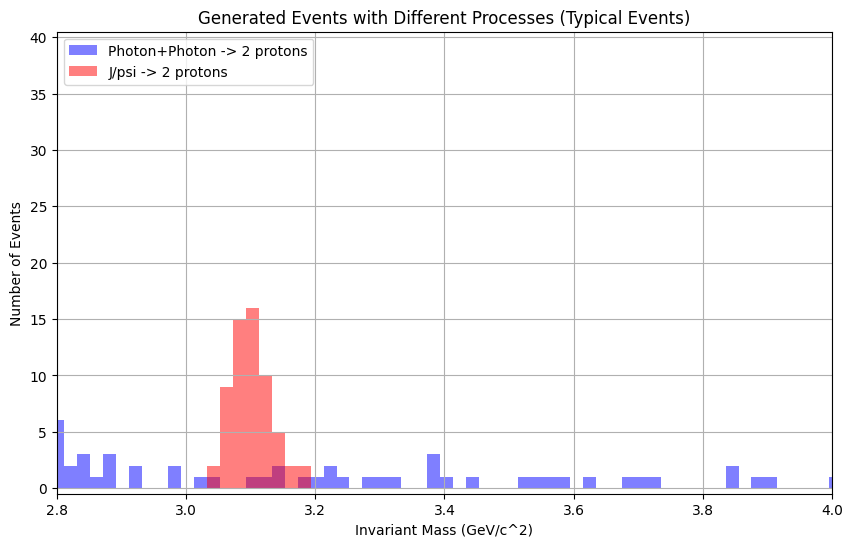

In [3]:
def plot_event_distribution_proton(events_photon_photon_proton, events_jpsi_protons):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 250)
    plt.hist(events_photon_photon_proton, bins=bins, alpha=0.5, label='Photon+Photon -> 2 protons', color='blue')
    plt.hist(events_jpsi_protons, bins=bins, alpha=0.5, label='J/psi -> 2 protons', color='red')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    #plt.yscale('log')  # Log scale for y-axis
    plt.xlim(2.8,4)
    plt.ylabel('Number of Events')
    plt.ylim(-0.5,40.5)
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})

def generate_all_events_proton():
    events_photon_photon_proton = generate_photon_photon_proton_events(271)
    events_jpsi_protons = generate_jpsi_protons_events(61)
    

    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
    
    plot_event_distribution_proton(photon_photon_proton, jpsi_protons)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_proton()

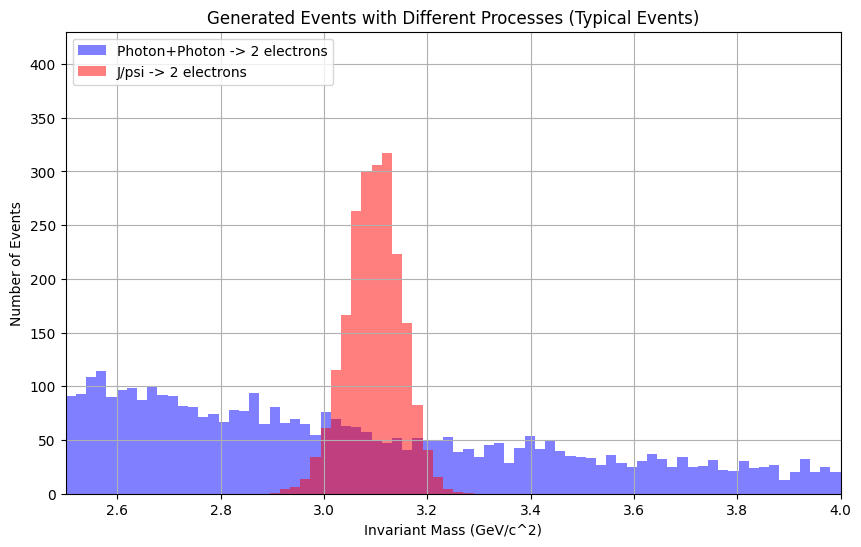

In [4]:
n_pp_electron_run2 = 74278
n_jpsi_electron_run2 = 2116


def plot_event_distribution_electron(events_photon_photon_electron, events_jpsi_electrons):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(2.5, 4, 77)
    plt.hist(events_photon_photon_electron, bins=bins, alpha=0.5, label='Photon+Photon -> 2 electrons', color='blue')
    plt.hist(events_jpsi_electrons, bins=bins, alpha=0.5, label='J/psi -> 2 electrons', color='red')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    #plt.yscale('log')  # Log scale for y-axis
    plt.xlim(2.5,4)
    plt.ylabel('Number of Events')
    plt.ylim(0,430)
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})

def generate_all_events_electron():
    events_photon_photon_proton = generate_photon_photon_electron_events(n_pp_electron_run2)
    events_jpsi_electrons = generate_jpsi_electrons_events(n_jpsi_electron_run2)
    

    photon_photon_electron = compute_invariant_masses_for_events_electron(events_photon_photon_proton)
    jpsi_electrons  = compute_invariant_masses_for_events_electron(events_jpsi_electrons)
    
    plot_event_distribution_electron(photon_photon_electron, jpsi_electrons)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_electron()

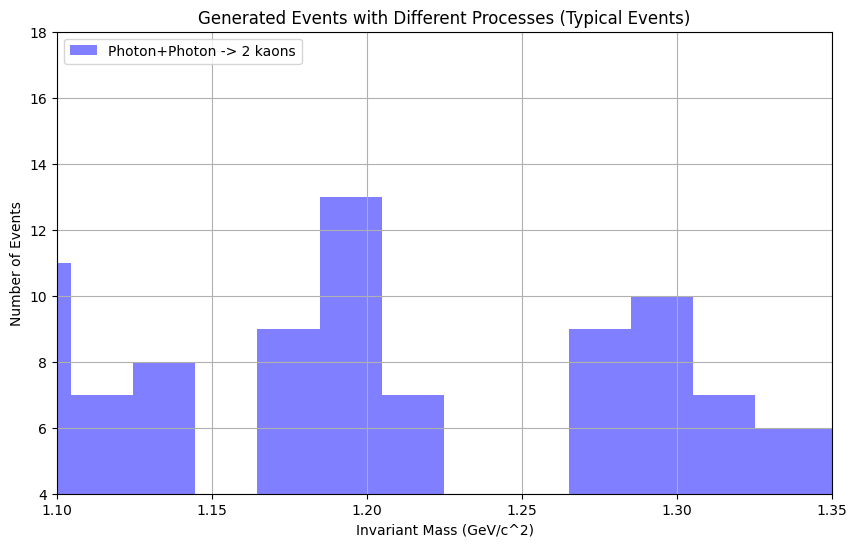

In [5]:
def plot_event_distribution_kaon(events_photon_photon_kaon):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 250)
    plt.hist(events_photon_photon_kaon, bins=bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='blue')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    #plt.yscale('log')  # Log scale for y-axis
    plt.xlim(1.1,1.35)
    plt.ylabel('Number of Events')
    plt.ylim(4,18)
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})

def generate_all_events_kaon():
    events_photon_photon_kaon = generate_pp_kaon_events(423)
    
    photon_photon_kaon = compute_invariant_masses_for_events(events_photon_photon_kaon)
    
    plot_event_distribution_kaon(photon_photon_kaon)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_kaon()

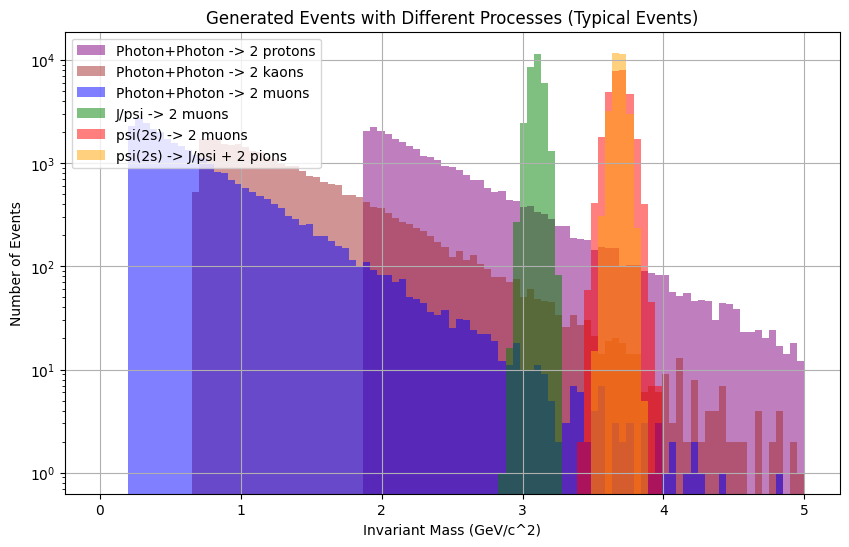

In [6]:

def plot_event_distribution_training(events_photon_photon_proton, events_pp_kaons, events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label='Photon+Photon -> 2 protons', color='purple')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
    plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
    plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2s) -> 2 muons', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2s) -> J/psi + 2 pions', color='orange')
    
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

plt.rcParams.update({'font.size': 10})

def generate_all_events_training():
    events_photon_photon_proton = generate_photon_photon_proton_events(30000)
    events_pp_kaons = generate_pp_kaon_events(30000)
    events_photon_photon = generate_photon_photon_events(30000)
    events_jpsi = generate_jpsi_events(30000)
    events_psi2S_muons = generate_psi2S_muons_events(30000)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(30000)

    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    pp_kaons      = compute_invariant_masses_for_events(events_pp_kaons)
    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)

    
    plot_event_distribution_training(photon_photon_proton, pp_kaons, photon_photon, jpsi, psi2s_muons, psi2s_jpsi_pi)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_training()

[199.6397671978831, 254.58330547366037, 209.54307647211584, 213.62065829494614, 209.16133521145707, 218.97919549246785, 201.01388534425894, 239.87102496216204, 228.3249461603686, 231.774032244293, 238.83537804103872, 199.73227675755982, 198.7936629926118, 194.53315893916806, 274.75896400605296, 208.04715110682554, 211.1853660258199, 210.5600921785169, 199.89530262661293, 209.84538746338796, 211.3433865895796, 235.0617088191363, 235.62373383408305, 219.8439582141082, 208.79898898871647, 213.55313316891278, 227.48602546942197, 175.9852569107823, 259.57380739893193, 227.12531669234008, 217.18028645819345, 228.89248538905704, 202.8318742090314, 248.4114618838673, 237.21197543327528, 267.1677371885914, 236.6910760031982, 228.20367847909716, 227.54987963390505, 192.62693656236289, 181.1022331710427, 223.06861978091828, 216.79488026988085, 254.33491108182108, 191.61124582019994, 229.40079420273142, 236.05241140953592, 252.71478811502817, 206.26856470484384, 199.54115714093155, 208.50148429696

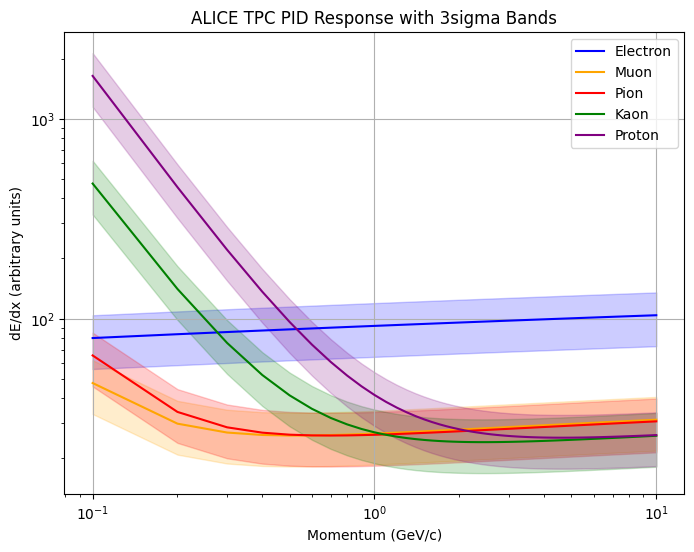

In [ ]:
#PID PLOT WITH BANDS
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = ((K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)) * 17
    
    return dEdx

def tpc_pid_response(momentum, particle_type, stretch_factor=1):
    mass_dict = {
        'electron': 0.000511,
        'muon': 0.10566,
        'pion': 0.13957,
        'kaon': 0.49367,
        'proton': 0.93827
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    dEdx = bethe_bloch(momentum, mass) * stretch_factor
    lower_band = dEdx * 0.7
    upper_band = dEdx * 1.3
    
    return dEdx, lower_band, upper_band

def error_extremes(momentum, particle_type, stretch_factor):
    _, lower_band, upper_band = tpc_pid_response(momentum, particle_type, stretch_factor)
    return upper_band, lower_band

def random_gaussian(mean, sigma):

    return np.random.normal(mean, sigma)

def gaussian_tpc_response(momentum, particle_type, stretch_factor):

    # Get the mean dE/dx from TPC PID response
    mean_dEdx, _, _ = tpc_pid_response(momentum, particle_type,stretch_factor)
    
    # Calculate the extremes for the 3σ band
    upper_band, lower_band = error_extremes(momentum, particle_type, stretch_factor)
    
    # Estimate σ as 1/3rd of the difference between the upper and lower bands
    sigma_dEdx = (upper_band - lower_band) / 6
    
    # Generate a random dE/dx value from a Gaussian distribution
    random_dEdx = random_gaussian(mean_dEdx, sigma_dEdx)
    
    return random_dEdx

 # Example usage
momentum = .3  # Example momentum in GeV/c
particle_type = 'proton'  # Example particle type
x=1000 #Amount of random numbers

rn=[]
for _ in range(x):

    if (particle_type == 'electron'):
        stretch_factor=1
    elif (particle_type == 'muon'):
        stretch_factor=.41
    elif (particle_type == 'pion'):
        stretch_factor=.41
    elif (particle_type == 'kaon'):
        stretch_factor=.38
    elif (particle_type == 'proton'):
        stretch_factor=.40

    random_value = gaussian_tpc_response(momentum, particle_type, stretch_factor)
    rn.append(random_value)
print(rn)

xvalues=[]
for _ in range(x):
    xvalues.append(momentum)
print(xvalues)

def plot_tpc_pid_response(momentum_range):
    """
    Plot the TPC PID response and error bands for various particle types.
    """
    # Calculate responses and PID bands for different particle species
    particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    plt.figure(figsize=(8, 6))
    
    for particle, settings in particle_types.items():
        response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
        plt.plot(momentum_range, response, label=particle, color=settings['color'])
        plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.2)
    
   # plt.plot(xvalues,rn, color= 'black')
    
    plt.xlabel('Momentum (GeV/c)')
    plt.ylabel('dE/dx (arbitrary units)')
    plt.xscale('log')  # Log scale for x-axis
    plt.yscale('log')  # Log scale for y-axis
    plt.title('ALICE TPC PID Response with 3sigma Bands')
    plt.legend()
    plt.grid(True)
    #plt.savefig("PID_empty.pdf")
    plt.show()
    
# Generate a momentum range and plot
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c
plot_tpc_pid_response(momentum_range)


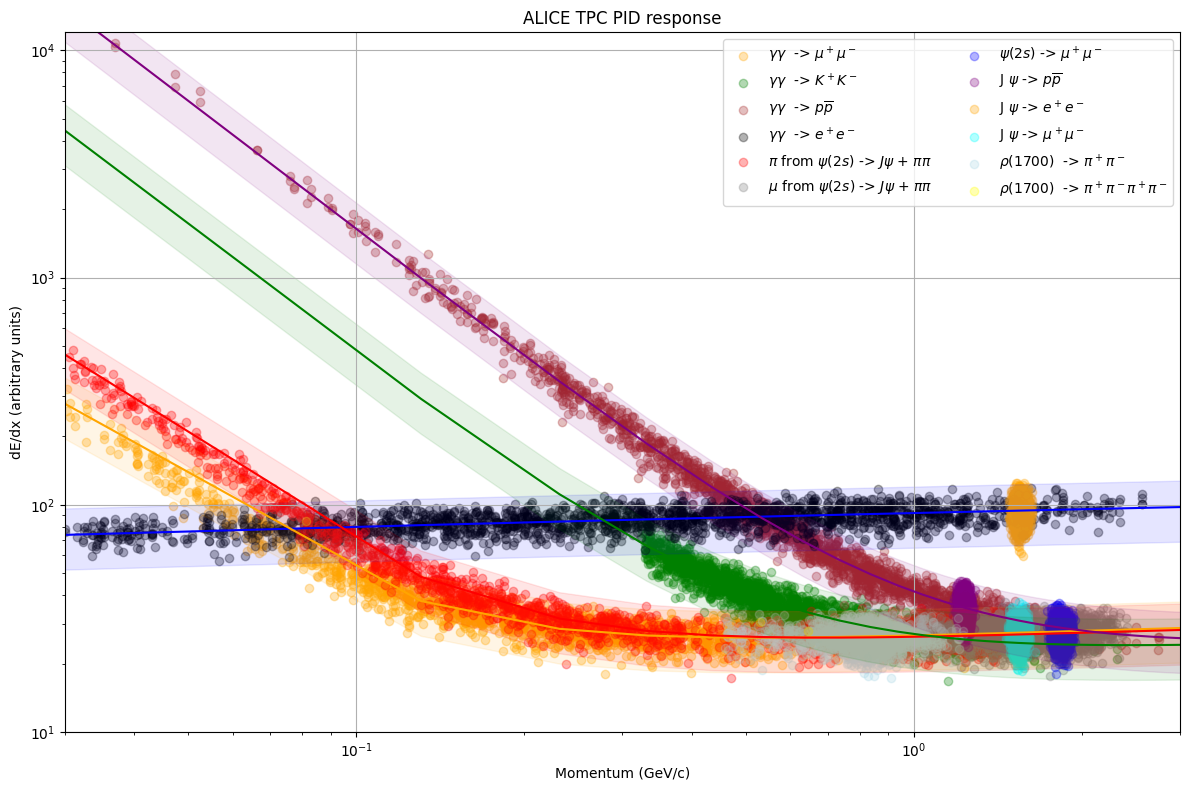

In [7]:
n_events = 1000

# plt.rcParams.update({'font.size': 15})

#Generate Jpsi events
jpsimuon_events = generate_jpsi_events(n_events)
jpsimuon1_dEdx = []
jpsimuon2_dEdx = []
jpsimuon1_momenta = []
jpsimuon2_momenta = []

# Iterate over events and calculate PID response for muons
for event in jpsimuon_events:
    jpsimuon1_p, jpsimuon2_p = event  # Extract momenta of muons
    
    # Calculate momentum magnitudes
    jpsimuon1_momentum = np.linalg.norm(jpsimuon1_p)
    jpsimuon2_momentum = np.linalg.norm(jpsimuon2_p)
    
    # Append momenta for later use
    jpsimuon1_momenta.append(jpsimuon1_momentum)
    jpsimuon1_momenta.append(jpsimuon2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsimuon1 = gaussian_tpc_response(jpsimuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_jpsimuon2 = gaussian_tpc_response(jpsimuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    jpsimuon1_dEdx.append(dEdx_jpsimuon1)
    jpsimuon1_dEdx.append(dEdx_jpsimuon2)

# Generate photon-photon events
photonmuon_events = generate_photon_photon_events(n_events)
photonmuon1_dEdx = []
photonmuon2_dEdx = []
photonmuon1_momenta = []
photonmuon2_momenta = []

# Iterate over events and calculate PID response for muons
for event in photonmuon_events:
    photonmuon1_p, photonmuon2_p = event  # Extract momenta of muons

    # Calculate momentum magnitudes
    photonmuon1_momentum = np.linalg.norm(photonmuon1_p)
    photonmuon2_momentum = np.linalg.norm(photonmuon2_p)
    
    # Append momenta for later use
    photonmuon1_momenta.append(photonmuon1_momentum)
    photonmuon1_momenta.append(photonmuon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each muon
    dEdx_photonmuon1 = gaussian_tpc_response(photonmuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_photonmuon2 = gaussian_tpc_response(photonmuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    photonmuon1_dEdx.append(dEdx_photonmuon1)
    photonmuon1_dEdx.append(dEdx_photonmuon2)

#Generate psi2s muon events
psi2smuon_events = generate_psi2S_muons_events(n_events)
psi2smuon1_dEdx = []
psi2smuon2_dEdx = []
psi2smuon1_momenta = []
psi2smuon2_momenta = []

for event in psi2smuon_events:
    psi2smuon1_p, psi2smuon2_p = event  # Extract momenta of muons

    # Calculate momentum magnitudes
    psi2smuon1_momentum = np.linalg.norm(psi2smuon1_p)
    psi2smuon2_momentum = np.linalg.norm(psi2smuon2_p)
    
    # Append momenta for later use
    psi2smuon1_momenta.append(psi2smuon1_momentum)
    psi2smuon1_momenta.append(psi2smuon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each muon
    dEdx_psi2smuon1 = gaussian_tpc_response(psi2smuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2smuon2 = gaussian_tpc_response(psi2smuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    psi2smuon1_dEdx.append(dEdx_psi2smuon1)
    psi2smuon1_dEdx.append(dEdx_psi2smuon2)


#Generate psi2s muon pion events
psi2s_jpsi_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events)
psi2s_jpsi_muon1_dEdx = []
psi2s_jpsi_muon2_dEdx = []
psi2s_jpsi_pion1_dEdx = []
psi2s_jpsi_pion2_dEdx = []
psi2s_jpsi_muon1_momenta = []
psi2s_jpsi_muon2_momenta = []
psi2s_jpsi_pion1_momenta = []
psi2s_jpsi_pion2_momenta = []

for event in psi2s_jpsi_pions_events:
    psi2s_jpsi_muon1_p, psi2s_jpsi_muon2_p, psi2s_jpsi_pion1_p, psi2s_jpsi_pion2_p, *_ = event

    psi2s_jpsi_muon1_momentum = np.linalg.norm(psi2s_jpsi_muon1_p)
    psi2s_jpsi_muon2_momentum = np.linalg.norm(psi2s_jpsi_muon2_p)
    psi2s_jpsi_pion1_momentum = np.linalg.norm(psi2s_jpsi_pion1_p)
    psi2s_jpsi_pion2_momentum = np.linalg.norm(psi2s_jpsi_pion2_p)

    psi2s_jpsi_muon1_momenta.append(psi2s_jpsi_muon1_momentum)
    psi2s_jpsi_muon1_momenta.append(psi2s_jpsi_muon2_momentum)
    psi2s_jpsi_pion1_momenta.append(psi2s_jpsi_pion1_momentum)
    psi2s_jpsi_pion1_momenta.append(psi2s_jpsi_pion2_momentum)    

    dEdx_psi2s_jpsi_muon1 = gaussian_tpc_response(psi2s_jpsi_muon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2s_jpsi_muon2 = gaussian_tpc_response(psi2s_jpsi_muon2_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2s_jpsi_pion1 = gaussian_tpc_response(psi2s_jpsi_pion1_momentum, 'pion', stretch_factor=0.41)
    dEdx_psi2s_jpsi_pion2 = gaussian_tpc_response(psi2s_jpsi_pion2_momentum, 'pion', stretch_factor=0.41)

    psi2s_jpsi_muon1_dEdx.append(dEdx_psi2s_jpsi_muon1)
    psi2s_jpsi_muon1_dEdx.append(dEdx_psi2s_jpsi_muon2)
    psi2s_jpsi_pion1_dEdx.append(dEdx_psi2s_jpsi_pion1)
    psi2s_jpsi_pion1_dEdx.append(dEdx_psi2s_jpsi_pion2)

# Generate photon-photon kaon events
photonkaon_events = generate_pp_kaon_events(n_events)
photonkaon1_dEdx = []
photonkaon2_dEdx = []
photonkaon1_momenta = []
photonkaon2_momenta = []

# Iterate over events and calculate PID response for kaons
for event in photonkaon_events:
    photonkaon1_p, photonkaon2_p = event  # Extract momenta of kaons

    # Calculate momentum magnitudes
    photonkaon1_momentum = np.linalg.norm(photonkaon1_p)
    photonkaon2_momentum = np.linalg.norm(photonkaon2_p)
    
    # Append momenta for later use
    photonkaon1_momenta.append(photonkaon1_momentum)
    photonkaon1_momenta.append(photonkaon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each kaon
    dEdx_photonkaon1 = gaussian_tpc_response(photonkaon1_momentum, 'kaon', stretch_factor=0.38)
    dEdx_photonkaon2 = gaussian_tpc_response(photonkaon2_momentum, 'kaon', stretch_factor=0.38)
    
    # Store the dE/dx values
    photonkaon1_dEdx.append(dEdx_photonkaon1)
    photonkaon1_dEdx.append(dEdx_photonkaon2)

# Generate photon-photon proton events
photonproton_events = generate_photon_photon_proton_events(n_events)
photonproton1_dEdx = []
photonproton2_dEdx = []
photonproton1_momenta = []
photonproton2_momenta = []

# Iterate over events and calculate PID response for kaons
for event in photonproton_events:
    photonproton1_p, photonproton2_p = event  # Extract momenta of kaons

    # Calculate momentum magnitudes
    photonproton1_momentum = np.linalg.norm(photonproton1_p)
    photonproton2_momentum = np.linalg.norm(photonproton2_p)
    
    # Append momenta for later use
    photonproton1_momenta.append(photonproton1_momentum)
    photonproton1_momenta.append(photonproton2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each kaon
    dEdx_photonproton1 = gaussian_tpc_response(photonproton1_momentum, 'proton', stretch_factor=0.4)
    dEdx_photonproton2 = gaussian_tpc_response(photonproton2_momentum, 'proton', stretch_factor=0.4)
    
    # Store the dE/dx values
    photonproton1_dEdx.append(dEdx_photonproton1)
    photonproton1_dEdx.append(dEdx_photonproton2)

# Generate photon-photon electron events
photonelectron_events = generate_photon_photon_electron_events(n_events)
photonelectron1_dEdx = []
photonelectron2_dEdx = []
photonelectron1_momenta = []
photonelectron2_momenta = []

# Iterate over events and calculate PID response for kaons
for event in photonelectron_events:
    photonelectron1_p, photonelectron2_p = event  # Extract momenta of kaons

    # Calculate momentum magnitudes
    photonelectron1_momentum = np.linalg.norm(photonelectron1_p)
    photonelectron2_momentum = np.linalg.norm(photonelectron2_p)
    
    # Append momenta for later use
    photonelectron1_momenta.append(photonelectron1_momentum)
    photonelectron1_momenta.append(photonelectron2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each kaon
    dEdx_photonelectron1 = gaussian_tpc_response(photonelectron1_momentum, 'electron', stretch_factor=1)
    dEdx_photonelectron2 = gaussian_tpc_response(photonelectron2_momentum, 'electron', stretch_factor=1)
    
    # Store the dE/dx values
    photonelectron1_dEdx.append(dEdx_photonelectron1)
    photonelectron1_dEdx.append(dEdx_photonelectron2)


#Generate Jpsi proton events
jpsiproton_events = generate_jpsi_protons_events(n_events)
jpsiproton1_dEdx = []
jpsiproton2_dEdx = []
jpsiproton1_momenta = []
jpsiproton2_momenta = []

# Iterate over events and calculate PID response for protons
for event in jpsiproton_events:
    jpsiproton1_p, jpsiproton2_p = event  # Extract momenta of protons
    
    # Calculate momentum magnitudes
    jpsiproton1_momentum = np.linalg.norm(jpsiproton1_p)
    jpsiproton2_momentum = np.linalg.norm(jpsiproton2_p)
    
    # Append momenta for later use
    jpsiproton1_momenta.append(jpsiproton1_momentum)
    jpsiproton1_momenta.append(jpsiproton2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsiproton1 = gaussian_tpc_response(jpsiproton1_momentum, 'proton', stretch_factor=0.4)
    dEdx_jpsiproton2 = gaussian_tpc_response(jpsiproton2_momentum, 'proton', stretch_factor=0.4)
    
    # Store the dE/dx values
    jpsiproton1_dEdx.append(dEdx_jpsiproton1)
    jpsiproton1_dEdx.append(dEdx_jpsiproton2)


#Generate Jpsi electron events
jpsielectron_events = generate_jpsi_electrons_events(n_events)
jpsielectron1_dEdx = []
jpsielectron2_dEdx = []
jpsielectron1_momenta = []
jpsielectron2_momenta = []

# Iterate over events and calculate PID response for electron
for event in jpsielectron_events:
    jpsielectron1_p, jpsielectron2_p = event  # Extract momenta of electron
    
    # Calculate momentum magnitudes
    jpsielectron1_momentum = np.linalg.norm(jpsielectron1_p)
    jpsielectron2_momentum = np.linalg.norm(jpsielectron2_p)
    
    # Append momenta for later use
    jpsielectron1_momenta.append(jpsielectron1_momentum)
    jpsielectron1_momenta.append(jpsielectron2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsielectron1 = gaussian_tpc_response(jpsielectron1_momentum, 'electron', stretch_factor=1)
    dEdx_jpsielectron2 = gaussian_tpc_response(jpsielectron2_momentum, 'electron', stretch_factor=1)
    
    # Store the dE/dx values
    jpsielectron1_dEdx.append(dEdx_jpsielectron1)
    jpsielectron1_dEdx.append(dEdx_jpsielectron2)

#Generate pentaquark muon proton events
pentaquark_muons_proton_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events)
pentaquark_muon1_dEdx = []
pentaquark_muon2_dEdx = []
pentaquark_proton_dEdx = []
pentaquark_muon1_momenta = []
pentaquark_muon2_momenta = []
pentaquark_proton_momenta = []

for event in pentaquark_muons_proton_events:
    pentaquark_muon1_p, pentaquark_muon2_p, pentaquark_proton_p, *_ = event

    pentaquark_muon1_momentum = np.linalg.norm(pentaquark_muon1_p)
    pentaquark_muon2_momentum = np.linalg.norm(pentaquark_muon2_p)
    pentaquark_proton_momentum = np.linalg.norm(pentaquark_proton_p)

    pentaquark_muon1_momenta.append(pentaquark_muon1_momentum)
    pentaquark_muon1_momenta.append(pentaquark_muon2_momentum)
    pentaquark_proton_momenta.append(pentaquark_proton_momentum)
  
    dEdx_pentaquark_muon1 = gaussian_tpc_response(pentaquark_muon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_pentaquark_muon2 = gaussian_tpc_response(pentaquark_muon2_momentum, 'muon', stretch_factor=0.41)
    dEdx_pentaquark_proton = gaussian_tpc_response(pentaquark_proton_momentum, 'proton', stretch_factor=0.4)
  
    pentaquark_muon1_dEdx.append(dEdx_pentaquark_muon1)
    pentaquark_muon1_dEdx.append(dEdx_pentaquark_muon2)
    pentaquark_proton_dEdx.append(dEdx_pentaquark_proton)

#Generate Jpsi events
rhopion_events = generate_rhoprime_events(n_events)
rhopion1_dEdx = []
rhopion2_dEdx = []
rhopion1_momenta = []
rhopion2_momenta = []

# Iterate over events and calculate PID response for muons
for event in rhopion_events:
    rhopion1_p, rhopion2_p = event  # Extract momenta of muons
    
    # Calculate momentum magnitudes
    rhopion1_momentum = np.linalg.norm(rhopion1_p)
    rhopion2_momentum = np.linalg.norm(rhopion2_p)
    
    # Append momenta for later use
    rhopion1_momenta.append(rhopion1_momentum)
    rhopion1_momenta.append(rhopion2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_rhopion1 = gaussian_tpc_response(rhopion1_momentum, 'pion', stretch_factor=0.41)
    dEdx_rhopion2 = gaussian_tpc_response(rhopion2_momentum, 'pion', stretch_factor=0.41)
    
    # Store the dE/dx values
    rhopion1_dEdx.append(dEdx_rhopion1)
    rhopion1_dEdx.append(dEdx_rhopion2)


#Generate psi2s muon pion events
rho_four_pions_events = generate_rho_four_pions(n_events)
rho_four_pion1_dEdx = []
rho_four_pion2_dEdx = []
rho_four_pion3_dEdx = []
rho_four_pion4_dEdx = []
rho_four_pion1_momenta = []
rho_four_pion2_momenta = []
rho_four_pion3_momenta = []
rho_four_pion4_momenta = []

for event in rho_four_pions_events:
    rho_four_pion1_p, rho_four_pion2_p, rho_four_pion3_p, rho_four_pion4_p, *_ = event

    rho_four_pion1_momentum = np.linalg.norm(rho_four_pion1_p)
    rho_four_pion2_momentum = np.linalg.norm(rho_four_pion2_p)
    rho_four_pion3_momentum = np.linalg.norm(rho_four_pion3_p)
    rho_four_pion4_momentum = np.linalg.norm(rho_four_pion4_p)

    rho_four_pion1_momenta.append(rho_four_pion1_momentum)
    rho_four_pion1_momenta.append(rho_four_pion2_momentum)
    rho_four_pion1_momenta.append(rho_four_pion3_momentum)
    rho_four_pion1_momenta.append(rho_four_pion4_momentum)    

    dEdx_rho_four_pion1 = gaussian_tpc_response(rho_four_pion1_momentum, 'pion', stretch_factor=0.41)
    dEdx_rho_four_pion2 = gaussian_tpc_response(rho_four_pion2_momentum, 'pion', stretch_factor=0.41)
    dEdx_rho_four_pion3 = gaussian_tpc_response(rho_four_pion3_momentum, 'pion', stretch_factor=0.41)
    dEdx_rho_four_pion4 = gaussian_tpc_response(rho_four_pion4_momentum, 'pion', stretch_factor=0.41)

    rho_four_pion1_dEdx.append(dEdx_rho_four_pion1)
    rho_four_pion1_dEdx.append(dEdx_rho_four_pion2)
    rho_four_pion1_dEdx.append(dEdx_rho_four_pion3)
    rho_four_pion1_dEdx.append(dEdx_rho_four_pion4)


#Generate psi2s muon pion events
jpsi_four_pions_events = generate_jpsi_four_pions(n_events)
jpsi_four_pion1_dEdx = []
jpsi_four_pion2_dEdx = []
jpsi_four_pion3_dEdx = []
jpsi_four_pion4_dEdx = []
jpsi_four_pion1_momenta = []
jpsi_four_pion2_momenta = []
jpsi_four_pion3_momenta = []
jpsi_four_pion4_momenta = []

for event in jpsi_four_pions_events:
    jpsi_four_pion1_p, jpsi_four_pion2_p, jpsi_four_pion3_p, jpsi_four_pion4_p, *_ = event

    jpsi_four_pion1_momentum = np.linalg.norm(jpsi_four_pion1_p)
    jpsi_four_pion2_momentum = np.linalg.norm(jpsi_four_pion2_p)
    jpsi_four_pion3_momentum = np.linalg.norm(jpsi_four_pion3_p)
    jpsi_four_pion4_momentum = np.linalg.norm(jpsi_four_pion4_p)

    jpsi_four_pion1_momenta.append(jpsi_four_pion1_momentum)
    jpsi_four_pion1_momenta.append(jpsi_four_pion2_momentum)
    jpsi_four_pion1_momenta.append(jpsi_four_pion3_momentum)
    jpsi_four_pion1_momenta.append(jpsi_four_pion4_momentum)    

    dEdx_jpsi_four_pion1 = gaussian_tpc_response(jpsi_four_pion1_momentum, 'pion', stretch_factor=0.41)
    dEdx_jpsi_four_pion2 = gaussian_tpc_response(jpsi_four_pion2_momentum, 'pion', stretch_factor=0.41)
    dEdx_jpsi_four_pion3 = gaussian_tpc_response(jpsi_four_pion3_momentum, 'pion', stretch_factor=0.41)
    dEdx_jpsi_four_pion4 = gaussian_tpc_response(jpsi_four_pion4_momentum, 'pion', stretch_factor=0.41)

    jpsi_four_pion1_dEdx.append(dEdx_jpsi_four_pion1)
    jpsi_four_pion1_dEdx.append(dEdx_jpsi_four_pion2)
    jpsi_four_pion1_dEdx.append(dEdx_jpsi_four_pion3)
    jpsi_four_pion1_dEdx.append(dEdx_jpsi_four_pion4)


# Plot the results
plt.figure(figsize=(12, 8)) 

#Photon Muon 
plt.scatter(photonmuon1_momenta, photonmuon1_dEdx, color='orange', alpha=.3, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 2 PID Response')
plt.grid(True)
plt.legend()

#photon Kaon dE/dx vs Momentum
plt.scatter(photonkaon1_momenta, photonkaon1_dEdx, color='green', alpha=.3, label=r'$\gamma \gamma$  -> $K^+ K^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Kaon PID Response')
plt.grid(True)
plt.legend()

#photon proton dE/dx vs Momentum
plt.scatter(photonproton1_momenta, photonproton1_dEdx, color='brown', alpha=.3, label=r'$\gamma \gamma$  -> $p \overline{p}$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Proton PID Response')
plt.grid(True)
plt.legend()

#photon proton dE/dx vs Momentum
plt.scatter(photonelectron1_momenta, photonelectron1_dEdx, color='black', alpha=.3, label=r'$\gamma \gamma$  -> $e^+ e^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Electron PID Response')
plt.grid(True)
plt.legend()

# Scatter plot for Pions
plt.scatter(psi2s_jpsi_pion1_momenta, psi2s_jpsi_pion1_dEdx, color='red', alpha=0.3, label=r'$\pi$ from $\psi (2s)$ -> $J \psi$ + $\pi \pi$')
plt.xlabel('Event Index')
plt.ylabel('Momentum (GeV/c)')
plt.title('Momentum Distribution for Muons from psi(2S) J/psi Events')
plt.legend()
plt.grid(True)

# Scatter plot for Muons
plt.scatter(psi2s_jpsi_muon1_momenta, psi2s_jpsi_muon1_dEdx, color='grey', alpha=0.3, label=r'$\mu$ from $\psi (2s)$ -> $J \psi$ + $\pi \pi$')
plt.xlabel('Event Index')
plt.ylabel('Momentum (GeV/c)')
plt.title('Momentum Distribution for Muons from psi(2S) J/psi Events')
plt.legend()
plt.grid(True)

#Psi2s Muon 
plt.scatter(psi2smuon1_momenta, psi2smuon1_dEdx, color='blue', alpha=.3, label=r'$\psi (2s)$ -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 2 PID Response')
plt.grid(True)
plt.legend()

#Jpsi Proton dE/dx vs Momentum
plt.scatter(jpsiproton1_momenta, jpsiproton1_dEdx, color='purple', alpha=.3, label=r'J $\psi$ -> $p \overline{p}$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Proton 1 PID Response')
plt.grid(True)
plt.legend()

#Jpsi Electron dE/dx vs Momentum
plt.scatter(jpsielectron1_momenta, jpsielectron1_dEdx, color='orange', alpha=.3, label=r'J $\psi$ -> $e^+ e^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Proton 1 PID Response')
plt.grid(True)
plt.legend()

#Jpsi Muon dE/dx vs Momentum
plt.scatter(jpsimuon1_momenta, jpsimuon1_dEdx, color='cyan', alpha=.3, label=r'J $\psi$ -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 1 PID Response')
plt.grid(True)
plt.legend()

#rho 2pi 
plt.scatter(rhopion1_momenta, rhopion1_dEdx, color='lightblue', alpha=.3, label=r'$\rho(1700)$  -> $\pi^+ \pi^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Pion 1 PID Response')
plt.grid(True)
plt.legend()

#rho 4pi 
plt.scatter(rho_four_pion1_momenta, rho_four_pion1_dEdx, color='yellow', alpha=.3, label=r'$\rho(1700)$  -> $\pi^+ \pi^- \pi^+ \pi^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Pion 1 PID Response')
plt.grid(True)
plt.legend()

# #jpsi 4pi 
# plt.scatter(jpsi_four_pion1_momenta, jpsi_four_pion1_dEdx, color='pink', alpha=.3, label=r'J $\psi$ -> $\pi^+ \pi^- \pi^+ \pi^-$')
# plt.xlabel('Momentum (GeV/c)')
# plt.ylabel('dE/dx (arbitrary units)')
# plt.title('Pion 1 PID Response')
# plt.grid(True)
# plt.legend()

# #Scatter plot for Pentaquark Muons
# plt.scatter(pentaquark_muon1_momenta, pentaquark_muon1_dEdx, color='maroon', alpha=0.3, label=r'$\mu$ from pentaquark')
# plt.xlabel('Event Index')
# plt.ylabel('Momentum (GeV/c)')
# plt.title('Momentum Distribution for Muons from Pentaquark Events')
# plt.legend()
# plt.grid(True)

# # Scatter plot for Pentaquark Proton 
# plt.scatter(pentaquark_proton_momenta, pentaquark_proton_dEdx, color='lightgreen', alpha=0.3, label=r'p from pentaquark')
# plt.xlabel('Event Index')
# plt.ylabel('Momentum (GeV/c)')
# plt.title('Momentum Distribution for Proton from Pentaquark Events')
# plt.legend()
# plt.grid(True)


particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    
momentum_range = np.linspace(0.03, 10, 100)   
for particle, settings in particle_types.items():
    response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
    plt.plot(momentum_range, response, label = '_nolegend_', color=settings['color'])
    plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.1)
    # plt.legend()
    
   # plt.plot(xvalues,rn, color= 'black')
    

plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.03, 3])
plt.ylim([10, 12000])
plt.title('ALICE TPC PID response')
plt.legend(loc='upper right', ncol = 2) #, fontsize="15"
plt.grid(True)

# Get current axes and create a legend with 2 columns
# ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=2)
# ax.set_xlim([0.03, 3])
# ax.set_ylim([10, 100000])

# Adjust layout to reserve space for the legend (e.g. top 10% of the figure)
plt.tight_layout() #rect=[0, 0, 1, 0.9]
plt.show()



# Creation of Dataframes

## Generation 1

In [ ]:

import pandas as pd

data_for_pp_muons_gen1 = []
pp_muons_events = generate_photon_photon_events(n_photon_photon)
for event_id, event in enumerate(pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_pp_muons_gen1 = pd.DataFrame(data_for_pp_muons_gen1)

data_for_jpsimuons_gen1= []
jpsi_muons_events = generate_jpsi_events(n_jpsi)
for event_id, event in enumerate(jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_jpsimuons_gen1 = pd.DataFrame(data_for_jpsimuons_gen1)

data_for_jpsiprotons_gen1= []
jpsi_protons_events = generate_jpsi_protons_events(n_jpsi_protons)
for event_id, event in enumerate(jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_jpsiprotons_gen1 = pd.DataFrame(data_for_jpsiprotons_gen1)

data_for_jpsielectrons_gen1= []
jpsi_electrons_events = generate_jpsi_electrons_events(n_jpsi_electrons)
for event_id, event in enumerate(jpsi_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
df_jpsielectrons_gen1 = pd.DataFrame(data_for_jpsielectrons_gen1)

data_for_psi2smuons_gen1 = []
psi2s_muons_events = generate_psi2S_muons_events(n_psi2S_muons)
for event_id, event in enumerate(psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_psi2smuons_gen1 = pd.DataFrame(data_for_psi2smuons_gen1)

data_for_pp_kaons_gen1 = []
pp_kaons_events = generate_pp_kaon_events(n_pp_kaon)
for event_id, event in enumerate(pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
df_pp_kaons_gen1 = pd.DataFrame(data_for_pp_kaons_gen1)

data_for_pp_protons_gen1 = []
pp_protons_events = generate_photon_photon_proton_events(n_photon_photon_proton)
for event_id, event in enumerate(pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_pp_protons_gen1 = pd.DataFrame(data_for_pp_protons_gen1)

data_for_pp_electrons_gen1 = []
pp_electrons_events = generate_photon_photon_electron_events(n_photon_photon_electron)
for event_id, event in enumerate(pp_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
df_pp_electrons_gen1 = pd.DataFrame(data_for_pp_electrons_gen1)

data_for_psi2s_muons_pions_gen1 = []
psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_psi2S_jpsi_pions)
for event_id, event in enumerate(psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
df_psi2s_muons_pions_gen1 = pd.DataFrame(data_for_psi2s_muons_pions_gen1)
df_psi2s_muons_pions_gen1.head()

data_for_pentaquark_gen1 = []
pentaquark_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pq1)
for event_id, event in enumerate(pentaquark_events):
    muon1_p, muon2_p, proton_p, _, _, _ = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    proton_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton_p[0], "py": proton_p[1], "pz": proton_p[2], "Energy": proton_E})
df_pentaquark_gen1 = pd.DataFrame(data_for_pentaquark_gen1)

data_for_jpsi_four_pions_gen1 = []
jpsi_four_pions_events = generate_jpsi_four_pions(n_jpsi_4pi)
for event_id, event in enumerate(jpsi_four_pions_events):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E = event
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion4_p[0], "py": pion4_p[1], "pz": pion4_p[2], "Energy": p4_E})
df_jpsi_four_pions_gen1 = pd.DataFrame(data_for_jpsi_four_pions_gen1)

data_for_rho_gen1= []
rho_events = generate_rhoprime_events(n_training)
for event_id, event in enumerate(rho_events):
    pion1_p, pion2_p = event
    pion1_E = np.sqrt(np.linalg.norm(pion1_p)**2 + m_pion**2)
    pion2_E = np.sqrt(np.linalg.norm(pion2_p)**2 + m_pion**2)
    data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": pion1_E})
    data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": pion2_E})
df_rho_gen1 = pd.DataFrame(data_for_rho_gen1)

data_for_rho_four_pions_gen1 = []
rho_four_pions_events = generate_jpsi_four_pions(n_training)
for event_id, event in enumerate(rho_four_pions_events):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E = event
    data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
    data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
    data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
    data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion4_p[0], "py": pion4_p[1], "pz": pion4_p[2], "Energy": p4_E})
df_rho_four_pions_gen1 = pd.DataFrame(data_for_rho_four_pions_gen1)
df_rho_four_pions_gen1

In [ ]:
training_data_for_pp_muons_gen1 = []
training_pp_muons_events = generate_photon_photon_events(n_training)
for event_id, event in enumerate(training_pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_for_pp_muons_gen1 = pd.DataFrame(training_data_for_pp_muons_gen1)

training_data_for_jpsimuons_gen1= []
training_jpsi_muons_events = generate_jpsi_events(n_training)
for event_id, event in enumerate(training_jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_jpsimuons_gen1 = pd.DataFrame(training_data_for_jpsimuons_gen1)

training_data_for_jpsielectrons_gen1= []
training_jpsi_electrons_events = generate_jpsi_electrons_events(n_training)
for event_id, event in enumerate(training_jpsi_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    training_data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    training_data_for_jpsielectrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
training_df_jpsielectrons_gen1 = pd.DataFrame(training_data_for_jpsielectrons_gen1)

training_data_for_jpsiprotons_gen1= []
training_jpsi_protons_events = generate_jpsi_protons_events(n_training)
for event_id, event in enumerate(training_jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_jpsiprotons_gen1 = pd.DataFrame(training_data_for_jpsiprotons_gen1)

training_data_for_psi2smuons_gen1 = []
training_psi2s_muons_events = generate_psi2S_muons_events(n_training)
for event_id, event in enumerate(training_psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_psi2smuons_gen1 = pd.DataFrame(training_data_for_psi2smuons_gen1)

training_data_for_pp_kaons_gen1 = []
training_pp_kaons_events = generate_pp_kaon_events(n_training)
for event_id, event in enumerate(training_pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
training_df_pp_kaons_gen1 = pd.DataFrame(training_data_for_pp_kaons_gen1)

training_data_for_pp_protons_gen1 = []
training_pp_protons_events = generate_photon_photon_proton_events(n_training)
for event_id, event in enumerate(training_pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_pp_protons_gen1 = pd.DataFrame(training_data_for_pp_protons_gen1)

training_data_for_pp_electrons_gen1 = []
training_pp_electrons_events = generate_photon_photon_electron_events(n_training)
for event_id, event in enumerate(training_pp_electrons_events):
    electron1_p, electron2_p = event
    electron1_E = np.sqrt(np.linalg.norm(electron1_p)**2 + m_electron**2)
    electron2_E = np.sqrt(np.linalg.norm(electron2_p)**2 + m_electron**2)
    training_data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron1_p[0], "py": electron1_p[1], "pz": electron1_p[2], "Energy": electron1_E})
    training_data_for_pp_electrons_gen1.append({"EventID": event_id, "Particle": "electron", "px": electron2_p[0], "py": electron2_p[1], "pz": electron2_p[2], "Energy": electron2_E})
training_df_pp_electrons_gen1 = pd.DataFrame(training_data_for_pp_electrons_gen1)

training_data_for_psi2s_muons_pions_gen1 = []
training_psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_training)
for event_id, event in enumerate(training_psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
training_df_psi2s_muons_pions_gen1 = pd.DataFrame(training_data_for_psi2s_muons_pions_gen1)
training_df_psi2s_muons_pions_gen1.head()

training_data_for_rho_gen1= []
training_rho_events = generate_rhoprime_events(n_training)
for event_id, event in enumerate(training_rho_events):
    pion1_p, pion2_p = event
    pion1_E = np.sqrt(np.linalg.norm(pion1_p)**2 + m_pion**2)
    pion2_E = np.sqrt(np.linalg.norm(pion2_p)**2 + m_pion**2)
    training_data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": pion1_E})
    training_data_for_rho_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": pion2_E})
training_df_rho_gen1 = pd.DataFrame(training_data_for_rho_gen1)
training_df_rho_gen1

training_data_for_rho_four_pions_gen1 = []
training_rho_four_pions_events = generate_jpsi_four_pions(n_training)
for event_id, event in enumerate(training_rho_four_pions_events):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E = event
    training_data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
    training_data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
    training_data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
    training_data_for_rho_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion4_p[0], "py": pion4_p[1], "pz": pion4_p[2], "Energy": p4_E})
training_df_rho_four_pions_gen1 = pd.DataFrame(training_data_for_rho_four_pions_gen1)
training_df_rho_four_pions_gen1


,EventID,Particle,px,py,pz,Energy
0,0,muon,-0.921197,0.919225,-0.575469,1.426851
1,0,muon,0.671264,-0.914035,1.378449,1.788110
2,0,pion,0.029144,0.041664,-0.127672,0.195870
3,0,pion,0.238457,-0.058723,-0.661817,0.283053
4,1,muon,-0.721402,0.868048,0.201450,1.151380


In [11]:
df_pp_protons_gen1.head()

,EventID,Particle,px,py,pz,Energy
0,0,proton,0.205946,0.089664,-0.255433,0.997769
1,0,proton,-0.205946,-0.089664,0.255433,0.997769
2,1,proton,0.070266,0.157243,0.458526,1.058184
3,1,proton,-0.070266,-0.157243,-0.458526,1.058184
4,2,proton,-0.136200,0.327097,0.416749,1.085848


## Generation 2 

In [12]:
stretch_factors = {
    'electron': 1.0,
    'muon': .41,
    'pion': .41,
    'kaon': .38,
    'proton': .4
}

#NSIGMA AWAY FROM EACH PARTICLE
def calculate_nsigma(momentum, dEdx_observed, stretch_factors=None, error_fraction=0.3):
  
    if stretch_factors is None:
        stretch_factors = {
            'electron': 1.0,
            'muon': .41,
            'pion': .41,
            'kaon': .38,
            'proton': .40
        }
    
    particle_types = ['electron', 'muon', 'pion', 'kaon', 'proton']
    nsigma_dict = {}

    for particle in particle_types:
        stretch_factor = stretch_factors.get(particle, 1.0)
        dEdx_expected, _, _ = tpc_pid_response(momentum, particle, stretch_factor)
        sigma = dEdx_expected * error_fraction  # Standard deviation as a fraction of the expected dE/dx
        nsigma = (dEdx_observed - dEdx_expected) / sigma
        nsigma_dict[particle] = nsigma
    
    return nsigma_dict


# Apply the calculate_nsigma function and expand the results into separate columns
nsigma_columns = ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']


In [13]:
df_jpsimuons_gen2 = df_jpsimuons_gen1.copy()
df_jpsimuons_gen2['Momentum']= np.sqrt(df_jpsimuons_gen2['px']**2 + df_jpsimuons_gen2['py']**2 + df_jpsimuons_gen2['pz']**2)
df_jpsimuons_gen2['PID Signal'] = df_jpsimuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]), axis=1)
df_jpsimuons_gen2[nsigma_columns] = df_jpsimuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsimuons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,0.253412,-1.355487,0.712301,1.555667,1.552075,26.667552,-2.391120,-0.089799,-0.029643,0.270730,-0.453191
1,0,muon,-0.253412,1.355487,-0.712301,1.555667,1.552075,27.911875,-2.347156,0.061546,0.124509,0.438898,-0.318802
2,1,muon,-0.781456,1.026212,-0.716113,1.479110,1.475332,24.498775,-2.465311,-0.343269,-0.288744,-0.042320,-0.753675
3,1,muon,0.781456,-1.026212,0.716113,1.479110,1.475332,25.868510,-2.416780,-0.176094,-0.118520,0.141681,-0.609445
4,2,muon,0.823016,1.034579,0.805830,1.551848,1.548247,28.469736,-2.327308,0.129983,0.194166,0.513243,-0.262194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249595,124797,muon,1.395219,0.469856,-0.506851,1.560597,1.557016,26.565596,-2.394887,-0.102904,-0.042932,0.258200,-0.459841
249596,124798,muon,-0.384216,-0.005928,1.503785,1.555696,1.552104,26.558307,-2.394981,-0.103091,-0.043181,0.255973,-0.464963
249597,124798,muon,0.384216,0.005928,-1.503785,1.555696,1.552104,25.735241,-2.424061,-0.203199,-0.145146,0.144737,-0.553857
249598,124799,muon,0.930824,-0.838382,0.965055,1.584870,1.581344,25.244843,-2.442308,-0.266776,-0.209581,0.085262,-0.582720


In [14]:
training_df_jpsimuons_gen2 = training_df_jpsimuons_gen1.copy()
training_df_jpsimuons_gen2['Momentum']= np.sqrt(training_df_jpsimuons_gen2['px']**2 + training_df_jpsimuons_gen2['py']**2 + training_df_jpsimuons_gen2['pz']**2)
training_df_jpsimuons_gen2['PID Signal'] = training_df_jpsimuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]), axis=1)
training_df_jpsimuons_gen2[nsigma_columns] = training_df_jpsimuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_jpsimuons_gen2.head()

In [15]:
df_jpsiprotons_gen2 = df_jpsiprotons_gen1.copy()
df_jpsiprotons_gen2['Momentum']= np.sqrt(df_jpsiprotons_gen2['px']**2 + df_jpsiprotons_gen2['py']**2 + df_jpsiprotons_gen2['pz']**2)
df_jpsiprotons_gen2['PID Signal'] = df_jpsiprotons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsiprotons_gen2[nsigma_columns] = df_jpsiprotons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsiprotons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,0.953391,-0.309913,-0.677786,1.531091,1.210122,36.415567,-2.028739,1.169579,1.244240,1.395782,0.064901
1,0,proton,-0.953391,0.309913,0.677786,1.531091,1.210122,39.312453,-1.924958,1.527789,1.608390,1.771987,0.335233
2,1,proton,0.544315,-1.172802,-0.033573,1.597722,1.293395,33.594454,-2.134283,0.802947,0.874191,1.088057,-0.055486
3,1,proton,-0.544315,1.172802,0.033573,1.597722,1.293395,40.131348,-1.900969,1.607794,1.692902,1.948382,0.582325
4,2,proton,0.521834,-0.989019,-0.422369,1.519443,1.195351,37.664024,-1.983083,1.327589,1.404265,1.544689,0.151015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,2437,proton,-0.718904,0.580363,-0.845506,1.564727,1.252408,34.438255,-2.101950,0.915711,0.987627,1.171148,-0.043127
4876,2438,proton,0.900266,0.864236,0.180551,1.571568,1.260944,35.784250,-2.054309,1.079845,1.154825,1.353511,0.100956
4877,2438,proton,-0.900266,-0.864236,-0.180551,1.571568,1.260944,29.962862,-2.262381,0.361908,0.424691,0.591055,-0.457735
4878,2439,proton,0.440169,1.052373,-0.370637,1.522647,1.199421,30.948591,-2.224042,0.495729,0.558859,0.677982,-0.463308


In [16]:
training_df_jpsiprotons_gen2 = training_df_jpsiprotons_gen1.copy()
training_df_jpsiprotons_gen2['Momentum']= np.sqrt(training_df_jpsiprotons_gen2['px']**2 + training_df_jpsiprotons_gen2['py']**2 + training_df_jpsiprotons_gen2['pz']**2)
training_df_jpsiprotons_gen2['PID Signal'] = training_df_jpsiprotons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_jpsiprotons_gen2[nsigma_columns] = training_df_jpsiprotons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
training_df_jpsiprotons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,-0.173412,0.693513,1.027470,1.564152,1.251690,36.049434,-2.044299,1.114665,1.189924,1.381347,0.109482
1,0,proton,0.173412,-0.693513,-1.027470,1.564152,1.251690,34.966842,-2.083009,0.981089,1.054087,1.239761,0.006092
2,1,proton,-0.293070,1.066942,-0.540683,1.548043,1.231501,35.483477,-2.063379,1.049416,1.122869,1.291939,0.018342
3,1,proton,0.293070,-1.066942,0.540683,1.548043,1.231501,39.815744,-1.908328,1.584517,1.666938,1.856651,0.427556
4,2,proton,-0.144250,0.065784,1.250790,1.571450,1.260798,39.035949,-1.938075,1.480904,1.562693,1.779286,0.412740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,proton,1.018193,-0.540534,-0.471350,1.559137,1.245417,41.254979,-1.857747,1.758606,1.844511,2.056689,0.593356
59996,29998,proton,0.321510,-0.343089,-1.135911,1.546356,1.229379,40.615942,-1.879548,1.683908,1.767908,1.959051,0.498610
59997,29998,proton,-0.321510,0.343089,1.135911,1.546356,1.229379,31.263420,-2.214307,0.528601,0.593259,0.740388,-0.383761
59998,29999,proton,0.899231,0.873664,-0.129181,1.571126,1.260394,35.940952,-2.048676,1.099295,1.174588,1.373631,0.114997


In [17]:
df_jpsielectrons_gen2 = df_jpsielectrons_gen1.copy()
df_jpsielectrons_gen2['Momentum']= np.sqrt(df_jpsielectrons_gen2['px']**2 + df_jpsielectrons_gen2['py']**2 + df_jpsielectrons_gen2['pz']**2)
df_jpsielectrons_gen2['PID Signal'] = df_jpsielectrons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsielectrons_gen2[nsigma_columns] = df_jpsielectrons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsielectrons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,electron,-1.497570,0.292269,-0.209256,1.540105,1.540105,70.227704,-0.850996,5.212884,5.371003,6.149615,4.223116
1,0,electron,1.497570,-0.292269,0.209256,1.540105,1.540105,103.595836,0.328466,9.273551,9.506798,10.655363,7.813503
2,1,electron,1.464576,0.290073,-0.466492,1.564206,1.564206,82.825868,-0.408203,6.735275,6.922459,7.869876,5.645217
3,1,electron,-1.464576,-0.290073,0.466492,1.564206,1.564206,102.949323,0.302489,9.181554,9.414216,10.591819,7.826655
4,2,electron,1.282689,0.400488,-0.743909,1.535931,1.535931,98.558384,0.150931,8.662755,8.884510,9.971060,7.257482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169275,84637,electron,-0.989282,0.881673,0.813028,1.554684,1.554684,85.112563,-0.326430,7.017588,7.209661,8.171569,5.866364
169276,84638,electron,1.000683,0.983727,0.702168,1.569116,1.569116,102.053264,0.270219,9.069958,9.300763,10.475232,7.745880
169277,84638,electron,-1.000683,-0.983727,-0.702168,1.569116,1.569116,96.853677,0.086619,8.438014,8.657060,9.771690,7.181397
169278,84639,electron,-1.523561,0.153450,0.191667,1.543218,1.543217,80.559079,-0.486131,6.468786,6.650256,7.547143,5.343249


In [21]:
training_df_jpsielectrons_gen2 = training_df_jpsielectrons_gen1.copy()
training_df_jpsielectrons_gen2['Momentum']= np.sqrt(training_df_jpsielectrons_gen2['px']**2 + training_df_jpsielectrons_gen2['py']**2 + training_df_jpsielectrons_gen2['pz']**2)
training_df_jpsielectrons_gen2['PID Signal'] = training_df_jpsielectrons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_jpsielectrons_gen2[nsigma_columns] = training_df_jpsielectrons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
training_df_jpsielectrons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,electron,0.273148,-0.936245,-1.205847,1.550881,1.550881,88.522061,-0.205553,7.434039,7.633688,8.629222,6.223679
1,0,electron,-0.273148,0.936245,1.205847,1.550881,1.550881,89.808924,-0.160084,7.590566,7.793118,8.803125,6.362611
2,1,electron,-0.879659,-1.113505,0.622787,1.549695,1.549695,85.520344,-0.311486,7.069470,7.262314,8.222606,5.896219
3,1,electron,0.879659,1.113505,-0.622787,1.549695,1.549695,95.102473,0.027097,8.235052,8.449503,9.517391,6.930345
4,2,electron,-0.533507,-0.182627,-1.469530,1.574008,1.574008,101.659589,0.255700,9.019470,9.249550,10.426488,7.719266
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,electron,-1.546005,0.273718,0.242481,1.588663,1.588663,100.514573,0.213458,8.872557,9.100521,10.284562,7.641876
59996,29998,electron,-0.820899,0.518092,-1.167059,1.517999,1.517999,94.128264,-0.003519,8.132731,8.343882,9.355771,6.723100
59997,29998,electron,0.820899,-0.518092,1.167059,1.517999,1.517999,93.263706,-0.034103,8.027417,8.236628,9.239223,6.630733
59998,29999,electron,1.063026,-0.851347,-0.657849,1.512476,1.512476,95.921370,0.060598,8.354059,8.569025,9.591904,6.896051


In [22]:
df_pentaquark_gen2 = df_pentaquark_gen1.copy()
df_pentaquark_gen2['Momentum']= np.sqrt(df_pentaquark_gen2['px']**2 + df_pentaquark_gen2['py']**2 + df_pentaquark_gen2['pz']**2)
df_pentaquark_gen2['PID Signal'] = df_pentaquark_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pentaquark_gen2[nsigma_columns] = df_pentaquark_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pentaquark_gen2.head()


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,0.140525,1.232931,1.459669,1.918767,1.915855,26.506495,-2.407596,-0.156362,-0.094494,0.307423,-0.219790
1,0,muon,0.231564,-0.734264,-1.023146,1.284818,1.280466,26.314275,-2.393599,-0.091296,-0.035749,0.123411,-0.782357
2,0,proton,-0.379024,-0.479836,-0.408504,0.998446,0.735375,54.561404,-1.322467,3.596428,3.646836,2.538683,-0.155526
3,1,muon,0.876501,-0.235657,1.130762,1.453813,1.449969,27.536848,-2.356729,0.031469,0.092440,0.357342,-0.460236
4,1,muon,-1.419736,-0.357592,-1.062670,1.812168,1.809086,27.080201,-2.384584,-0.074462,-0.011658,0.374549,-0.214414


In [23]:
df_pp_kaons_gen2 = df_pp_kaons_gen1.copy()
df_pp_kaons_gen2['Momentum']= np.sqrt(df_pp_kaons_gen2['px']**2 + df_pp_kaons_gen2['py']**2 + df_pp_kaons_gen2['pz']**2)
df_pp_kaons_gen2['PID Signal'] = df_pp_kaons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_kaons_gen2[nsigma_columns] = df_pp_kaons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_kaons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,kaon,0.530722,-0.306267,-0.122980,0.796429,0.624971,29.623177,-2.231220,0.448857,0.454770,-0.461642,-1.927851
1,0,kaon,-0.530722,0.306267,0.122980,0.796429,0.624971,34.257293,-2.058811,1.040525,1.047363,-0.012408,-1.707984
2,1,kaon,0.262607,0.169890,-0.203489,0.618824,0.373140,53.194253,-1.292960,3.400380,3.178980,-0.211486,-2.173166
3,1,kaon,-0.262607,-0.169890,0.203489,0.618824,0.373140,47.674708,-1.504674,2.701676,2.503249,-0.535415,-2.293548
4,2,kaon,0.562069,0.022755,0.384808,0.841562,0.681555,33.544427,-2.091603,0.938867,0.959493,0.115238,-1.552986
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33835,16917,kaon,-0.444028,-0.259977,0.198472,0.740169,0.551488,36.580375,-1.962390,1.346886,1.327266,-0.116931,-1.872738
33836,16918,kaon,-0.078668,-0.655543,0.239434,0.858466,0.702321,34.292604,-2.066112,1.029657,1.055126,0.258721,-1.444080
33837,16918,kaon,0.078668,0.655543,-0.239434,0.858466,0.702321,36.202850,-1.995522,1.272694,1.299582,0.458814,-1.338840
33838,16919,kaon,0.111069,-0.418893,0.170894,0.678766,0.465846,43.191691,-1.698421,2.188312,2.109192,-0.085192,-1.990744


In [24]:
training_df_pp_kaons_gen2 = training_df_pp_kaons_gen1.copy()
training_df_pp_kaons_gen2['Momentum']= np.sqrt(training_df_pp_kaons_gen2['px']**2 + training_df_pp_kaons_gen2['py']**2 + training_df_pp_kaons_gen2['pz']**2)
training_df_pp_kaons_gen2['PID Signal'] = training_df_pp_kaons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_kaons_gen2[nsigma_columns] = training_df_pp_kaons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_kaons_gen2.head()



New process

In [25]:
df_pp_protons_gen2 = df_pp_protons_gen1.copy()
df_pp_protons_gen2['Momentum']= np.sqrt(df_pp_protons_gen2['px']**2 + df_pp_protons_gen2['py']**2 + df_pp_protons_gen2['pz']**2)
df_pp_protons_gen2['PID Signal'] = df_pp_protons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_protons_gen2[nsigma_columns] = df_pp_protons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_protons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,0.205946,0.089664,-0.255433,0.997769,0.340146,168.155843,3.152691,17.782535,16.880725,5.447198,-0.191053
1,0,proton,-0.205946,-0.089664,0.255433,0.997769,0.340146,178.711343,3.559832,19.108023,18.149604,5.998371,0.006195
2,1,proton,0.070266,0.157243,0.458526,1.058184,0.489805,97.481733,0.345655,9.138060,9.000899,4.368972,-0.062802
3,1,proton,-0.070266,-0.157243,-0.458526,1.058184,0.489805,97.287543,0.338326,9.113217,8.976328,4.353629,-0.069317
4,2,proton,-0.136200,0.327097,0.416749,1.085848,0.547012,76.963949,-0.447533,6.514338,6.468891,3.387378,-0.295871
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21675,10837,proton,0.068424,-0.311260,0.327900,1.043517,0.457256,100.913461,0.490710,9.562350,9.360667,4.113020,-0.285280
21676,10838,proton,-0.872062,0.653509,1.574145,2.131981,1.914549,29.438913,-2.305144,0.195277,0.263985,0.710069,0.123898
21677,10838,proton,0.872062,-0.653509,-1.574145,2.131981,1.914549,29.770512,-2.293562,0.235023,0.304505,0.755614,0.162840
21678,10839,proton,-0.031380,0.003336,0.340668,0.998446,0.342127,209.975446,4.762896,23.049394,21.939954,7.713913,0.629033


In [26]:
training_df_pp_protons_gen2 = training_df_pp_protons_gen1.copy()
training_df_pp_protons_gen2['Momentum']= np.sqrt(training_df_pp_protons_gen2['px']**2 + training_df_pp_protons_gen2['py']**2 + training_df_pp_protons_gen2['pz']**2)
training_df_pp_protons_gen2['PID Signal'] = training_df_pp_protons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_protons_gen2[nsigma_columns] = training_df_pp_protons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_protons_gen2.head()



In [27]:
df_pp_electrons_gen2 = df_pp_electrons_gen1.copy()
df_pp_electrons_gen2['Momentum']= np.sqrt(df_pp_electrons_gen2['px']**2 + df_pp_electrons_gen2['py']**2 + df_pp_electrons_gen2['pz']**2)
df_pp_electrons_gen2['PID Signal'] = df_pp_electrons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_electrons_gen2[nsigma_columns] = df_pp_electrons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_electrons_gen2

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,electron,0.448809,-0.283791,0.151300,0.552140,0.552140,83.799024,-0.192969,7.388094,7.343799,4.042184,0.018262
1,0,electron,-0.448809,0.283791,-0.151300,0.552140,0.552140,95.996630,0.264136,8.948682,8.897939,5.115749,0.506112
2,1,electron,0.151547,-0.537122,0.251613,0.612189,0.612189,93.472297,0.148441,8.606585,8.614971,5.592445,0.980537
3,1,electron,-0.151547,0.537122,-0.251613,0.612189,0.612189,72.504424,-0.632597,5.928201,5.934706,3.590198,0.012842
4,2,electron,0.112648,0.083879,0.115677,0.181952,0.181952,103.274181,0.806539,7.752842,6.139491,-1.244528,-2.696150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5942235,2971117,electron,-0.021251,-0.815712,0.416801,0.916276,0.916275,79.278861,-0.448128,6.632221,6.757580,6.141208,2.526810
5942236,2971118,electron,-0.053692,-0.052712,0.039261,0.084870,0.084869,90.152245,0.462137,1.939420,0.351224,-2.863938,-3.198203
5942237,2971118,electron,0.053692,0.052712,-0.039261,0.084870,0.084869,83.161219,0.167810,1.530534,0.065498,-2.900338,-3.208682
5942238,2971119,electron,0.006647,0.058273,-0.021936,0.062621,0.062619,83.126184,0.237814,-0.056938,-1.182291,-3.086846,-3.262800


In [28]:
training_df_pp_electrons_gen2 = training_df_pp_electrons_gen1.copy()
training_df_pp_electrons_gen2['Momentum']= np.sqrt(training_df_pp_electrons_gen2['px']**2 + training_df_pp_electrons_gen2['py']**2 + training_df_pp_electrons_gen2['pz']**2)
training_df_pp_electrons_gen2['PID Signal'] = training_df_pp_electrons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_electrons_gen2[nsigma_columns] = training_df_pp_electrons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_electrons_gen2.head()

In [29]:
df_pp_muons_gen2 = df_pp_muons_gen1.copy()
df_pp_muons_gen2['Momentum']= np.sqrt(df_pp_muons_gen2['px']**2 + df_pp_muons_gen2['py']**2 + df_pp_muons_gen2['pz']**2)
df_pp_muons_gen2['PID Signal'] = df_pp_muons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_muons_gen2[nsigma_columns] = df_pp_muons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_muons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-0.063003,0.077923,0.040184,0.151062,0.107964,46.896958,-1.389755,0.197931,-0.709952,-2.954227,-3.223149
1,0,muon,0.063003,-0.077923,-0.040184,0.151062,0.107964,50.537544,-1.238876,0.472062,-0.506300,-2.924797,-3.214596
2,1,muon,-0.409823,-0.518256,0.113372,0.678646,0.670371,32.629929,-2.124296,0.824611,0.842265,-0.014372,-1.637355
3,1,muon,0.409823,0.518256,-0.113372,0.678646,0.670371,25.041543,-2.405468,-0.142357,-0.128808,-0.786227,-2.031770
4,2,muon,-0.322835,0.077791,-0.000661,0.348479,0.332075,24.234846,-2.397201,-0.297816,-0.435865,-2.107113,-2.898495
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288853,2144426,muon,-0.211269,0.041011,-0.077584,0.251991,0.228770,31.127681,-2.103221,0.298271,-0.067959,-2.418530,-3.042476
4288854,2144427,muon,-0.044473,-0.099011,0.401985,0.429577,0.416381,26.726165,-2.314905,0.071373,-0.006551,-1.549971,-2.636718
4288855,2144427,muon,0.044473,0.099011,-0.401985,0.429577,0.416381,22.348686,-2.481713,-0.486284,-0.551445,-1.842068,-2.750817
4288856,2144428,muon,0.496103,-0.930538,-0.161598,1.072053,1.066833,31.350693,-2.202191,0.573620,0.632468,0.610884,-0.675774


In [30]:
training_df_pp_muons_gen2 = training_df_for_pp_muons_gen1.copy()
training_df_pp_muons_gen2['Momentum']= np.sqrt(training_df_pp_muons_gen2['px']**2 + training_df_pp_muons_gen2['py']**2 + training_df_pp_muons_gen2['pz']**2)
training_df_pp_muons_gen2['PID Signal'] = training_df_pp_muons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_muons_gen2[nsigma_columns] = training_df_pp_muons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_muons_gen2.head()


In [31]:
df_psi2s_muons_pions_gen2 = df_psi2s_muons_pions_gen1.copy()
df_psi2s_muons_pions_gen2['Momentum']= np.sqrt(df_psi2s_muons_pions_gen2['px']**2 + df_psi2s_muons_pions_gen2['py']**2 + df_psi2s_muons_pions_gen2['pz']**2)
df_psi2s_muons_pions_gen2['PID Signal'] = df_psi2s_muons_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_psi2s_muons_pions_gen2[nsigma_columns] = df_psi2s_muons_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_psi2s_muons_pions_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-0.459916,1.026294,-1.125171,1.594357,1.590852,33.797677,-2.140828,0.770466,0.847141,1.246278,0.359380
1,0,muon,-0.013191,-0.101549,1.770150,1.776255,1.773110,27.698239,-2.361861,0.004611,0.068677,0.454215,-0.166857
2,0,pion,-0.007707,0.041479,0.143088,0.204289,0.149178,44.809225,-1.514430,0.996634,0.181560,-2.688702,-3.141431
3,0,pion,0.500523,-0.964878,-0.805741,0.146330,1.353045,28.406231,-2.322010,0.153798,0.215196,0.434705,-0.483426
4,1,muon,-0.408901,1.310371,0.197599,1.390856,1.386837,29.390221,-2.288414,0.268681,0.332796,0.580524,-0.341764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,2118,pion,0.641109,-0.195475,0.385311,0.291517,0.773108,30.372383,-2.217180,0.516235,0.549710,0.026003,-1.458169
8476,2119,muon,0.704697,1.005716,1.268175,1.768472,1.765313,26.990903,-2.386440,-0.079627,-0.017237,0.356378,-0.252866
8477,2119,muon,-0.278741,-0.521694,-1.304874,1.436566,1.432675,28.322455,-2.328197,0.130264,0.192737,0.456368,-0.397400
8478,2119,pion,0.136835,0.126786,-0.119068,0.261640,0.221305,27.456319,-2.246075,-0.161501,-0.500511,-2.567763,-3.091633


In [32]:
training_df_psi2s_muons_pions_gen2 = training_df_psi2s_muons_pions_gen1.copy()
training_df_psi2s_muons_pions_gen2['Momentum']= np.sqrt(training_df_psi2s_muons_pions_gen2['px']**2 + training_df_psi2s_muons_pions_gen2['py']**2 + training_df_psi2s_muons_pions_gen2['pz']**2)
training_df_psi2s_muons_pions_gen2['PID Signal'] = training_df_psi2s_muons_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_psi2s_muons_pions_gen2[nsigma_columns] = training_df_psi2s_muons_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_psi2s_muons_pions_gen2.head()

In [33]:
df_psi2smuons_gen2 = df_psi2smuons_gen1.copy()
df_psi2smuons_gen2['Momentum']= np.sqrt(df_psi2smuons_gen2['px']**2 + df_psi2smuons_gen2['py']**2 + df_psi2smuons_gen2['pz']**2)
df_psi2smuons_gen2['PID Signal'] = df_psi2smuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_psi2smuons_gen2[nsigma_columns] = df_psi2smuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_psi2smuons_gen2



,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,1.770555,0.104870,0.512423,1.849217,1.846196,29.122701,-2.314161,0.166336,0.234045,0.659044,0.045157
1,0,muon,-1.770555,-0.104870,-0.512423,1.849217,1.846196,32.908344,-2.181679,0.621256,0.697767,1.178011,0.484325
2,1,muon,-0.084636,0.621287,-1.721617,1.835290,1.832246,25.886900,-2.427024,-0.220849,-0.160717,0.213895,-0.338221
3,1,muon,0.084636,-0.621287,1.721617,1.835290,1.832246,25.295786,-2.447719,-0.291921,-0.233162,0.132896,-0.406612
4,2,muon,1.101446,1.326381,0.604398,1.830008,1.826956,27.047068,-2.386256,-0.080697,-0.017891,0.372235,-0.207201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,2317,muon,0.547426,-0.921643,1.496030,1.843467,1.840437,31.029686,-2.247239,0.396318,0.468434,0.919707,0.262450
4636,2318,muon,1.815763,0.159310,0.045080,1.826354,1.823295,26.727172,-2.397354,-0.118714,-0.056667,0.327967,-0.246385
4637,2318,muon,-1.815763,-0.159310,-0.045080,1.826354,1.823295,23.905751,-2.496160,-0.458061,-0.402564,-0.058534,-0.572255
4638,2319,muon,0.741606,-0.894085,1.399056,1.821507,1.818440,24.993392,-2.457943,-0.326681,-0.268679,0.089907,-0.449392


In [34]:
training_df_psi2smuons_gen2 = training_df_psi2smuons_gen1.copy()
training_df_psi2smuons_gen2['Momentum']= np.sqrt(training_df_psi2smuons_gen2['px']**2 + training_df_psi2smuons_gen2['py']**2 + training_df_psi2smuons_gen2['pz']**2)
training_df_psi2smuons_gen2['PID Signal'] = training_df_psi2smuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_psi2smuons_gen2[nsigma_columns] = training_df_psi2smuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_psi2smuons_gen2.head()


In [ ]:
df_rho_gen2 = df_rho_gen1.copy()
df_rho_gen2['Momentum']= np.sqrt(df_rho_gen2['px']**2 + df_rho_gen2['py']**2 + df_rho_gen2['pz']**2)
df_rho_gen2['PID Signal'] = df_rho_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_rho_gen2[nsigma_columns] = df_rho_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_rho_gen2

In [ ]:
training_df_rho_gen2 = training_df_rho_gen1.copy()
training_df_rho_gen2['Momentum']= np.sqrt(training_df_rho_gen2['px']**2 + training_df_rho_gen2['py']**2 + training_df_rho_gen2['pz']**2)
training_df_rho_gen2['PID Signal'] = training_df_rho_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_rho_gen2[nsigma_columns] = training_df_rho_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
training_df_rho_gen2

In [ ]:
df_rho_four_pions_gen2 = df_rho_four_pions_gen1.copy()
df_rho_four_pions_gen2['Momentum']= np.sqrt(df_rho_four_pions_gen2['px']**2 + df_rho_four_pions_gen2['py']**2 + df_rho_four_pions_gen2['pz']**2)
df_rho_four_pions_gen2['PID Signal'] = df_rho_four_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_rho_four_pions_gen2[nsigma_columns] = df_rho_four_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_rho_four_pions_gen2.head()

In [ ]:
training_df_rho_four_pions_gen2 = training_df_rho_four_pions_gen1.copy()
training_df_rho_four_pions_gen2['Momentum']= np.sqrt(training_df_rho_four_pions_gen2['px']**2 + training_df_rho_four_pions_gen2['py']**2 + training_df_rho_four_pions_gen2['pz']**2)
training_df_rho_four_pions_gen2['PID Signal'] = training_df_rho_four_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_rho_four_pions_gen2[nsigma_columns] = training_df_rho_four_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
training_df_rho_four_pions_gen2.head()

In [35]:
df_jpsi_four_pions_gen2 = df_jpsi_four_pions_gen1.copy()
df_jpsi_four_pions_gen2['Momentum']= np.sqrt(df_jpsi_four_pions_gen2['px']**2 + df_jpsi_four_pions_gen2['py']**2 + df_jpsi_four_pions_gen2['pz']**2)
df_jpsi_four_pions_gen2['PID Signal'] = df_jpsi_four_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsi_four_pions_gen2[nsigma_columns] = df_jpsi_four_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsi_four_pions_gen2.head()


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,pion,0.436457,-0.501005,-0.265870,0.729155,0.715673,24.909143,-2.413863,-0.166361,-0.145961,-0.694473,-1.929100
1,0,pion,0.706020,-1.163125,0.454212,1.441219,1.434445,23.212507,-2.509601,-0.494875,-0.443653,-0.226835,-0.925480
2,0,pion,0.234551,0.149265,0.295864,0.429313,0.405993,25.692508,-2.352815,-0.064182,-0.146040,-1.667260,-2.690278
3,0,pion,-1.375067,1.509143,-0.476702,0.503235,2.096560,26.565085,-2.410102,-0.169636,-0.107220,0.327676,-0.128633
4,1,pion,0.066694,0.167863,-0.194082,0.299623,0.265130,28.157334,-2.230669,0.072553,-0.186745,-2.295748,-2.991253


## Generation 3

In [36]:
# Sort the DataFrame by Event ID
df_jpsimuons_gen3 = df_jpsimuons_gen2.sort_values(by='EventID')

# Count the number of tracks for each Event ID
df_jpsimuons_gen3 = df_jpsimuons_gen3.groupby('EventID').size().reset_index(name='N Tracks')

# Display the new DataFrame
df_jpsimuons_gen3

,EventID,N Tracks
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
124795,124795,2
124796,124796,2
124797,124797,2
124798,124798,2


In [37]:
training_df_jpsimuons_gen3 = training_df_jpsimuons_gen2.sort_values(by='EventID')
training_df_jpsimuons_gen3 = training_df_jpsimuons_gen3.groupby('EventID').size().reset_index(name='N Tracks')
training_df_jpsimuons_gen3

,EventID,N Tracks
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
29995,29995,2
29996,29996,2
29997,29997,2
29998,29998,2


In [38]:
# # Define a function to count the number of each particle in an event
def count_particles_by_nsigma(group):
    counts = {}
    particle_types = ['El', 'Mu', 'Pi', 'Ka', 'Pr']
    
    for particle in particle_types:
        # Count rows where nSigma for the particle is less than 3
        # counts[particle] = (abs(group[f'{particle}_NSigma']) < 0.5).sum()
        counts[particle] = (abs(group[f'NSigma{particle}']) < n_sigma_cut).sum()
    
    return pd.Series(counts)



Processes

In [39]:
# Group by Event ID and apply the counting function
df_jpsimuons_gen3 = (
    df_jpsimuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsimuons_gen3['N Tracks'] = df_jpsimuons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsimuons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,2,2
1,1,0,2,2,2,0,2
2,2,0,2,2,1,2,2
3,3,0,2,2,2,0,2
4,4,0,2,1,1,2,2
...,...,...,...,...,...,...,...
124795,124795,0,1,1,1,2,2
124796,124796,0,2,1,1,2,2
124797,124797,0,2,2,2,1,2
124798,124798,0,2,2,2,1,2


In [40]:
training_df_jpsimuons_gen3 = (
    training_df_jpsimuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsimuons_gen3['N Tracks'] = training_df_jpsimuons_gen2.groupby('EventID').size().values

training_df_jpsimuons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,1,1,2
1,1,0,2,2,1,1,2
2,2,0,2,2,2,1,2
3,3,0,2,2,0,2,2
4,4,0,2,2,2,1,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,2,2
29996,29996,0,1,1,1,1,2
29997,29997,0,2,2,2,2,2
29998,29998,0,2,2,2,2,2


In [41]:
# Group by Event ID and apply the counting function
df_jpsiprotons_gen3 = (
    df_jpsiprotons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsiprotons_gen3['N Tracks'] = df_jpsiprotons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsiprotons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,0,0,0,0,1,2
2,2,0,0,0,0,2,2
3,3,0,0,0,0,2,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
2435,2435,0,0,0,0,2,2
2436,2436,0,1,0,0,2,2
2437,2437,0,0,0,0,2,2
2438,2438,0,1,1,0,2,2


In [42]:
training_df_jpsiprotons_gen3 = (
    training_df_jpsiprotons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsiprotons_gen3['N Tracks'] = training_df_jpsiprotons_gen2.groupby('EventID').size().values

training_df_jpsiprotons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,0,0,0,0,2,2
2,2,0,0,0,0,2,2
3,3,0,0,0,0,2,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,1,2
29996,29996,0,0,0,0,2,2
29997,29997,0,0,0,0,1,2
29998,29998,0,0,0,0,2,2


In [43]:
# Group by Event ID and apply the counting function
df_jpsielectrons_gen3 = (
    df_jpsielectrons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsielectrons_gen3['N Tracks'] = df_jpsielectrons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsielectrons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,1,0,0,0,0,2
1,1,2,0,0,0,0,2
2,2,2,0,0,0,0,2
3,3,1,0,0,0,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
84635,84635,2,0,0,0,0,2
84636,84636,2,0,0,0,0,2
84637,84637,2,0,0,0,0,2
84638,84638,2,0,0,0,0,2


In [44]:
training_df_jpsielectrons_gen3 = (
    training_df_jpsielectrons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsielectrons_gen3['N Tracks'] = training_df_jpsielectrons_gen2.groupby('EventID').size().values

training_df_jpsielectrons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,2,0,0,0,0,2
1,1,2,0,0,0,0,2
2,2,1,0,0,0,0,2
3,3,2,0,0,0,0,2
4,4,2,0,0,0,0,2
...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,0,2
29996,29996,2,0,0,0,0,2
29997,29997,1,0,0,0,0,2
29998,29998,2,0,0,0,0,2


In [45]:
# Group by Event ID and apply the counting function
df_pp_kaons_gen3 = (
    df_pp_kaons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_kaons_gen3['N Tracks'] = df_pp_kaons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_kaons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,2,0,2
1,1,0,0,0,1,0,2
2,2,0,0,0,1,0,2
3,3,0,0,0,2,0,2
4,4,0,0,0,2,0,2
...,...,...,...,...,...,...,...
16915,16915,0,2,2,1,2,2
16916,16916,0,0,0,1,1,2
16917,16917,0,0,0,2,0,2
16918,16918,0,0,0,2,0,2


In [46]:
training_df_pp_kaons_gen3 = (
    training_df_pp_kaons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_kaons_gen3['N Tracks'] = training_df_pp_kaons_gen2.groupby('EventID').size().values

training_df_pp_kaons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,2,0,2
1,1,0,0,0,1,0,2
2,2,0,0,0,2,0,2
3,3,0,0,0,2,0,2
4,4,0,1,1,1,1,2
...,...,...,...,...,...,...,...
29995,29995,0,1,1,2,0,2
29996,29996,0,0,0,2,0,2
29997,29997,0,0,1,2,0,2
29998,29998,0,0,0,1,0,2


In [47]:
# Group by Event ID and apply the counting function
df_pp_protons_gen3 = (
    df_pp_protons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_protons_gen3['N Tracks'] = df_pp_protons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_protons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,2,0,0,0,2,2
2,2,2,0,0,0,2,2
3,3,1,0,0,0,2,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
10835,10835,1,0,0,0,2,2
10836,10836,0,0,0,0,2,2
10837,10837,1,0,0,0,2,2
10838,10838,0,2,2,0,2,2


In [48]:
training_df_pp_protons_gen3 = (
    training_df_pp_protons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_protons_gen3['N Tracks'] = training_df_pp_protons_gen2.groupby('EventID').size().values

training_df_pp_protons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,0,0,0,0,2,2
2,2,0,0,0,0,1,2
3,3,0,0,0,0,2,2
4,4,0,0,0,0,1,2
...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,2,2
29996,29996,0,0,0,0,2,2
29997,29997,0,0,0,0,2,2
29998,29998,2,0,0,0,1,2


In [49]:
# Group by Event ID and apply the counting function
df_pp_electrons_gen3 = (
    df_pp_electrons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_electrons_gen3['N Tracks'] = df_pp_electrons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_electrons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,2,0,0,0,1,2
1,1,1,0,0,0,1,2
2,2,1,0,0,0,0,2
3,3,2,0,0,0,0,2
4,4,2,0,0,0,0,2
...,...,...,...,...,...,...,...
2971115,2971115,2,0,0,0,0,2
2971116,2971116,2,0,0,0,0,2
2971117,2971117,2,0,0,0,0,2
2971118,2971118,2,0,2,0,0,2


In [50]:
training_df_pp_electrons_gen3 = (
    training_df_pp_electrons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_electrons_gen3['N Tracks'] = training_df_pp_electrons_gen2.groupby('EventID').size().values

training_df_pp_electrons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,2,0,0,0,0,2
1,1,1,0,0,1,0,2
2,2,2,0,0,0,0,2
3,3,1,0,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
29995,29995,2,0,0,0,0,2
29996,29996,2,0,0,2,0,2
29997,29997,2,0,0,0,0,2
29998,29998,1,0,0,0,0,2


In [51]:
# Group by Event ID and apply the counting function
df_pp_muons_gen3 = (
    df_pp_muons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_muons_gen3['N Tracks'] = df_pp_muons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_muons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,0,0,0,2
1,1,0,1,1,1,0,2
2,2,0,2,2,0,0,2
3,3,0,1,1,0,0,2
4,4,0,1,1,0,0,2
...,...,...,...,...,...,...,...
2144424,2144424,0,2,2,0,0,2
2144425,2144425,0,2,2,0,0,2
2144426,2144426,0,2,2,0,0,2
2144427,2144427,0,2,1,0,0,2


In [52]:
training_df_pp_muons_gen3 = (
    training_df_pp_muons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_muons_gen3['N Tracks'] = training_df_pp_muons_gen2.groupby('EventID').size().values

training_df_pp_muons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,0,0,2
1,1,0,1,0,0,0,2
2,2,0,2,2,0,0,2
3,3,1,1,0,0,0,2
4,4,1,2,0,0,0,2
...,...,...,...,...,...,...,...
29995,29995,0,2,0,0,0,2
29996,29996,0,2,2,0,0,2
29997,29997,0,2,2,0,0,2
29998,29998,0,2,2,0,0,2


In [53]:
# Group by Event ID and apply the counting function
df_psi2s_muons_pions_gen3 = (
    df_psi2s_muons_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_psi2s_muons_pions_gen3['N Tracks'] = df_psi2s_muons_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_psi2s_muons_pions_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,3,2,3,4
1,1,0,3,4,1,2,4
2,2,0,3,4,1,1,4
3,3,0,2,3,3,1,4
4,4,0,3,4,1,2,4
...,...,...,...,...,...,...,...
2115,2115,0,3,3,3,2,4
2116,2116,0,3,4,1,2,4
2117,2117,0,2,3,2,2,4
2118,2118,0,2,3,3,1,4


In [54]:
training_df_psi2s_muons_pions_gen3 = (
    training_df_psi2s_muons_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_psi2s_muons_pions_gen3['N Tracks'] = training_df_psi2s_muons_pions_gen2.groupby('EventID').size().values

training_df_psi2s_muons_pions_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,3,4,1,2,4
1,1,0,3,4,3,1,4
2,2,1,2,2,1,2,4
3,3,0,2,2,1,2,4
4,4,0,4,4,2,1,4
...,...,...,...,...,...,...,...
29995,29995,0,4,4,3,1,4
29996,29996,0,3,3,1,2,4
29997,29997,0,2,3,1,3,4
29998,29998,0,2,2,2,0,4


In [55]:
# Group by Event ID and apply the counting function
df_psi2smuons_gen3 = (
    df_psi2smuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_psi2smuons_gen3['N Tracks'] = df_psi2smuons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_psi2smuons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,0,2,2
1,1,0,2,2,2,2,2
2,2,0,2,2,2,2,2
3,3,0,2,2,1,2,2
4,4,0,2,2,2,1,2
...,...,...,...,...,...,...,...
2315,2315,0,2,2,2,2,2
2316,2316,0,2,2,2,2,2
2317,2317,0,2,2,1,2,2
2318,2318,0,2,2,2,1,2


In [56]:

training_df_psi2smuons_gen3 = (
    training_df_psi2smuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_psi2smuons_gen3['N Tracks'] = training_df_psi2smuons_gen2.groupby('EventID').size().values

training_df_psi2smuons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,2,1,1,2
1,1,0,2,2,1,2,2
2,2,0,2,2,0,2,2
3,3,0,1,1,1,1,2
4,4,0,2,2,0,2,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,0,2,2
29996,29996,0,2,1,0,2,2
29997,29997,0,2,2,1,2,2
29998,29998,0,2,2,2,2,2


In [ ]:
# Group by Event ID and apply the counting function
df_rho_gen3 = (
    df_rho_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_rho_gen3['N Tracks'] = df_rho_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_rho_gen3


In [ ]:
# Group by Event ID and apply the counting function
training_df_rho_gen3 = (
    training_df_rho_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
training_df_rho_gen3['N Tracks'] = training_df_rho_gen2.groupby('EventID').size().values

# Display the new DataFrame
training_df_rho_gen3


In [ ]:
# Group by Event ID and apply the counting function
df_rho_four_pions_gen3 = (
    df_rho_four_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_rho_four_pions_gen3['N Tracks'] = df_rho_four_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_rho_four_pions_gen3.head()

In [ ]:
# Group by Event ID and apply the counting function
training_df_rho_four_pions_gen3 = (
    training_df_rho_four_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
training_df_rho_four_pions_gen3['N Tracks'] = training_df_rho_four_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
training_df_rho_four_pions_gen3.head()

In [57]:
# Group by Event ID and apply the counting function
df_jpsi_four_pions_gen3 = (
    df_jpsi_four_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsi_four_pions_gen3['N Tracks'] = df_jpsi_four_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsi_four_pions_gen3.head()

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,4,4,2,1,4
1,1,0,3,3,1,2,4
2,2,0,4,4,2,1,4
3,3,0,4,4,3,1,4
4,4,0,3,4,2,0,4


In [58]:
# Group by Event ID and apply the counting function
df_pentaquark_gen3 = (
    df_pentaquark_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pentaquark_gen3['N Tracks'] = df_pentaquark_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pentaquark_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,2,3
1,1,0,2,2,2,3,3
2,2,0,2,2,1,3,3
3,3,0,2,2,1,2,3
4,4,0,1,1,2,1,3
5,5,0,1,1,1,1,3
6,6,0,2,2,0,3,3
7,7,0,2,2,2,2,3
8,8,0,1,2,1,2,3
9,9,0,2,1,1,3,3


# Implementing Autoencoder

In [59]:
# all_dfs_no_proton = pd.concat([df_jpsimuons_gen3, df_pp_protons_gen3, df_pp_kaons_gen3, df_pp_muons_gen3, df_psi2s_muons_pions_gen3, df_psi2smuons_gen3], axis=0)
# all_dfs_no_proton

# df_all_shuffled_no_proton = all_dfs_no_proton.sample(frac = 1)
# df_all_shuffled_no_proton = df_all_shuffled_no_proton.drop("EventID", axis=1)
# df_all_shuffled_no_proton

In [60]:
# training_all_dfs_no_proton = pd.concat([training_df_jpsimuons_gen3, training_df_pp_protons_gen3, training_df_pp_kaons_gen3, training_df_pp_muons_gen3, training_df_psi2s_muons_pions_gen3, training_df_psi2smuons_gen3], axis=0)
# training_all_dfs_no_proton

# training_df_all_shuffled_no_proton = training_all_dfs_no_proton.sample(frac = 1)
# training_df_all_shuffled_no_proton = training_df_all_shuffled_no_proton.drop("EventID", axis=1)
# training_df_all_shuffled_no_proton

In [ ]:
# all_dfs_last = pd.concat([df_jpsimuons_gen3, df_pp_protons_gen3, df_pp_kaons_gen3, df_pp_muons_gen3, df_pp_electrons_gen3, df_psi2s_muons_pions_gen3, df_psi2smuons_gen3, df_jpsiprotons_gen3, df_jpsielectrons_gen3], axis=0)
# all_dfs_last

# df_all_shuffled_last = all_dfs_last.sample(frac = 1)
# df_all_shuffled_last = df_all_shuffled_last.drop("EventID", axis=1)
# df_all_shuffled_last

,El,Mu,Pi,Ka,Pr,N Tracks
920382,0,1,1,0,0,2
1052731,0,2,2,2,1,2
970363,0,2,2,0,0,2
1133571,0,1,1,0,0,2
2925293,1,0,0,0,0,2
...,...,...,...,...,...,...
23777,2,0,0,0,0,2
1332565,2,0,0,0,0,2
1557199,0,2,2,0,0,2
2831722,1,0,0,1,0,2


In [ ]:
# training_all_dfs_last = pd.concat([training_df_jpsimuons_gen3, training_df_pp_protons_gen3, training_df_pp_kaons_gen3, training_df_pp_muons_gen3, training_df_pp_electrons_gen3, training_df_psi2s_muons_pions_gen3, training_df_psi2smuons_gen3, training_df_jpsiprotons_gen3, training_df_jpsielectrons_gen3], axis=0)
# training_all_dfs_last

# training_df_all_shuffled_last = training_all_dfs_last.sample(frac = 1)
# training_df_all_shuffled_last = training_df_all_shuffled_last.drop("EventID", axis=1)
# training_df_all_shuffled_last

,El,Mu,Pi,Ka,Pr,N Tracks
14681,2,0,0,0,1,2
26796,0,2,3,3,0,4
19283,0,0,0,0,2,2
14024,0,0,0,0,1,2
18242,0,2,2,1,2,2
...,...,...,...,...,...,...
8296,0,2,1,0,2,2
7463,0,0,0,0,2,2
10814,1,0,0,0,0,2
16632,0,1,1,0,0,2


In [ ]:
# Function to compute invariant masses for events grouped by EventID
def compute_invariant_mass_column(df):
    # Group the DataFrame by EventID
    grouped = df.groupby('EventID')
    
    # Initialize a list to store invariant masses
    invariant_masses = []
    
    # Iterate through each group (event)
    for event_id, group in grouped:
        # Extract the momenta and masses for the event
        tracks = []
        for _, row in group.iterrows():
            # Create a track with momentum and mass
            momentum = np.array([row['px'], row['py'], row['pz']])
            if row['Particle'] == 'muon':
                mass = m_muon  # Adjust for muons
            elif row['Particle'] == 'pion':
                mass = m_pion  # Adjust for pions
            elif row['Particle'] == 'proton':
                mass = m_proton  # Adjust for protons
            elif row['Particle'] == 'kaon':
                mass = m_kaon  # Adjust for kaons
            else:
                mass = 0  # Default to 0 if unknown particle (you can modify as needed)
            tracks.append((momentum, mass))

            # Compute the invariant mass for the event
        total_energy = 0
        total_momentum = np.array([0.0, 0.0, 0.0])
        for momentum, mass in tracks:
            energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
            total_energy += energy
            total_momentum += momentum
        
        # Calculate invariant mass safely
        invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
        if invariant_mass_squared >= 0:
            invariant_mass = np.sqrt(invariant_mass_squared)
        else:
            print(f"Error: Negative invariant mass squared for EventID {event_id}")
            invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
        
        invariant_masses.extend([invariant_mass] * len(group))  # Extend with invariant mass repeated for the group
    
    # Add the invariant mass column to the DataFrame
    df['InvariantMass'] = invariant_masses
    return df

# Compute the invariant mass column for your DataFrame
df_with_invariant_mass_jpsimu = compute_invariant_mass_column(df_jpsimuons_gen2)
df_with_invariant_mass_psi2smu = compute_invariant_mass_column(df_psi2smuons_gen2)
df_with_invariant_mass_ppkk = compute_invariant_mass_column(df_pp_kaons_gen2)
df_with_invariant_mass_ppmumu = compute_invariant_mass_column(df_pp_muons_gen2)
df_with_invariant_mass_pppp = compute_invariant_mass_column(df_pp_protons_gen2)
df_with_invariant_mass_ppee = compute_invariant_mass_column(df_pp_electrons_gen2)

df_with_invariant_mass_jpsipro = compute_invariant_mass_column(df_jpsiprotons_gen2)
df_with_invariant_mass_jpsiele = compute_invariant_mass_column(df_jpsielectrons_gen2)

df_with_invariant_mass_pq = compute_invariant_mass_column(df_pentaquark_gen2)
df_with_invariant_mass_rho = compute_invariant_mass_column(df_rho_gen2)


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr,InvariantMass
0,0,muon,0.253412,-1.355487,0.712301,1.555667,1.552075,26.667552,-2.391120,-0.089799,-0.029643,0.270730,-0.453191,3.111334
1,0,muon,-0.253412,1.355487,-0.712301,1.555667,1.552075,27.911875,-2.347156,0.061546,0.124509,0.438898,-0.318802,3.111334
2,1,muon,-0.781456,1.026212,-0.716113,1.479110,1.475332,24.498775,-2.465311,-0.343269,-0.288744,-0.042320,-0.753675,2.958221
3,1,muon,0.781456,-1.026212,0.716113,1.479110,1.475332,25.868510,-2.416780,-0.176094,-0.118520,0.141681,-0.609445,2.958221
4,2,muon,0.823016,1.034579,0.805830,1.551848,1.548247,28.469736,-2.327308,0.129983,0.194166,0.513243,-0.262194,3.103697


In [ ]:
training_df_with_invariant_mass_jpsimu = compute_invariant_mass_column(training_df_jpsimuons_gen2)
training_df_with_invariant_mass_ppmumu = compute_invariant_mass_column(training_df_pp_muons_gen2)
training_df_with_invariant_mass_psi2smu = compute_invariant_mass_column(training_df_psi2smuons_gen2)
training_df_with_invariant_mass_ppkk = compute_invariant_mass_column(training_df_pp_kaons_gen2)
training_df_with_invariant_mass_pppp = compute_invariant_mass_column(training_df_pp_protons_gen2)
training_df_with_invariant_mass_ppee = compute_invariant_mass_column(training_df_pp_electrons_gen2)
training_df_with_invariant_mass_jpsiele = compute_invariant_mass_column(training_df_jpsielectrons_gen2)
training_df_with_invariant_mass_jpsimu = compute_invariant_mass_column(training_df_jpsimuons_gen2)
training_df_with_invariant_mass_jpsipro = compute_invariant_mass_column(training_df_jpsiprotons_gen2)
training_df_with_invariant_mass_rho = compute_invariant_mass_column(training_df_rho_gen2)


In [65]:
# Define your functions
def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("Error: Negative invariant mass squared")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

# Compute invariant mass for each event
def add_invariant_mass_column(df):
    grouped = df.groupby('EventID')
    invariant_masses = []
    
    for _, group in grouped:
        # Extract relevant rows for the event
        muons = group[group['Particle'] == 'muon']
        pions = group[group['Particle'] == 'pion']
        
        if len(muons) == 2 and len(pions) == 2:
            # Extract 4-vectors for muons and pions
            muon1_p = muons.iloc[0][['px', 'py', 'pz']].values
            muon2_p = muons.iloc[1][['px', 'py', 'pz']].values
            pion1_p = pions.iloc[0][['px', 'py', 'pz']].values
            pion2_p = pions.iloc[1][['px', 'py', 'pz']].values

            muon1_E = muons.iloc[0]['Energy']
            muon2_E = muons.iloc[1]['Energy']
            pion1_E = pions.iloc[0]['Energy']
            pion2_E = pions.iloc[1]['Energy']
            
            # Compute invariant mass for the event
            inv_mass = compute_invariant_mass_psi2s_2((
                muon1_p, muon2_p, pion1_p, pion2_p,
                muon1_E, muon2_E, pion1_E, pion2_E
            ))
        else:
            inv_mass = np.nan  # If event doesn't match expected structure
        
        invariant_masses.extend([inv_mass] * len(group))
    
    df['InvariantMass'] = invariant_masses
    return df

# Add the invariant mass column
# df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(df_psi2s_muons_pions_gen2)
# df_with_invariant_mass_psi2s_jpsipi.head()




In [66]:
df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(df_psi2s_muons_pions_gen2)
df_with_invariant_mass_psi2s_jpsipi

training_df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(training_df_psi2s_muons_pions_gen2)
training_df_with_invariant_mass_psi2s_jpsipi


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr,InvariantMass
0,0,muon,-0.921197,0.919225,-0.575469,1.426851,1.422934,28.739835,-2.312998,0.182918,0.246172,0.508506,-0.365282,3.693799
1,0,muon,0.671264,-0.914035,1.378449,1.788110,1.784986,27.363771,-2.373943,-0.037238,0.026112,0.410152,-0.197257,3.693799
2,0,pion,0.029144,0.041664,-0.127672,0.195870,0.137424,50.403227,-1.276632,1.282458,0.330693,-2.705580,-3.147882,3.693799
3,0,pion,0.238457,-0.058723,-0.661817,0.283053,0.705912,26.875429,-2.340493,0.085357,0.105880,-0.509476,-1.843407,3.693799
4,1,muon,-0.721402,0.868048,0.201450,1.151380,1.146521,22.864965,-2.511703,-0.496378,-0.451038,-0.400859,-1.281768,3.692464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,29998,pion,0.043911,-0.140748,-0.409631,0.323227,0.435357,22.104069,-2.493269,-0.512593,-0.567028,-1.784410,-2.714957,3.702227
119996,29999,muon,0.242323,-1.198585,0.830296,1.481851,1.478079,30.061266,-2.268335,0.335167,0.402109,0.705874,-0.164891,3.654906
119997,29999,muon,-0.701069,1.463412,-0.362157,1.665952,1.662598,24.855698,-2.458466,-0.324478,-0.267584,0.048651,-0.564159,3.654906
119998,29999,pion,-0.122585,-0.038994,-0.081305,0.206490,0.152178,45.662161,-1.482150,1.132739,0.311499,-2.653229,-3.130456,3.654906


In [67]:
df_with_invariant_mass_psi2smu.head()
df_mass_eventid_psi2smu = df_with_invariant_mass_psi2smu.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_psi2smu

training_df_mass_eventid_psi2smu = training_df_with_invariant_mass_psi2smu.filter(['EventID','InvariantMass'], axis=1)

In [68]:
df_with_invariant_mass_ppkk.head()
df_mass_eventid_ppkk = df_with_invariant_mass_ppkk.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppkk

training_df_mass_eventid_ppkk = training_df_with_invariant_mass_ppkk.filter(['EventID','InvariantMass'], axis=1)


In [69]:
df_with_invariant_mass_pppp.head()
df_mass_eventid_pppp = df_with_invariant_mass_pppp.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_pppp

training_df_mass_eventid_pppp = training_df_with_invariant_mass_pppp.filter(['EventID','InvariantMass'], axis=1)


In [70]:
df_with_invariant_mass_ppee.head()
df_mass_eventid_ppee = df_with_invariant_mass_ppee.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppee

training_df_mass_eventid_ppee = training_df_with_invariant_mass_ppee.filter(['EventID','InvariantMass'], axis=1)


In [71]:
df_with_invariant_mass_ppmumu.head()
df_mass_eventid_ppmumu = df_with_invariant_mass_ppmumu.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppmumu

training_df_mass_eventid_ppmumu = training_df_with_invariant_mass_ppmumu.filter(['EventID','InvariantMass'], axis=1)


In [72]:
df_mass_eventid_psi2spimu = df_with_invariant_mass_psi2s_jpsipi.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_psi2spimu

training_df_mass_eventid_psi2spimu = training_df_with_invariant_mass_psi2s_jpsipi.filter(['EventID','InvariantMass'], axis=1)

In [73]:
df_mass_eventid_jpsipro = df_with_invariant_mass_jpsipro.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_jpsipro

training_df_mass_eventid_jpsipro = training_df_with_invariant_mass_jpsipro.filter(['EventID','InvariantMass'], axis=1)

In [ ]:
df_mass_eventid_rho = df_with_invariant_mass_rho.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_rho

training_df_mass_eventid_rho = training_df_with_invariant_mass_rho.filter(['EventID','InvariantMass'], axis=1)

In [74]:
df_with_invariant_mass_pq.head()
df_mass_eventid_pq = df_with_invariant_mass_pq.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_pq


,EventID,InvariantMass
0,0,4.395348
1,0,4.395348
2,0,4.395348
3,1,4.460810
4,1,4.460810
5,1,4.460810
6,2,4.452699
7,2,4.452699
8,2,4.452699
9,3,4.337000


In [75]:
# Compute invariant mass for each event
def add_invariant_mass_column_jpsi_fourpions(df):
    grouped = df.groupby('EventID')
    invariant_masses = []
    
    for _, group in grouped:
        # Extract relevant rows for the event
        pions = group[group['Particle'] == 'pion']
        
        if len(pions) == 4:
            # Extract 4-vectors for muons and pions
            muon1_p = pions.iloc[0][['px', 'py', 'pz']].values
            muon2_p = pions.iloc[1][['px', 'py', 'pz']].values
            pion1_p = pions.iloc[2][['px', 'py', 'pz']].values
            pion2_p = pions.iloc[3][['px', 'py', 'pz']].values

            muon1_E = pions.iloc[0]['Energy']
            muon2_E = pions.iloc[1]['Energy']
            pion1_E = pions.iloc[2]['Energy']
            pion2_E = pions.iloc[3]['Energy']
            
            # Compute invariant mass for the event
            inv_mass = compute_invariant_mass_jpsi_4pi((
                muon1_p, muon2_p, pion1_p, pion2_p,
                muon1_E, muon2_E, pion1_E, pion2_E
            ))
        else:
            inv_mass = np.nan  # If event doesn't match expected structure
        
        invariant_masses.extend([inv_mass] * len(group))
    
    df['InvariantMass'] = invariant_masses
    return df

# Add the invariant mass column


df_with_invariant_mass_jpsi4pi = add_invariant_mass_column_jpsi_fourpions(df_jpsi_four_pions_gen2)
df_with_invariant_mass_jpsi4pi.head()
df_mass_eventid_jpsi4pi = df_with_invariant_mass_jpsi4pi.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_jpsi4pi




,EventID,InvariantMass
0,0,3.102907
1,0,3.102907
2,0,3.102907
3,0,3.102907
4,1,3.135841
...,...,...
37875,9468,3.090883
37876,9469,3.097176
37877,9469,3.097176
37878,9469,3.097176


In [ ]:
df_with_invariant_mass_rho4pi = add_invariant_mass_column_jpsi_fourpions(df_rho_four_pions_gen2)
df_with_invariant_mass_rho4pi.head()
df_mass_eventid_rho4pi = df_with_invariant_mass_rho4pi.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_rho4pi

In [ ]:
training_df_with_invariant_mass_rho4pi = add_invariant_mass_column_jpsi_fourpions(training_df_rho_four_pions_gen2)
training_df_with_invariant_mass_rho4pi.head()
training_df_mass_eventid_rho4pi = training_df_with_invariant_mass_rho4pi.filter(['EventID','InvariantMass'], axis=1)
training_df_mass_eventid_rho4pi

## Generation 3 dataframes with invariant mass

In [76]:
df_mass_by_event_jpsimu = (
    df_with_invariant_mass_jpsimu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsimuons_mass_gen3 = df_jpsimuons_gen3.merge(df_mass_by_event_jpsimu, on='EventID', how='left')
df_jpsimuons_mass_gen3['index'] = 0
# Display the new DataFrame
df_jpsimuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,2,2,2,3.111334,0
1,1,0,2,2,2,0,2,2.958221,0
2,2,0,2,2,1,2,2,3.103697,0
3,3,0,2,2,2,0,2,3.135482,0
4,4,0,2,1,1,2,2,3.085803,0
...,...,...,...,...,...,...,...,...,...
124795,124795,0,1,1,1,2,2,3.237120,0
124796,124796,0,2,1,1,2,2,3.147573,0
124797,124797,0,2,2,2,1,2,3.121194,0
124798,124798,0,2,2,2,1,2,3.111392,0


In [77]:
training_df_mass_by_event_jpsimu = (
    training_df_with_invariant_mass_jpsimu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_jpsimuons_mass_gen3 = training_df_jpsimuons_gen3.merge(training_df_mass_by_event_jpsimu, on='EventID', how='left')
training_df_jpsimuons_mass_gen3['index'] = 0
# Display the new DataFrame
training_df_jpsimuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,1,1,2,3.130088,0
1,1,0,2,2,1,1,2,3.116446,0
2,2,0,2,2,2,1,2,3.106171,0
3,3,0,2,2,0,2,2,3.107161,0
4,4,0,2,2,2,1,2,3.063961,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,2,2,3.110239,0
29996,29996,0,1,1,1,1,2,3.228908,0
29997,29997,0,2,2,2,2,2,3.057275,0
29998,29998,0,2,2,2,2,2,3.146504,0


In [78]:
df_mass_by_event_jpsipro = (
    df_with_invariant_mass_jpsipro.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsiprotons_mass_gen3 = df_jpsiprotons_gen3.merge(df_mass_by_event_jpsipro, on='EventID', how='left')
df_jpsiprotons_mass_gen3['index']=0
# Display the new DataFrame
df_jpsiprotons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,3.062181,0
1,1,0,0,0,0,1,2,3.195443,0
2,2,0,0,0,0,2,2,3.038887,0
3,3,0,0,0,0,2,2,3.077059,0
4,4,0,0,0,0,2,2,3.076541,0
...,...,...,...,...,...,...,...,...,...
2435,2435,0,0,0,0,2,2,3.118729,0
2436,2436,0,1,0,0,2,2,3.118827,0
2437,2437,0,0,0,0,2,2,3.129453,0
2438,2438,0,1,1,0,2,2,3.143135,0


In [79]:
training_df_mass_by_event_jpsipro = (
    training_df_with_invariant_mass_jpsipro.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_jpsiprotons_mass_gen3 = training_df_jpsiprotons_gen3.merge(training_df_mass_by_event_jpsipro, on='EventID', how='left')
training_df_jpsiprotons_mass_gen3['index']=0
# Display the new DataFrame
training_df_jpsiprotons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,3.128304,0
1,1,0,0,0,0,2,2,3.096086,0
2,2,0,0,0,0,2,2,3.142900,0
3,3,0,0,0,0,2,2,3.115026,0
4,4,0,0,0,0,2,2,3.059656,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,1,2,3.055541,0
29996,29996,0,0,0,0,2,2,3.083887,0
29997,29997,0,0,0,0,1,2,3.118273,0
29998,29998,0,0,0,0,2,2,3.092712,0


In [80]:
df_mass_by_event_jpsiele = (
    df_with_invariant_mass_jpsiele.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsielectrons_mass_gen3 = df_jpsielectrons_gen3.merge(df_mass_by_event_jpsiele, on='EventID', how='left')
df_jpsielectrons_mass_gen3['index']=0
# Display the new DataFrame
df_jpsielectrons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,1,0,0,0,0,2,3.080211,0
1,1,2,0,0,0,0,2,3.128412,0
2,2,2,0,0,0,0,2,3.071862,0
3,3,1,0,0,0,0,2,3.056311,0
4,4,1,0,0,0,0,2,3.242913,0
...,...,...,...,...,...,...,...,...,...
84635,84635,2,0,0,0,0,2,3.153956,0
84636,84636,2,0,0,0,0,2,3.079126,0
84637,84637,2,0,0,0,0,2,3.109368,0
84638,84638,2,0,0,0,0,2,3.138232,0


In [81]:
training_df_mass_by_event_jpsiele = (
    training_df_with_invariant_mass_jpsiele.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_jpsielectrons_mass_gen3 = training_df_jpsielectrons_gen3.merge(training_df_mass_by_event_jpsiele, on='EventID', how='left')
training_df_jpsielectrons_mass_gen3['index']=0
# Display the new DataFrame
training_df_jpsielectrons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,2,0,0,0,0,2,3.101762,0
1,1,2,0,0,0,0,2,3.099391,0
2,2,1,0,0,0,0,2,3.148016,0
3,3,2,0,0,0,0,2,3.174403,0
4,4,2,0,0,0,0,2,3.093527,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,0,2,3.154935,0
29996,29996,2,0,0,0,0,2,3.089494,0
29997,29997,1,0,0,0,0,2,3.177326,0
29998,29998,2,0,0,0,0,2,3.035999,0


In [ ]:
df_mass_by_event_rho = (
    df_with_invariant_mass_rho.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_rho_mass_gen3 = df_rho_gen3.merge(df_mass_by_event_rho, on='EventID', how='left')
df_rho_mass_gen3['index'] = 0
# Display the new DataFrame
df_rho_mass_gen3

In [ ]:
training_df_mass_by_event_rho = (
    training_df_with_invariant_mass_rho.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_rho_mass_gen3 = training_df_rho_gen3.merge(training_df_mass_by_event_rho, on='EventID', how='left')
training_df_rho_mass_gen3['index'] = 0
# Display the new DataFrame
training_df_rho_mass_gen3

In [82]:
df_mass_by_event_ppmu = (
    df_with_invariant_mass_ppmumu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppmuons_mass_gen3 = df_pp_muons_gen3.merge(df_mass_by_event_ppmu, on='EventID', how='left')
df_ppmuons_mass_gen3['index']=0
# Display the new DataFrame
df_ppmuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,0,0,0,2,0.302125,0
1,1,0,1,1,1,0,2,1.357293,0
2,2,0,2,2,0,0,2,0.696958,0
3,3,0,1,1,0,0,2,0.597189,0
4,4,0,1,1,0,0,2,0.318664,0
...,...,...,...,...,...,...,...,...,...
2144424,2144424,0,2,2,0,0,2,0.860087,0
2144425,2144425,0,2,2,0,0,2,0.498832,0
2144426,2144426,0,2,2,0,0,2,0.503981,0
2144427,2144427,0,2,1,0,0,2,0.859155,0


In [83]:
training_df_mass_by_event_ppmu = (
    training_df_with_invariant_mass_ppmumu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppmuons_mass_gen3 = training_df_pp_muons_gen3.merge(training_df_mass_by_event_ppmu, on='EventID', how='left')
training_df_ppmuons_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppmuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,0,0,2,0.697659,0
1,1,0,1,0,0,0,2,0.348075,0
2,2,0,2,2,0,0,2,0.419324,0
3,3,1,1,0,0,0,2,0.269162,0
4,4,1,2,0,0,0,2,0.261049,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,0,0,0,2,0.481515,0
29996,29996,0,2,2,0,0,2,1.357948,0
29997,29997,0,2,2,0,0,2,0.685398,0
29998,29998,0,2,2,0,0,2,0.533990,0


In [84]:
df_mass_by_event_ppkk = (
    df_with_invariant_mass_ppkk.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppkaons_mass_gen3 = df_pp_kaons_gen3.merge(df_mass_by_event_ppkk, on='EventID', how='left')
df_ppkaons_mass_gen3['index']=0
# Display the new DataFrame
df_ppkaons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,2,0,2,1.592858,0
1,1,0,0,0,1,0,2,1.237648,0
2,2,0,0,0,1,0,2,1.683124,0
3,3,0,0,0,2,0,2,1.444765,0
4,4,0,0,0,2,0,2,1.280535,0
...,...,...,...,...,...,...,...,...,...
16915,16915,0,2,2,1,2,2,3.478273,0
16916,16916,0,0,0,1,1,2,2.599635,0
16917,16917,0,0,0,2,0,2,1.480337,0
16918,16918,0,0,0,2,0,2,1.716933,0


In [85]:
training_df_mass_by_event_ppkk = (
    training_df_with_invariant_mass_ppkk.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppkaons_mass_gen3 = training_df_pp_kaons_gen3.merge(training_df_mass_by_event_ppkk, on='EventID', how='left')
training_df_ppkaons_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppkaons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,2,0,2,1.565346,0
1,1,0,0,0,1,0,2,1.304712,0
2,2,0,0,0,2,0,2,1.212813,0
3,3,0,0,0,2,0,2,1.298015,0
4,4,0,1,1,1,1,2,3.408709,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,1,1,2,0,2,1.805235,0
29996,29996,0,0,0,2,0,2,4.157133,0
29997,29997,0,0,1,2,0,2,2.678411,0
29998,29998,0,0,0,1,0,2,1.308150,0


In [86]:
df_mass_by_event_pppp = (
    df_with_invariant_mass_pppp.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_pppp_mass_gen3 = df_pp_protons_gen3.merge(df_mass_by_event_pppp, on='EventID', how='left')
df_pppp_mass_gen3['index']=0
# Display the new DataFrame
df_pppp_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,1.995538,0
1,1,2,0,0,0,2,2,2.116367,0
2,2,2,0,0,0,2,2,2.171697,0
3,3,1,0,0,0,2,2,2.207871,0
4,4,0,0,0,0,2,2,2.088878,0
...,...,...,...,...,...,...,...,...,...
10835,10835,1,0,0,0,2,2,2.253199,0
10836,10836,0,0,0,0,2,2,3.315197,0
10837,10837,1,0,0,0,2,2,2.087034,0
10838,10838,0,2,2,0,2,2,4.263962,0


In [87]:
training_df_mass_by_event_pppp = (
    training_df_with_invariant_mass_pppp.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_pppp_mass_gen3 = training_df_pp_protons_gen3.merge(training_df_mass_by_event_pppp, on='EventID', how='left')
training_df_pppp_mass_gen3['index']=0
# Display the new DataFrame
training_df_pppp_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,1.906834,0
1,1,0,0,0,0,2,2,2.415427,0
2,2,0,0,0,0,1,2,2.415741,0
3,3,0,0,0,0,2,2,2.072341,0
4,4,0,0,0,0,1,2,2.003579,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,2,2,1.899694,0
29996,29996,0,0,0,0,2,2,2.321926,0
29997,29997,0,0,0,0,2,2,1.897857,0
29998,29998,2,0,0,0,1,2,2.136647,0


In [88]:
df_mass_by_event_ppee = (
    df_with_invariant_mass_ppee.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppee_mass_gen3 = df_pp_electrons_gen3.merge(df_mass_by_event_ppee, on='EventID', how='left')
df_ppee_mass_gen3['index']=0
# Display the new DataFrame
df_ppee_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,2,0,0,0,1,2,1.104279,0
1,1,1,0,0,0,1,2,1.224378,0
2,2,1,0,0,0,0,2,0.363903,0
3,3,2,0,0,0,0,2,0.651042,0
4,4,2,0,0,0,0,2,0.209148,0
...,...,...,...,...,...,...,...,...,...
2971115,2971115,2,0,0,0,0,2,0.078184,0
2971116,2971116,2,0,0,0,0,2,0.278630,0
2971117,2971117,2,0,0,0,0,2,1.832551,0
2971118,2971118,2,0,2,0,0,2,0.169738,0


In [89]:
training_df_mass_by_event_ppee = (
    training_df_with_invariant_mass_ppee.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppee_mass_gen3 = training_df_pp_electrons_gen3.merge(training_df_mass_by_event_ppee, on='EventID', how='left')
training_df_ppee_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppee_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,2,0,0,0,0,2,3.012354,0
1,1,1,0,0,1,0,2,0.471876,0
2,2,2,0,0,0,0,2,0.243722,0
3,3,1,0,0,1,0,2,0.555959,0
4,4,1,0,0,0,0,2,0.326626,0
...,...,...,...,...,...,...,...,...,...
29995,29995,2,0,0,0,0,2,0.824224,0
29996,29996,2,0,0,2,0,2,0.537563,0
29997,29997,2,0,0,0,0,2,0.373981,0
29998,29998,1,0,0,0,0,2,0.065393,0


In [90]:
df_mass_by_event_psi2smu = (
    df_with_invariant_mass_psi2smu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_psi2smu_mass_gen3 = df_psi2smuons_gen3.merge(df_mass_by_event_psi2smu, on='EventID', how='left')
df_psi2smu_mass_gen3['index']=0
# Display the new DataFrame
df_psi2smu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,0,2,2,3.698434,0
1,1,0,2,2,2,2,2,3.670580,0
2,2,0,2,2,2,2,2,3.660017,0
3,3,0,2,2,1,2,2,3.739714,0
4,4,0,2,2,2,1,2,3.693035,0
...,...,...,...,...,...,...,...,...,...
2315,2315,0,2,2,2,2,2,3.655231,0
2316,2316,0,2,2,2,2,2,3.694480,0
2317,2317,0,2,2,1,2,2,3.686934,0
2318,2318,0,2,2,2,1,2,3.652708,0


In [91]:
training_df_mass_by_event_psi2smu = (
    training_df_with_invariant_mass_psi2smu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_psi2smu_mass_gen3 = training_df_psi2smuons_gen3.merge(training_df_mass_by_event_psi2smu, on='EventID', how='left')
training_df_psi2smu_mass_gen3['index']=0
# Display the new DataFrame
training_df_psi2smu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,2,1,1,2,3.666087,0
1,1,0,2,2,1,2,2,3.531635,0
2,2,0,2,2,0,2,2,3.722272,0
3,3,0,1,1,1,1,2,3.713104,0
4,4,0,2,2,0,2,2,3.755435,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,0,2,2,3.593548,0
29996,29996,0,2,1,0,2,2,3.675198,0
29997,29997,0,2,2,1,2,2,3.690439,0
29998,29998,0,2,2,2,2,2,3.591243,0


In [92]:
df_mass_by_event_psi2spimu = (
    df_with_invariant_mass_psi2s_jpsipi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_psi2spimu_mass_gen3 = df_psi2s_muons_pions_gen3.merge(df_mass_by_event_psi2spimu, on='EventID', how='left')
df_psi2spimu_mass_gen3['index']=0
# Display the new DataFrame
df_psi2spimu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,3,2,3,4,3.721137,0
1,1,0,3,4,1,2,4,3.623114,0
2,2,0,3,4,1,1,4,3.682399,0
3,3,0,2,3,3,1,4,3.689851,0
4,4,0,3,4,1,2,4,3.681591,0
...,...,...,...,...,...,...,...,...,...
2115,2115,0,3,3,3,2,4,3.725591,0
2116,2116,0,3,4,1,2,4,3.658378,0
2117,2117,0,2,3,2,2,4,3.704050,0
2118,2118,0,2,3,3,1,4,3.685728,0


In [93]:
training_df_mass_by_event_psi2spimu = (
    training_df_with_invariant_mass_psi2s_jpsipi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_psi2spimu_mass_gen3 = training_df_psi2s_muons_pions_gen3.merge(training_df_mass_by_event_psi2spimu, on='EventID', how='left')
training_df_psi2spimu_mass_gen3['index']=0
# Display the new DataFrame
training_df_psi2spimu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,3,4,1,2,4,3.693799,0
1,1,0,3,4,3,1,4,3.692464,0
2,2,1,2,2,1,2,4,3.747004,0
3,3,0,2,2,1,2,4,3.739653,0
4,4,0,4,4,2,1,4,3.677385,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,4,4,3,1,4,3.698110,0
29996,29996,0,3,3,1,2,4,3.762194,0
29997,29997,0,2,3,1,3,4,3.682402,0
29998,29998,0,2,2,2,0,4,3.702227,0


In [94]:
df_mass_by_event_pq = (
    df_with_invariant_mass_pq.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_pq_mass_gen3 = df_pentaquark_gen3.merge(df_mass_by_event_pq, on='EventID', how='left')
df_pq_mass_gen3['index']=1
# Display the new DataFrame
df_pq_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,2,2,3,4.395348,1
1,1,0,2,2,2,3,3,4.460810,1
2,2,0,2,2,1,3,3,4.452699,1
3,3,0,2,2,1,2,3,4.337000,1
4,4,0,1,1,2,1,3,4.357428,1
5,5,0,1,1,1,1,3,4.394054,1
6,6,0,2,2,0,3,3,4.339365,1
7,7,0,2,2,2,2,3,4.352138,1
8,8,0,1,2,1,2,3,4.423414,1
9,9,0,2,1,1,3,3,4.325962,1


In [95]:
df_mass_by_event_jpsi4pi = (
    df_with_invariant_mass_jpsi4pi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsi_four_pions_mass_gen3 = df_jpsi_four_pions_gen3.merge(df_mass_by_event_jpsi4pi, on='EventID', how='left')
df_jpsi_four_pions_mass_gen3['index']=1
# Display the new DataFrame
df_jpsi_four_pions_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,4,4,2,1,4,3.102907,1
1,1,0,3,3,1,2,4,3.135841,1
2,2,0,4,4,2,1,4,3.091757,1
3,3,0,4,4,3,1,4,3.103183,1
4,4,0,3,4,2,0,4,3.088974,1
...,...,...,...,...,...,...,...,...,...
9465,9465,0,4,4,1,2,4,3.115750,1
9466,9466,0,3,4,3,0,4,3.105243,1
9467,9467,0,3,3,2,1,4,3.078598,1
9468,9468,0,3,4,1,2,4,3.090883,1


In [ ]:
df_mass_by_event_rho4pi = (
    df_with_invariant_mass_rho4pi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_rho_four_pions_mass_gen3 = df_rho_four_pions_gen3.merge(df_mass_by_event_rho4pi, on='EventID', how='left')
df_rho_four_pions_mass_gen3['index']=1
# Display the new DataFrame
df_rho_four_pions_mass_gen3

In [ ]:
training_df_mass_by_event_rho4pi = (
    training_df_with_invariant_mass_rho4pi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_rho_four_pions_mass_gen3 = training_df_rho_four_pions_gen3.merge(training_df_mass_by_event_rho4pi, on='EventID', how='left')
training_df_rho_four_pions_mass_gen3['index']=1
# Display the new DataFrame
training_df_rho_four_pions_mass_gen3

In [ ]:
df_rho_mass_gen3 = pd.concat([df_rho_mass_gen3] * 100, ignore_index=True) #3,000,000 events

In [ ]:
df_rho_four_pions_mass_gen3 = pd.concat([df_rho_four_pions_mass_gen3] * 1000, ignore_index=True) #30,000,000 events

# Inputs to autoencoders

In [ ]:
# # Training dataset for all processes final
# all_dfs_training_mass_last = pd.concat([training_df_jpsimuons_mass_gen3, training_df_jpsielectrons_mass_gen3, training_df_jpsiprotons_mass_gen3, training_df_pppp_mass_gen3, training_df_ppkaons_mass_gen3, training_df_ppmuons_mass_gen3, training_df_ppee_mass_gen3, training_df_psi2spimu_mass_gen3, training_df_psi2smu_mass_gen3], axis=0)
# all_dfs_training_mass_last

# all_dfs_training_mass_last = all_dfs_training_mass_last.sample(frac = 1)
# all_dfs_training_mass_last

# # Cocktail without exotica

# all_dfs_mass_last = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_jpsielectrons_mass_gen3, df_pppp_mass_gen3, df_ppee_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3], axis=0)
# all_dfs_mass_last

# all_dfs_mass_last = all_dfs_mass_last.sample(frac = 1)
# all_dfs_mass_last

# # Cocktail with exotica

# all_dfs_mass_anom_last = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_jpsielectrons_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3, df_pppp_mass_gen3, df_ppee_mass_gen3, df_pq_mass_gen3, df_jpsi_four_pions_mass_gen3])
# all_dfs_mass_anom_last

# all_dfs_mass_anom_last = all_dfs_mass_anom_last.sample(frac = 1)
# all_dfs_mass_anom_last

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
2494251,2494251,2,1,0,0,0,2,0.116417,0
1718209,1718209,0,1,1,1,0,2,1.234505,0
1537161,1537161,0,2,1,0,0,2,0.395842,0
291596,291596,1,0,0,0,0,2,0.015355,0
1113521,1113521,0,2,2,0,0,2,0.626771,0
...,...,...,...,...,...,...,...,...,...
1591420,1591420,0,2,2,0,0,2,0.545592,0
1959669,1959669,0,2,0,0,0,2,0.221907,0
1539924,1539924,2,0,0,0,0,2,1.254321,0
945633,945633,2,0,0,0,1,2,1.156590,0


In [ ]:
# all_dfs_training_mass_last.to_pickle("all_dfs_training_mass_last.pkl")

# all_dfs_mass_last.to_pickle("all_dfs_mass_last.pkl")

# all_dfs_mass_anom_last.to_pickle("all_dfs_mass_anom_last.pkl")

In [ ]:
# Training dataset for all processes final
training_df = pd.concat([training_df_jpsimuons_mass_gen3, training_df_jpsielectrons_mass_gen3, training_df_jpsiprotons_mass_gen3, training_df_pppp_mass_gen3, training_df_ppkaons_mass_gen3, training_df_ppmuons_mass_gen3, training_df_ppee_mass_gen3, training_df_psi2spimu_mass_gen3, training_df_psi2smu_mass_gen3, training_df_rho_mass_gen3, training_df_rho_four_pions_mass_gen3], axis=0)

training_df = training_df.sample(frac = 1)
training_df

# Cocktail without exotica

noexotica_df = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_jpsielectrons_mass_gen3, df_pppp_mass_gen3, df_ppee_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3, df_rho_mass_gen3, df_rho_four_pions_mass_gen3], axis=0)

noexotica_df = noexotica_df.sample(frac = 1)
noexotica_df

# Cocktail with exotica

exotica_df = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_jpsielectrons_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3, df_pppp_mass_gen3, df_ppee_mass_gen3, df_rho_mass_gen3, df_rho_four_pions_mass_gen3, df_pq_mass_gen3, df_jpsi_four_pions_mass_gen3])

exotica_df = exotica_df.sample(frac = 1)
exotica_df

In [ ]:
training_df.to_pickle("training_df.pkl")

noexotica_df.to_pickle("noexotica_df.pkl")

exotica_df.to_pickle("exotica_df.pkl")

In [97]:
# # Training dataset
# all_dfs_training_mass = pd.concat([training_df_jpsimuons_mass_gen3, training_df_pppp_mass_gen3, training_df_ppkaons_mass_gen3, training_df_ppmuons_mass_gen3, training_df_psi2spimu_mass_gen3, training_df_psi2smu_mass_gen3], axis=0)
# all_dfs_training_mass

# df_all_shuffled_training_mass = all_dfs_training_mass.sample(frac = 1)
# df_all_shuffled_training_mass

In [98]:
# # Cocktail without exotica

# all_dfs_noproton_mass = pd.concat([df_jpsimuons_mass_gen3, df_pppp_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3], axis=0)
# all_dfs_noproton_mass

# df_all_shuffled_noproton_mass = all_dfs_noproton_mass.sample(frac = 1)
# df_all_shuffled_noproton_mass

In [99]:
# # Cocktail with exotica

# all_dfs_mass = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3, df_pppp_mass_gen3])
# all_dfs_mass

# df_all_shuffled_mass = all_dfs_mass.sample(frac = 1)
# df_all_shuffled_mass

In [100]:
# df_all_shuffled_training_mass.to_pickle("df_all_shuffled_training_mass.pkl")

# df_all_shuffled_noproton_mass.to_pickle("df_all_shuffled_noproton_mass.pkl")

# df_all_shuffled_mass.to_pickle("df_all_shuffled_mass.pkl")


In [101]:
# df_jpsiprotons_mass_gen3.to_pickle("df_jpsiprotons_mass_gen3.pkl")

In [103]:
# # Cocktail with exotica

# testing_dfs_protons_mass = pd.concat([df_jpsiprotons_mass_gen3, df_pppp_mass_gen3])
# testing_dfs_protons_mass

# testing_dfs_protons_shuffled_mass = testing_dfs_protons_mass.sample(frac = 1)
# testing_dfs_protons_shuffled_mass

# testing_dfs_protons_shuffled_mass.to_pickle("testing_dfs_protons_shuffled_mass.pkl")

# #Cocktail without exotica
# testing_dfs_noprotons_mass = pd.concat([df_pppp_mass_gen3])
# testing_dfs_noprotons_mass

# testing_dfs_noprotons_shuffled_mass = testing_dfs_noprotons_mass.sample(frac = 1)
# testing_dfs_noprotons_shuffled_mass

# testing_dfs_noprotons_shuffled_mass.to_pickle("testing_dfs_noprotons_shuffled_mass.pkl")


In [104]:
# # Training dataset

# training_df_pppp_mass_gen3.to_pickle("training_df_pppp_mass_gen3.pkl")

In [ ]:
# training_df_jpsimuons_mass_gen3.to_pickle("training_df_jpsimuons_mass_gen3.pkl")
# training_df_ppkaons_mass_gen3.to_pickle("training_df_ppkaons_mass_gen3.pkl")
# training_df_psi2smu_mass_gen3.to_pickle("training_df_psi2smu_mass_gen3.pkl")
# training_df_psi2spimu_mass_gen3.to_pickle("training_df_psi2spimu_mass_gen3.pkl")
# training_df_ppmuons_mass_gen3.to_pickle("training_df_ppmuons_mass_gen3.pkl")

In [ ]:
# df_jpsimuons_mass_gen3.to_pickle("df_jpsimuons_mass_gen3.pkl")
# df_jpsiprotons_mass_gen3.to_pickle("df_jpsiprotons_mass_gen3.pkl")
# df_ppkaons_mass_gen3.to_pickle("df_ppkaons_mass_gen3.pkl")
# df_ppmuons_mass_gen3.to_pickle("df_ppmuons_mass_gen3.pkl")
# df_psi2spimu_mass_gen3.to_pickle("df_psi2spimu_mass_gen3.pkl")
# df_psi2smu_mass_gen3.to_pickle("df_psi2smu_mass_gen3.pkl")
# df_pppp_mass_gen3.to_pickle("df_pppp_mass_gen3.pkl")


# PID based dataframes

In [107]:
pd.options.display.max_columns = None

grouped_jpsi_mu = df_with_invariant_mass_jpsimu.groupby(['EventID', 'Particle'])
new_jpsimu_data = []

for name, group in grouped_jpsi_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsimu_data.append(new_row)

# Create the new DataFrame
new_df_jpsimu = pd.DataFrame(new_jpsimu_data)
del new_df_jpsimu['Particle']
new_df_jpsimu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.111334,2,-2.391120,-0.089799,-0.029643,0.270730,-0.453191,-2.347156,0.061546,0.124509,0.438898,-0.318802,10,10,10,10,10,10,10,10,10,10
1,1,2.958221,2,-2.465311,-0.343269,-0.288744,-0.042320,-0.753675,-2.416780,-0.176094,-0.118520,0.141681,-0.609445,10,10,10,10,10,10,10,10,10,10
2,2,3.103697,2,-2.327308,0.129983,0.194166,0.513243,-0.262194,-2.333785,0.107684,0.171453,0.488475,-0.281969,10,10,10,10,10,10,10,10,10,10
3,3,3.135482,2,-2.453252,-0.303999,-0.247681,0.037356,-0.631991,-2.418497,-0.184370,-0.125828,0.170466,-0.525315,10,10,10,10,10,10,10,10,10,10
4,4,3.085803,2,-2.225265,0.481562,0.552132,0.899293,0.038743,-2.396361,-0.107493,-0.047820,0.245736,-0.481936,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124795,124795,3.237120,2,-2.420779,-0.193588,-0.134673,0.179358,-0.485691,-2.198495,0.571203,0.644468,1.034992,0.207948,10,10,10,10,10,10,10,10,10,10
124796,124796,3.147573,2,-2.354433,0.035973,0.098684,0.418179,-0.322550,-2.224123,0.484492,0.555551,0.917575,0.078242,10,10,10,10,10,10,10,10,10,10
124797,124797,3.121194,2,-2.428502,-0.218619,-0.160795,0.129550,-0.562770,-2.394887,-0.102904,-0.042932,0.258200,-0.459841,10,10,10,10,10,10,10,10,10,10
124798,124798,3.111392,2,-2.394981,-0.103091,-0.043181,0.255973,-0.464963,-2.424061,-0.203199,-0.145146,0.144737,-0.553857,10,10,10,10,10,10,10,10,10,10


In [108]:
training_grouped_jpsi_mu = training_df_with_invariant_mass_jpsimu.groupby(['EventID', 'Particle'])
training_new_jpsimu_data = []

for name, group in training_grouped_jpsi_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_jpsimu_data.append(new_row)

# Create the new DataFrame
training_new_df_jpsimu = pd.DataFrame(training_new_jpsimu_data)
del training_new_df_jpsimu['Particle']
training_new_df_jpsimu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_jpsimu



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.130088,2,-2.327917,0.127496,0.191802,0.516301,-0.250108,-2.442262,-0.266099,-0.209107,0.078487,-0.600759,10,10,10,10,10,10,10,10,10,10
1,1,3.116446,2,-2.272307,0.319131,0.386906,0.726307,-0.087148,-2.428070,-0.217066,-0.159240,0.130335,-0.563701,10,10,10,10,10,10,10,10,10,10
2,2,3.106171,2,-2.490345,-0.431314,-0.377520,-0.109707,-0.758800,-2.359665,0.018556,0.080690,0.390019,-0.359696,10,10,10,10,10,10,10,10,10,10
3,3,3.107161,2,-2.274260,0.312551,0.380141,0.716827,-0.098310,-2.285247,0.274726,0.341615,0.674808,-0.131872,10,10,10,10,10,10,10,10,10,10
4,4,3.063961,2,-2.396862,-0.108919,-0.049409,0.239497,-0.494508,-2.480939,-0.398407,-0.344240,-0.081273,-0.749378,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.110239,2,-2.322332,0.147017,0.211558,0.533625,-0.243505,-2.398012,-0.113509,-0.053799,0.244159,-0.474798,10,10,10,10,10,10,10,10,10,10
29996,29996,3.228908,2,-2.517106,-0.524913,-0.472253,-0.192652,-0.789551,-2.236964,0.438981,0.509715,0.885279,0.083516,10,10,10,10,10,10,10,10,10,10
29997,29997,3.057275,2,-2.372988,-0.026624,0.034362,0.329203,-0.425637,-2.359815,0.018737,0.080559,0.379445,-0.385750,10,10,10,10,10,10,10,10,10,10
29998,29998,3.146504,2,-2.372308,-0.025535,0.036024,0.349473,-0.378057,-2.365466,-0.001985,0.060013,0.375693,-0.357017,10,10,10,10,10,10,10,10,10,10


In [109]:
grouped_jpsi_pr = df_with_invariant_mass_jpsipro.groupby(['EventID', 'Particle'])
new_jpsipr_data = []

for name, group in grouped_jpsi_pr:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsipr_data.append(new_row)

# Create the new DataFrame
new_df_jpsipr = pd.DataFrame(new_jpsipr_data)
del new_df_jpsipr['Particle']
new_df_jpsipr[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsipr


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.062181,2,-2.028739,1.169579,1.244240,1.395782,0.064901,-1.924958,1.527789,1.608390,1.771987,0.335233,10,10,10,10,10,10,10,10,10,10
1,1,3.195443,2,-2.134283,0.802947,0.874191,1.088057,-0.055486,-1.900969,1.607794,1.692902,1.948382,0.582325,10,10,10,10,10,10,10,10,10,10
2,2,3.038887,2,-1.983083,1.327589,1.404265,1.544689,0.151015,-1.988502,1.308883,1.385251,1.525112,0.137031,10,10,10,10,10,10,10,10,10,10
3,3,3.077059,2,-2.094976,0.940704,1.011912,1.165110,-0.088773,-1.889350,1.650397,1.733429,1.912066,0.449979,10,10,10,10,10,10,10,10,10,10
4,4,3.076541,2,-2.069555,1.028450,1.101108,1.257123,-0.022834,-1.964489,1.391074,1.469773,1.638758,0.252391,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2435,3.118729,2,-2.176267,0.659451,0.726821,0.893447,-0.253746,-1.909830,1.578868,1.661751,1.866746,0.455390,10,10,10,10,10,10,10,10,10,10
2436,2436,3.118827,2,-2.224607,0.492639,0.557197,0.716913,-0.382298,-2.209340,0.545322,0.610768,0.772684,-0.341663,10,10,10,10,10,10,10,10,10,10
2437,2437,3.129453,2,-2.087503,0.965563,1.038322,1.223996,-0.004525,-2.101950,0.915711,0.987627,1.171148,-0.043127,10,10,10,10,10,10,10,10,10,10
2438,2438,3.143135,2,-2.054309,1.079845,1.154825,1.353511,0.100956,-2.262381,0.361908,0.424691,0.591055,-0.457735,10,10,10,10,10,10,10,10,10,10


In [110]:
training_grouped_jpsi_pr = training_df_with_invariant_mass_jpsipro.groupby(['EventID', 'Particle'])
training_new_jpsipr_data = []

for name, group in training_grouped_jpsi_pr:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_jpsipr_data.append(new_row)

# Create the new DataFrame
training_new_df_jpsipr = pd.DataFrame(training_new_jpsipr_data)
del training_new_df_jpsipr['Particle']
training_new_df_jpsipr[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_jpsipr


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.128304,2,-2.044299,1.114665,1.189924,1.381347,0.109482,-2.083009,0.981089,1.054087,1.239761,0.006092,10,10,10,10,10,10,10,10,10,10
1,1,3.096086,2,-2.063379,1.049416,1.122869,1.291939,0.018342,-1.908328,1.584517,1.666938,1.856651,0.427556,10,10,10,10,10,10,10,10,10,10
2,2,3.142900,2,-1.938075,1.480904,1.562693,1.779286,0.412740,-2.144188,0.769728,0.839435,1.024032,-0.140643,10,10,10,10,10,10,10,10,10,10
3,3,3.115026,2,-2.180820,0.643801,0.710835,0.874783,-0.270036,-1.975939,1.350815,1.429765,1.622858,0.274525,10,10,10,10,10,10,10,10,10,10
4,4,3.059656,2,-2.089597,0.959566,1.030686,1.173544,-0.096866,-1.929673,1.511561,1.591826,1.753053,0.319289,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.055541,2,-1.912042,1.572498,1.653661,1.813892,0.359112,-1.816291,1.903000,1.989631,2.160657,0.607869,10,10,10,10,10,10,10,10,10,10
29996,29996,3.083887,2,-1.959799,1.407119,1.486269,1.660874,0.274897,-1.996820,1.279351,1.356368,1.526267,0.177646,10,10,10,10,10,10,10,10,10,10
29997,29997,3.118273,2,-2.198775,0.581790,0.647841,0.810982,-0.314155,-1.857747,1.758606,1.844511,2.056689,0.593356,10,10,10,10,10,10,10,10,10,10
29998,29998,3.092712,2,-1.879548,1.683908,1.767908,1.959051,0.498610,-2.214307,0.528601,0.593259,0.740388,-0.383761,10,10,10,10,10,10,10,10,10,10


In [111]:
grouped_jpsi_el = df_with_invariant_mass_jpsiele.groupby(['EventID', 'Particle'])
new_jpsiel_data = []

for name, group in grouped_jpsi_el:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsiel_data.append(new_row)

# Create the new DataFrame
new_df_jpsiel = pd.DataFrame(new_jpsiel_data)
del new_df_jpsiel['Particle']
new_df_jpsiel[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsiel


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.080211,2,-0.850996,5.212884,5.371003,6.149615,4.223116,0.328466,9.273551,9.506798,10.655363,7.813503,10,10,10,10,10,10,10,10,10,10
1,1,3.128412,2,-0.408203,6.735275,6.922459,7.869876,5.645217,0.302489,9.181554,9.414216,10.591819,7.826655,10,10,10,10,10,10,10,10,10,10
2,2,3.071862,2,0.150931,8.662755,8.884510,9.971060,7.257482,0.378758,9.447147,9.683402,10.840998,7.949986,10,10,10,10,10,10,10,10,10,10
3,3,3.056311,2,0.557220,10.062460,10.309686,11.509632,8.459769,0.360039,9.383536,9.618231,10.757362,7.862072,10,10,10,10,10,10,10,10,10,10
4,4,3.242913,2,-0.071646,7.888255,8.099045,9.229297,6.864840,-0.741737,5.582857,5.750342,6.648391,4.769695,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84635,84635,3.153956,2,-0.085382,7.845246,8.053572,9.122588,6.678740,-0.331644,6.997679,7.190209,8.178172,5.919619,10,10,10,10,10,10,10,10,10,10
84636,84636,3.079126,2,-0.470547,6.522745,6.705078,7.602349,5.379578,-0.298865,7.113814,7.307081,8.258162,5.902092,10,10,10,10,10,10,10,10,10,10
84637,84637,3.109368,2,0.233352,8.944573,9.172403,10.313385,7.579031,-0.326430,7.017588,7.209661,8.171569,5.866364,10,10,10,10,10,10,10,10,10,10
84638,84638,3.138232,2,0.270219,9.069958,9.300763,10.475232,7.745880,0.086619,8.438014,8.657060,9.771690,7.181397,10,10,10,10,10,10,10,10,10,10


In [112]:
training_grouped_jpsi_el = training_df_with_invariant_mass_jpsiele.groupby(['EventID', 'Particle'])
training_new_jpsiel_data = []

for name, group in training_grouped_jpsi_el:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_jpsiel_data.append(new_row)

# Create the new DataFrame
training_new_df_jpsiel = pd.DataFrame(training_new_jpsiel_data)
del training_new_df_jpsiel['Particle']
training_new_df_jpsiel[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_jpsiel


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.101762,2,-0.205553,7.434039,7.633688,8.629222,6.223679,-0.160084,7.590566,7.793118,8.803125,6.362611,10,10,10,10,10,10,10,10,10,10
1,1,3.099391,2,-0.311486,7.069470,7.262314,8.222606,5.896219,0.027097,8.235052,8.449503,9.517391,6.930345,10,10,10,10,10,10,10,10,10,10
2,2,3.148016,2,0.255700,9.019470,9.249550,10.426488,7.719266,0.699149,10.545741,10.804249,12.126605,9.084887,10,10,10,10,10,10,10,10,10,10
3,3,3.174403,2,0.223932,8.908754,9.137333,10.322799,7.669060,-0.315903,7.050947,7.244838,8.250403,5.999384,10,10,10,10,10,10,10,10,10,10
4,4,3.093527,2,0.244669,8.984357,9.212563,10.345110,7.583773,0.175501,8.746238,8.970033,10.080686,7.372730,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.154935,2,-0.677413,5.807596,5.977964,6.852650,4.855083,-0.636919,5.946965,6.119930,7.007953,4.979929,10,10,10,10,10,10,10,10,10,10
29996,29996,3.089494,2,-0.403389,6.753513,6.940313,7.865193,5.600164,-0.197150,7.463529,7.663478,8.653460,6.228995,10,10,10,10,10,10,10,10,10,10
29997,29997,3.177326,2,0.629601,10.304666,10.559377,11.882341,8.929590,0.213458,8.872557,9.100521,10.284562,7.641876,10,10,10,10,10,10,10,10,10,10
29998,29998,3.035999,2,-0.003519,8.132731,8.343882,9.355771,6.723100,-0.034103,8.027417,8.236628,9.239223,6.630733,10,10,10,10,10,10,10,10,10,10


In [ ]:
grouped_rho = df_with_invariant_mass_rho.groupby(['EventID', 'Particle'])
new_rho_data = []

for name, group in grouped_rho:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_rho_data.append(new_row)

# Create the new DataFrame
new_df_rho = pd.DataFrame(new_rho_data)
del new_df_rho['Particle']
new_df_rho[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10


In [ ]:
new_df_rho = pd.concat([new_df_rho] * 100, ignore_index=True) #3,000,000 events
new_df_rho

In [ ]:
training_grouped_rho = training_df_with_invariant_mass_rho.groupby(['EventID', 'Particle'])
training_new_rho_data = []

for name, group in training_grouped_rho:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_rho_data.append(new_row)

# Create the new DataFrame
training_new_df_rho = pd.DataFrame(training_new_rho_data)
del training_new_df_rho['Particle']
training_new_df_rho[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_rho


In [113]:
grouped_psi2s_mu = df_with_invariant_mass_psi2smu.groupby(['EventID', 'Particle'])
new_psi2smu_data = []

for name, group in grouped_psi2s_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_psi2smu_data.append(new_row)

# Create the new DataFrame
new_df_psi2smu = pd.DataFrame(new_psi2smu_data)
del new_df_psi2smu['Particle']
new_df_psi2smu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_psi2smu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.698434,2,-2.314161,0.166336,0.234045,0.659044,0.045157,-2.181679,0.621256,0.697767,1.178011,0.484325,10,10,10,10,10,10,10,10,10,10
1,1,3.670580,2,-2.427024,-0.220849,-0.160717,0.213895,-0.338221,-2.447719,-0.291921,-0.233162,0.132896,-0.406612,10,10,10,10,10,10,10,10,10,10
2,2,3.660017,2,-2.386256,-0.080697,-0.017891,0.372235,-0.207201,-2.430834,-0.233796,-0.173947,0.197816,-0.354346,10,10,10,10,10,10,10,10,10,10
3,3,3.739714,2,-2.446558,-0.288823,-0.229800,0.144677,-0.380610,-2.324951,0.128681,0.195798,0.621628,0.024307,10,10,10,10,10,10,10,10,10,10
4,4,3.693035,2,-2.493159,-0.448249,-0.392446,-0.042682,-0.549861,-2.364738,-0.007260,0.057073,0.460299,-0.124403,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,2315,3.655231,2,-2.403396,-0.139498,-0.077844,0.304623,-0.265436,-2.469039,-0.364947,-0.307645,0.047824,-0.481995,10,10,10,10,10,10,10,10,10,10
2316,2316,3.694480,2,-2.464356,-0.349358,-0.291637,0.070282,-0.453977,-2.424786,-0.213481,-0.153133,0.225267,-0.322865,10,10,10,10,10,10,10,10,10,10
2317,2317,3.686934,2,-2.429279,-0.228811,-0.168782,0.206853,-0.340241,-2.247239,0.396318,0.468434,0.919707,0.262450,10,10,10,10,10,10,10,10,10,10
2318,2318,3.652708,2,-2.397354,-0.118714,-0.056667,0.327967,-0.246385,-2.496160,-0.458061,-0.402564,-0.058534,-0.572255,10,10,10,10,10,10,10,10,10,10


In [114]:
training_grouped_psi2s_mu = training_df_with_invariant_mass_psi2smu.groupby(['EventID', 'Particle'])
training_new_psi2smu_data = []

for name, group in training_grouped_psi2s_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_psi2smu_data.append(new_row)

# Create the new DataFrame
training_new_df_psi2smu = pd.DataFrame(training_new_psi2smu_data)
del training_new_df_psi2smu['Particle']
training_new_df_psi2smu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_psi2smu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.666087,2,-2.346224,0.056700,0.122179,0.529598,-0.072840,-2.512265,-0.513536,-0.459071,-0.120185,-0.621287,10,10,10,10,10,10,10,10,10,10
1,1,3.531635,2,-2.363977,-0.002363,0.061488,0.443202,-0.181859,-2.335103,0.096855,0.162608,0.555691,-0.087988,10,10,10,10,10,10,10,10,10,10
2,2,3.722272,2,-2.321345,0.141316,0.208621,0.633735,0.030034,-2.306348,0.192809,0.261112,0.692526,0.079878,10,10,10,10,10,10,10,10,10,10
3,3,3.713104,2,-2.287302,0.258343,0.327883,0.766068,0.139739,-2.573660,-0.724903,-0.674400,-0.356171,-0.811039,10,10,10,10,10,10,10,10,10,10
4,4,3.755435,2,-2.311960,0.173053,0.241082,0.674410,0.073221,-2.304933,0.197174,0.265670,0.701979,0.096655,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.593548,2,-2.299054,0.219789,0.288147,0.704719,0.054528,-2.289667,0.252039,0.321018,0.741371,0.085278,10,10,10,10,10,10,10,10,10,10
29996,29996,3.675198,2,-2.233383,0.444084,0.517080,0.972406,0.303583,-2.298515,0.220409,0.289083,0.717447,0.088228,10,10,10,10,10,10,10,10,10,10
29997,29997,3.690439,2,-2.306140,0.193997,0.262214,0.689485,0.068757,-2.474418,-0.383861,-0.326820,0.030454,-0.488584,10,10,10,10,10,10,10,10,10,10
29998,29998,3.591243,2,-2.439624,-0.263089,-0.204029,0.155635,-0.406719,-2.429618,-0.228715,-0.168993,0.194697,-0.373952,10,10,10,10,10,10,10,10,10,10


In [115]:
grouped_pp_ka = df_with_invariant_mass_ppkk.groupby(['EventID', 'Particle'])
new_ppka_data = []

for name, group in grouped_pp_ka:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppka_data.append(new_row)

# Create the new DataFrame
new_df_ppka = pd.DataFrame(new_ppka_data)
del new_df_ppka['Particle']
new_df_ppka[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppka



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.592858,2,-2.231220,0.448857,0.454770,-0.461642,-1.927851,-2.058811,1.040525,1.047363,-0.012408,-1.707984,10,10,10,10,10,10,10,10,10,10
1,1,1.237648,2,-1.292960,3.400380,3.178980,-0.211486,-2.173166,-1.504674,2.701676,2.503249,-0.535415,-2.293548,10,10,10,10,10,10,10,10,10,10
2,2,1.683124,2,-2.091603,0.938867,0.959493,0.115238,-1.552986,-1.843538,1.792339,1.817086,0.804170,-1.197320,10,10,10,10,10,10,10,10,10,10
3,3,1.444765,2,-1.889698,1.583279,1.550877,-0.083305,-1.895106,-1.761647,2.019384,1.984109,0.204974,-1.767535,10,10,10,10,10,10,10,10,10,10
4,4,1.280535,2,-1.509815,2.749282,2.599210,-0.219048,-2.128919,-1.454285,2.934511,2.779869,-0.124211,-2.092242,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,16915,3.478273,2,-2.334018,0.103376,0.168409,0.531373,-0.165700,-2.357138,0.023867,0.087396,0.441962,-0.238984,10,10,10,10,10,10,10,10,10,10
16916,16916,2.599635,2,-2.535229,-0.578480,-0.532988,-0.445304,-1.264482,-2.194625,0.597200,0.662108,0.787212,-0.381564,10,10,10,10,10,10,10,10,10,10
16917,16917,1.480337,2,-1.977554,1.295120,1.275717,-0.152506,-1.888893,-1.962390,1.346886,1.327266,-0.116931,-1.872738,10,10,10,10,10,10,10,10,10,10
16918,16918,1.716933,2,-2.066112,1.029657,1.055126,0.258721,-1.444080,-1.995522,1.272694,1.299582,0.458814,-1.338840,10,10,10,10,10,10,10,10,10,10


In [116]:

training_grouped_pp_ka = training_df_with_invariant_mass_ppkk.groupby(['EventID', 'Particle'])
training_new_ppka_data = []

for name, group in training_grouped_pp_ka:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppka_data.append(new_row)

# Create the new DataFrame
training_new_df_ppka = pd.DataFrame(training_new_ppka_data)
del training_new_df_ppka['Particle']
training_new_df_ppka[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppka

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.565346,2,-2.202717,0.542709,0.544113,-0.453312,-1.948100,-2.168274,0.660788,0.662235,-0.365576,-1.905901,10,10,10,10,10,10,10,10,10,10
1,1,1.304712,2,-1.543181,2.665729,2.540164,-0.109928,-2.059544,-1.097657,4.158745,4.001930,0.692297,-1.742529,10,10,10,10,10,10,10,10,10,10
2,2,1.212813,2,-1.249428,3.487947,3.222835,-0.377112,-2.260824,-1.270440,3.419169,3.156730,-0.406920,-2.271638,10,10,10,10,10,10,10,10,10,10
3,3,1.298015,2,-1.295588,3.487236,3.337769,0.284555,-1.912080,-1.682241,2.193062,2.071955,-0.401924,-2.181757,10,10,10,10,10,10,10,10,10,10
4,4,3.408709,2,-2.338586,0.088731,0.153118,0.501470,-0.213738,-2.572575,-0.716223,-0.666982,-0.400570,-0.947544,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.805235,2,-2.371713,-0.017893,0.008844,-0.477981,-1.761824,-2.068386,1.027907,1.063078,0.422692,-1.266118,10,10,10,10,10,10,10,10,10,10
29996,29996,4.157133,2,-2.548168,-0.641072,-0.588220,-0.229836,-0.641935,-2.558616,-0.676899,-0.624750,-0.271135,-0.677751,10,10,10,10,10,10,10,10,10,10
29997,29997,2.678411,2,-2.533130,-0.571991,-0.525416,-0.410670,-1.204562,-2.520414,-0.528108,-0.480793,-0.364223,-1.170732,10,10,10,10,10,10,10,10,10,10
29998,29998,1.308150,2,-1.552145,2.639246,2.517164,-0.103293,-2.053067,-1.125022,4.071452,3.920095,0.671261,-1.746064,10,10,10,10,10,10,10,10,10,10


In [117]:
grouped_pp_pp = df_with_invariant_mass_pppp.groupby(['EventID', 'Particle'])
new_pppp_data = []

for name, group in grouped_pp_pp:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_pppp_data.append(new_row)

# Create the new DataFrame
new_df_pppp = pd.DataFrame(new_pppp_data)
del new_df_pppp['Particle']
new_df_pppp[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_pppp



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.995538,2,3.152691,17.782535,16.880725,5.447198,-0.191053,3.559832,19.108023,18.149604,5.998371,0.006195,10,10,10,10,10,10,10,10,10,10
1,1,2.116367,2,0.345655,9.138060,9.000899,4.368972,-0.062802,0.338326,9.113217,8.976328,4.353629,-0.069317,10,10,10,10,10,10,10,10,10,10
2,2,2.171697,2,-0.447533,6.514338,6.468891,3.387378,-0.295871,0.032884,8.153740,8.100727,4.506216,0.209794,10,10,10,10,10,10,10,10,10,10
3,3,2.207871,2,-0.593562,6.043345,6.028875,3.405104,-0.174088,-0.390061,6.739813,6.724268,3.905612,0.060570,10,10,10,10,10,10,10,10,10,10
4,4,2.088878,2,0.826932,10.701462,10.486549,4.808152,0.007223,0.632270,10.044765,9.839908,4.427207,-0.149083,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,10835,2.253199,2,-0.411501,6.693171,6.708211,4.270707,0.384774,-0.675044,5.788801,5.802485,3.584839,0.049409,10,10,10,10,10,10,10,10,10,10
10836,10836,3.315197,2,-2.072284,1.014413,1.091310,1.375401,0.243463,-2.123029,0.839458,0.913261,1.185920,0.099532,10,10,10,10,10,10,10,10,10,10
10837,10837,2.087034,2,0.595809,9.916772,9.709546,4.317673,-0.201508,0.490710,9.562350,9.360667,4.113020,-0.285280,10,10,10,10,10,10,10,10,10,10
10838,10838,4.263962,2,-2.305144,0.195277,0.263985,0.710069,0.123898,-2.293562,0.235023,0.304505,0.755614,0.162840,10,10,10,10,10,10,10,10,10,10


In [118]:

training_grouped_pp_pp = training_df_with_invariant_mass_pppp.groupby(['EventID', 'Particle'])
training_new_pppp_data = []

for name, group in training_grouped_pp_pp:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_pppp_data.append(new_row)

# Create the new DataFrame
training_new_df_pppp = pd.DataFrame(training_new_pppp_data)
del training_new_df_pppp['Particle']
training_new_df_pppp[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_pppp

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.906834,2,18.515410,53.221260,44.233001,6.528019,-0.351536,22.571515,63.720322,53.063441,8.358727,0.202019,10,10,10,10,10,10,10,10,10,10
1,1,2.415427,2,-1.288900,3.716139,3.774318,2.761699,0.035169,-1.288533,3.717401,3.775591,2.762790,0.035772,10,10,10,10,10,10,10,10,10,10
2,2,2.415741,2,-1.578811,2.716518,2.766503,1.898412,-0.441353,-1.816614,1.896537,1.939747,1.189315,-0.833325,10,10,10,10,10,10,10,10,10,10
3,3,2.072341,2,1.106948,11.591362,11.316129,4.957480,-0.004857,1.521567,12.984980,12.684046,5.731648,0.305944,10,10,10,10,10,10,10,10,10,10
4,4,2.003579,2,4.243711,21.464492,20.497684,7.399237,0.558647,3.358676,18.567987,17.714106,6.145621,0.104045,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,1.899694,2,23.718332,61.173150,49.065603,6.297258,-0.465656,24.322302,62.613358,50.235491,6.512276,-0.401631,10,10,10,10,10,10,10,10,10,10
29996,29996,2.321926,2,-0.684023,5.782519,5.827703,4.043440,0.483775,-1.167492,4.118980,4.155918,2.697263,-0.212804,10,10,10,10,10,10,10,10,10,10
29997,29997,1.897857,2,30.598436,75.324369,59.861712,7.889107,-0.004871,30.100965,74.171172,58.935213,7.724575,-0.053669,10,10,10,10,10,10,10,10,10,10
29998,29998,2.136647,2,0.110144,8.372695,8.274808,4.192269,-0.060768,-0.393725,6.659801,6.576238,3.091080,-0.539629,10,10,10,10,10,10,10,10,10,10


In [119]:
grouped_pp_ee = df_with_invariant_mass_ppee.groupby(['EventID', 'Particle'])
new_ppee_data = []

for name, group in grouped_pp_ee:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppee_data.append(new_row)

# Create the new DataFrame
new_df_ppee = pd.DataFrame(new_ppee_data)
del new_df_ppee['Particle']
new_df_ppee[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppee



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.104279,2,-0.192969,7.388094,7.343799,4.042184,0.018262,0.264136,8.948682,8.897939,5.115749,0.506112,10,10,10,10,10,10,10,10,10,10
1,1,1.224378,2,0.148441,8.606585,8.614971,5.592445,0.980537,-0.632597,5.928201,5.934706,3.590198,0.012842,10,10,10,10,10,10,10,10,10,10
2,2,0.363903,2,0.806539,7.752842,6.139491,-1.244528,-2.696150,0.271197,6.319250,4.914527,-1.514639,-2.778547,10,10,10,10,10,10,10,10,10,10
3,3,0.651042,2,-0.153412,6.942193,6.450522,0.718111,-1.907181,0.082276,7.703792,7.175678,1.018395,-1.801478,10,10,10,10,10,10,10,10,10,10
4,4,0.209148,2,0.164448,2.819863,1.199012,-2.690781,-3.146877,0.030024,2.583389,1.024828,-2.715475,-3.154043,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971115,2971115,0.078184,2,0.308566,-1.784489,-2.375346,-3.232340,-3.304492,-0.232535,-2.014611,-2.517681,-3.247345,-3.308777,10,10,10,10,10,10,10,10,10,10
2971116,2971116,0.278630,2,-0.175063,3.827746,2.372518,-2.344958,-3.040999,0.438220,5.218305,3.480496,-2.153032,-2.984232,10,10,10,10,10,10,10,10,10,10
2971117,2971117,1.832551,2,-0.327059,7.050396,7.181015,6.538779,2.772714,-0.448128,6.632221,6.757580,6.141208,2.526810,10,10,10,10,10,10,10,10,10,10
2971118,2971118,0.169738,2,0.462137,1.939420,0.351224,-2.863938,-3.198203,0.167810,1.530534,0.065498,-2.900338,-3.208682,10,10,10,10,10,10,10,10,10,10


In [120]:

training_grouped_pp_ee = training_df_with_invariant_mass_ppee.groupby(['EventID', 'Particle'])
training_new_ppee_data = []

for name, group in training_grouped_pp_ee:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppee_data.append(new_row)

# Create the new DataFrame
training_new_df_ppee = pd.DataFrame(training_new_ppee_data)
del training_new_df_ppee['Particle']
training_new_df_ppee[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppee

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.012354,2,0.152646,8.671672,8.892171,9.932736,7.149066,-0.093321,7.824613,8.029554,8.996698,6.409440,10,10,10,10,10,10,10,10,10,10
1,1,0.471876,2,-0.363263,5.527423,4.682245,-1.010677,-2.589740,0.715016,8.744306,7.592288,-0.167440,-2.319779,10,10,10,10,10,10,10,10,10,10
2,2,0.243722,2,0.323329,4.107008,2.380042,-2.439118,-3.071571,0.021296,3.492452,1.908130,-2.512978,-3.093192,10,10,10,10,10,10,10,10,10,10
3,3,0.555959,2,0.073851,7.318516,6.583814,0.114143,-2.181316,0.826592,9.671803,8.774785,0.875785,-1.926803,10,10,10,10,10,10,10,10,10,10
4,4,0.326626,2,0.207906,5.598884,4.093637,-1.856672,-2.889324,-0.761767,3.153037,2.059961,-2.261016,-3.010904,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.824224,2,-0.183567,7.185284,6.935420,2.115307,-1.215431,0.062116,8.005740,7.736387,2.540303,-1.050234,10,10,10,10,10,10,10,10,10,10
29996,29996,0.537563,2,-0.034335,6.893305,6.136284,-0.162737,-2.284044,0.015081,7.046490,6.278129,-0.115245,-2.268326,10,10,10,10,10,10,10,10,10,10
29997,29997,0.373981,2,0.175215,6.191180,4.859005,-1.476950,-2.764714,0.016328,5.759856,4.488009,-1.561018,-2.790465,10,10,10,10,10,10,10,10,10,10
29998,29998,0.065393,2,0.080217,-2.277170,-2.688584,-3.266417,-3.314213,-0.798072,-2.548915,-2.854475,-3.283634,-3.319133,10,10,10,10,10,10,10,10,10,10


In [121]:
grouped_pp_mu = df_with_invariant_mass_ppmumu.groupby(['EventID', 'Particle'])
new_ppmu_data = []

for name, group in grouped_pp_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppmu_data.append(new_row)

# Create the new DataFrame
new_df_ppmu = pd.DataFrame(new_ppmu_data)
del new_df_ppmu['Particle']
new_df_ppmu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppmu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,0.302125,2,-1.389755,0.197931,-0.709952,-2.954227,-3.223149,-1.238876,0.472062,-0.506300,-2.924797,-3.214596,10,10,10,10,10,10,10,10,10,10
1,1,1.357293,2,-2.124296,0.824611,0.842265,-0.014372,-1.637355,-2.405468,-0.142357,-0.128808,-0.786227,-2.031770,10,10,10,10,10,10,10,10,10,10
2,2,0.696958,2,-2.397201,-0.297816,-0.435865,-2.107113,-2.898495,-2.220262,0.275931,0.111790,-1.875343,-2.816306,10,10,10,10,10,10,10,10,10,10
3,3,0.597189,2,-2.450445,-0.570051,-0.758758,-2.433681,-3.032289,-2.157990,0.345281,0.094065,-2.135673,-2.932569,10,10,10,10,10,10,10,10,10,10
4,4,0.318664,2,-1.623952,0.079008,-0.728562,-2.931742,-3.215942,-1.268933,0.787714,-0.187580,-2.848335,-3.191561,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144424,2144424,0.860087,2,-2.214442,0.407676,0.322416,-1.371383,-2.566534,-2.206915,0.432841,0.347007,-1.358186,-2.561376,10,10,10,10,10,10,10,10,10,10
2144425,2144425,0.498832,2,-2.208362,-0.026730,-0.367633,-2.513695,-3.073435,-2.100014,0.291733,-0.082002,-2.434754,-3.048404,10,10,10,10,10,10,10,10,10,10
2144426,2144426,0.503981,2,-2.089097,0.339970,-0.030466,-2.408026,-3.039136,-2.103221,0.298271,-0.067959,-2.418530,-3.042476,10,10,10,10,10,10,10,10,10,10
2144427,2144427,0.859155,2,-2.314905,0.071373,-0.006551,-1.549971,-2.636718,-2.481713,-0.486284,-0.551445,-1.842068,-2.750817,10,10,10,10,10,10,10,10,10,10


In [122]:
training_grouped_pp_mu = training_df_with_invariant_mass_ppmumu.groupby(['EventID', 'Particle'])
training_new_ppmu_data = []

for name, group in training_grouped_pp_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppmu_data.append(new_row)

# Create the new DataFrame
training_new_df_ppmu = pd.DataFrame(training_new_ppmu_data)
del training_new_df_ppmu['Particle']
training_new_df_ppmu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppmu

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,0.697659,2,-2.385177,-0.258247,-0.397696,-2.089462,-2.892053,-2.024604,0.911175,0.718694,-1.616432,-2.724239,10,10,10,10,10,10,10,10,10,10
1,1,0.348075,2,-2.151862,-0.669136,-1.214815,-2.968529,-3.225504,-1.758359,0.218206,-0.509217,-2.847027,-3.189590,10,10,10,10,10,10,10,10,10,10
2,2,0.419324,2,-2.082473,0.008253,-0.481342,-2.707391,-3.142524,-2.085847,-0.000762,-0.489036,-2.709079,-3.143039,10,10,10,10,10,10,10,10,10,10
3,3,0.269162,2,-0.741128,0.188475,-0.882648,-3.023550,-3.244198,-0.409181,0.639463,-0.568824,-2.983881,-3.232784,10,10,10,10,10,10,10,10,10,10
4,4,0.261049,2,-0.668067,-0.083472,-1.114122,-3.062112,-3.255458,-0.486717,0.137655,-0.963122,-3.043657,-3.250159,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.481515,2,-2.244879,-0.185093,-0.534890,-2.595311,-3.101401,-2.236596,-0.161136,-0.513595,-2.589695,-3.099636,10,10,10,10,10,10,10,10,10,10
29996,29996,1.357948,2,-2.327531,0.125719,0.140467,-0.571310,-1.921516,-2.451773,-0.301560,-0.288634,-0.912488,-2.095911,10,10,10,10,10,10,10,10,10,10
29997,29997,0.685398,2,-2.334127,-0.103669,-0.257628,-2.057630,-2.884028,-2.381676,-0.257360,-0.403992,-2.118337,-2.905410,10,10,10,10,10,10,10,10,10,10
29998,29998,0.533990,2,-2.095109,0.406409,0.074388,-2.303091,-3.000485,-2.242796,-0.039641,-0.332061,-2.425971,-3.040185,10,10,10,10,10,10,10,10,10,10


In [123]:
df_with_invariant_mass_psi2s_jpsipi['TrackID'] = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").cumcount() + 1

df_pivot = df_with_invariant_mass_psi2s_jpsipi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

df_pivot.columns = [f"{col[0]}{col[1]}" for col in df_pivot.columns]

df_tracks = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").size().reset_index(name="NTracks")

df_mass = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID")["InvariantMass"].first().reset_index()

new_df_psi2spimu = df_tracks.merge(df_mass, on="EventID").merge(df_pivot, on="EventID")

column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks = df_with_invariant_mass_psi2s_jpsipi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of columns
for i in range(1, num_tracks + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot.columns:
            column_order.append(col_name)

new_df_psi2spimu = new_df_psi2spimu[column_order]
new_df_psi2spimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.721137,4,-2.140828,0.770466,0.847141,1.246278,0.359380,-2.361861,0.004611,0.068677,0.454215,-0.166857,-1.514430,0.996634,0.181560,-2.688702,-3.141431,-2.322010,0.153798,0.215196,0.434705,-0.483426
1,1,3.623114,4,-2.288414,0.268681,0.332796,0.580524,-0.341764,-2.264453,0.336005,0.407225,0.861883,0.234978,-1.215663,1.007895,0.008172,-2.807150,-3.179215,-2.449897,-0.284538,-0.233390,-0.114357,-0.998855
2,2,3.682399,4,-2.458312,-0.325437,-0.268089,0.065082,-0.519180,-2.246998,0.410893,0.477912,0.746852,-0.197194,-0.560971,0.856437,-0.355380,-2.941407,-3.220251,-2.386794,-0.106102,-0.123817,-1.161999,-2.361313
3,3,3.689851,4,-2.568686,-0.703519,-0.653802,-0.377754,-0.913936,-2.396558,-0.111358,-0.050504,0.285645,-0.374616,-1.662288,0.959518,0.264996,-2.596709,-3.110982,-2.284766,0.288380,0.343041,0.325686,-0.865065
4,4,3.681591,4,-2.286087,0.271360,0.338391,0.678137,-0.117476,-2.363637,0.005650,0.067196,0.363759,-0.400135,-2.053722,0.523692,0.177061,-2.279583,-2.993422,-2.290546,0.078490,-0.055219,-1.859947,-2.799436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2115,3.725591,4,-2.375153,-0.024883,0.027977,0.086089,-0.941582,-2.433340,-0.253709,-0.192399,0.257576,-0.129630,43.228350,3.688703,0.881247,-2.903388,-3.210170,-2.334651,0.108820,0.170409,0.416949,-0.451844
2116,2116,3.658378,4,-2.431429,-0.227387,-0.170325,0.099334,-0.620224,-2.248509,0.392147,0.464138,0.913144,0.253408,4.617433,1.898694,-0.007057,-2.969727,-3.229463,-2.266979,0.345105,0.408547,0.601155,-0.413083
2117,2117,3.704050,4,-2.569588,-0.707490,-0.657567,-0.371832,-0.890510,-2.380268,-0.056674,0.005650,0.363197,-0.282373,23.356799,2.249280,0.037686,-2.987534,-3.234407,-2.284794,0.281048,0.345461,0.596412,-0.326025
2118,2118,3.685728,4,-2.422173,-0.201277,-0.141542,0.206126,-0.400987,-2.440460,-0.256962,-0.201252,0.039884,-0.709048,-1.617417,1.041097,0.320904,-2.594533,-3.110698,-2.217180,0.516235,0.549710,0.026003,-1.458169


In [124]:
training_df_with_invariant_mass_psi2s_jpsipi['TrackID'] = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").cumcount() + 1

training_df_pivot = training_df_with_invariant_mass_psi2s_jpsipi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

training_df_pivot.columns = [f"{col[0]}{col[1]}" for col in training_df_pivot.columns]

training_df_tracks = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").size().reset_index(name="NTracks")

training_df_mass = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID")["InvariantMass"].first().reset_index()

training_new_df_psi2spimu = training_df_tracks.merge(training_df_mass, on="EventID").merge(training_df_pivot, on="EventID")

column_order = ["EventID", "InvariantMass", "NTracks"]
training_num_tracks = training_df_with_invariant_mass_psi2s_jpsipi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of columns
for i in range(1, training_num_tracks + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in training_df_pivot.columns:
            column_order.append(col_name)

training_new_df_psi2spimu = training_new_df_psi2spimu[column_order]
training_new_df_psi2spimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.693799,4,-2.312998,0.182918,0.246172,0.508506,-0.365282,-2.373943,-0.037238,0.026112,0.410152,-0.197257,-1.276632,1.282458,0.330693,-2.705580,-3.147882,-2.340493,0.085357,0.105880,-0.509476,-1.843407
1,1,3.692464,4,-2.511703,-0.496378,-0.451038,-0.400859,-1.281768,-2.402963,-0.147050,-0.083932,0.366004,-0.068535,-0.644105,1.435520,0.186657,-2.831991,-3.187799,-2.369770,-0.007536,0.047637,0.160366,-0.821812
2,2,3.747004,4,-2.330012,0.120809,0.184763,0.501025,-0.275287,-2.352968,0.039921,0.103141,0.437917,-0.280690,3.231094,0.903564,-0.643818,-3.039954,-3.249529,-0.037186,2.119074,0.621820,-2.790795,-3.176312
3,3,3.739653,4,-2.380326,-0.051654,0.008758,0.297693,-0.456779,-2.209351,0.526972,0.601485,1.063482,0.373958,0.540264,1.491245,-0.027230,-2.926794,-3.216562,-2.226050,0.490847,0.549749,0.560791,-0.673985
4,4,3.677385,4,-2.393806,-0.103578,-0.042036,0.314405,-0.315161,-2.384476,-0.062617,-0.004291,0.223951,-0.609308,-1.849746,0.356461,-0.283822,-2.739710,-3.155325,-2.283718,0.254314,0.243855,-0.814701,-2.172425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.698110,4,-2.317987,0.168710,0.229512,0.424557,-0.527679,-2.420138,-0.199011,-0.138055,0.255184,-0.271169,-2.149962,0.113482,-0.257608,-2.505897,-3.072328,-2.279430,0.305517,0.346214,0.017992,-1.342637
29996,29996,3.762194,4,-2.307320,0.207388,0.266926,0.408985,-0.614277,-2.240567,0.409833,0.483889,1.008022,0.488130,0.653409,2.103782,0.452826,-2.854110,-3.195433,-2.232230,0.466781,0.530362,0.673974,-0.433369
29997,29997,3.682402,4,-2.265485,0.346384,0.412742,0.692420,-0.215159,-2.368586,-0.022617,0.041882,0.461817,-0.085500,-0.676747,1.307088,0.078495,-2.851577,-3.193583,-2.072921,1.016890,1.089280,1.242794,-0.035868
29998,29998,3.702227,4,-2.545256,-0.625759,-0.573732,-0.258708,-0.758452,-2.480489,-0.392690,-0.340886,-0.154938,-0.928159,-2.000358,0.305023,-0.195456,-2.614168,-3.112662,-2.493269,-0.512593,-0.567028,-1.784410,-2.714957


In [ ]:
df_with_invariant_mass_rho4pi

# Create a new column for track number within each EventID
df_with_invariant_mass_rho4pi["TrackID"] = df_with_invariant_mass_rho4pi.groupby("EventID").cumcount() + 1

# Pivot the data to spread out NSigma values across new columns
df_pivot2 = df_with_invariant_mass_rho4pi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

# Flatten MultiIndex column names
df_pivot2.columns = [f"{col[0]}{col[1]}" for col in df_pivot2.columns]

# Count number of tracks per event
df_tracks2 = df_with_invariant_mass_rho4pi.groupby("EventID").size().reset_index(name="NTracks")

# Get unique invariant mass per event
df_mass2 = df_with_invariant_mass_rho4pi.groupby("EventID")["InvariantMass"].first().reset_index()

# Merge the pivoted NSigma values, track count, and invariant mass
new_df_rho4pi = df_tracks2.merge(df_mass2, on="EventID").merge(df_pivot2, on="EventID")

# Sort columns in the desired order: EventID, InvariantMass, NTracks, then ordered NSigma values
column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks2 = df_with_invariant_mass_rho4pi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of NSigma columns
for i in range(1, num_tracks2 + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot2.columns:
            column_order.append(col_name)

# Reorder columns
new_df_rho4pi = new_df_rho4pi[column_order]



In [ ]:
new_df_rho4pi = pd.concat([new_df_rho4pi] * 1000, ignore_index=True) #30,000,000 events
new_df_rho4pi

In [ ]:
training_df_with_invariant_mass_rho4pi

# Create a new column for track number within each EventID
training_df_with_invariant_mass_rho4pi["TrackID"] = training_df_with_invariant_mass_rho4pi.groupby("EventID").cumcount() + 1

# Pivot the data to spread out NSigma values across new columns
df_pivot2 = training_df_with_invariant_mass_rho4pi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

# Flatten MultiIndex column names
df_pivot2.columns = [f"{col[0]}{col[1]}" for col in df_pivot2.columns]

# Count number of tracks per event
df_tracks2 = training_df_with_invariant_mass_rho4pi.groupby("EventID").size().reset_index(name="NTracks")

# Get unique invariant mass per event
df_mass2 = training_df_with_invariant_mass_rho4pi.groupby("EventID")["InvariantMass"].first().reset_index()

# Merge the pivoted NSigma values, track count, and invariant mass
training_new_df_rho4pi = df_tracks2.merge(df_mass2, on="EventID").merge(df_pivot2, on="EventID")

# Sort columns in the desired order: EventID, InvariantMass, NTracks, then ordered NSigma values
column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks2 = training_df_with_invariant_mass_rho4pi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of NSigma columns
for i in range(1, num_tracks2 + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot2.columns:
            column_order.append(col_name)

# Reorder columns
training_new_df_rho4pi = training_new_df_rho4pi[column_order]

training_new_df_rho4pi


In [125]:
# Create a new column for track number within each EventID
df_with_invariant_mass_pq["TrackID"] = df_with_invariant_mass_pq.groupby("EventID").cumcount() + 1

# Pivot the data to spread out NSigma values across new columns
df_pivot1 = df_with_invariant_mass_pq.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

# Flatten MultiIndex column names
df_pivot1.columns = [f"{col[0]}{col[1]}" for col in df_pivot1.columns]

# Count number of tracks per event
df_tracks1 = df_with_invariant_mass_pq.groupby("EventID").size().reset_index(name="NTracks")

# Get unique invariant mass per event
df_mass1 = df_with_invariant_mass_pq.groupby("EventID")["InvariantMass"].first().reset_index()

# Merge the pivoted NSigma values, track count, and invariant mass
new_df_pq = df_tracks1.merge(df_mass1, on="EventID").merge(df_pivot1, on="EventID")

# Sort columns in the desired order: EventID, InvariantMass, NTracks, then ordered NSigma values
column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks1 = df_with_invariant_mass_pq["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of NSigma columns
for i in range(1, num_tracks1 + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot1.columns:
            column_order.append(col_name)

# Reorder columns
new_df_pq = new_df_pq[column_order]
new_df_pq[['NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
pd.options.display.max_columns = None

new_df_pq

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,4.395348,3,-2.407596,-0.156362,-0.094494,0.307423,-0.219790,-2.393599,-0.091296,-0.035749,0.123411,-0.782357,-1.322467,3.596428,3.646836,2.538683,-0.155526,10,10,10,10,10
1,1,4.460810,3,-2.356729,0.031469,0.092440,0.357342,-0.460236,-2.384584,-0.074462,-0.011658,0.374549,-0.214414,-1.186766,4.065544,4.121803,2.978559,0.106246,10,10,10,10,10
2,2,4.452699,3,-2.257474,0.359198,0.431031,0.895134,0.276608,-2.321651,0.155337,0.216525,0.429064,-0.498021,-1.131302,4.257517,4.316592,3.166162,0.222021,10,10,10,10,10
3,3,4.337000,3,-2.321491,0.145845,0.211883,0.586515,-0.107326,-2.373476,-0.026126,0.033739,0.292173,-0.514032,-1.169971,4.123063,4.179134,3.016719,0.120912,10,10,10,10,10
4,4,4.357428,3,-2.381549,-0.052811,0.005878,0.240601,-0.587707,-2.542716,-0.616380,-0.564348,-0.254836,-0.767873,-1.334206,3.555983,3.606112,2.504665,-0.173795,10,10,10,10,10
5,5,4.394054,3,-2.124437,0.817494,0.897876,1.404873,0.682133,-2.458522,-0.316542,-0.263715,-0.082455,-0.887172,-0.960190,4.845688,4.906496,3.619988,0.442289,10,10,10,10,10
6,6,4.339365,3,-2.300305,0.225410,0.290151,0.578491,-0.275022,-2.274458,0.308119,0.377057,0.762710,0.025855,-1.303403,3.663290,3.716112,2.628793,-0.088072,10,10,10,10,10
7,7,4.352138,3,-2.388425,-0.077454,-0.018622,0.232492,-0.565662,-2.373749,-0.034784,0.028116,0.393861,-0.246213,-1.202624,4.007047,4.056629,2.821555,-0.037611,10,10,10,10,10
8,8,4.423414,3,-2.518043,-0.524844,-0.473667,-0.243398,-0.913210,-2.323138,0.138593,0.204973,0.596344,-0.066422,-1.443228,3.182843,3.234587,2.264246,-0.260863,10,10,10,10,10
9,9,4.325962,3,-2.235042,0.455598,0.520635,0.710080,-0.344668,-2.388097,-0.087457,-0.024679,0.368677,-0.202196,-0.949123,4.882927,4.942525,3.625907,0.431253,10,10,10,10,10


In [126]:
df_with_invariant_mass_jpsi4pi

# Create a new column for track number within each EventID
df_with_invariant_mass_jpsi4pi["TrackID"] = df_with_invariant_mass_jpsi4pi.groupby("EventID").cumcount() + 1

# Pivot the data to spread out NSigma values across new columns
df_pivot2 = df_with_invariant_mass_jpsi4pi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

# Flatten MultiIndex column names
df_pivot2.columns = [f"{col[0]}{col[1]}" for col in df_pivot2.columns]

# Count number of tracks per event
df_tracks2 = df_with_invariant_mass_jpsi4pi.groupby("EventID").size().reset_index(name="NTracks")

# Get unique invariant mass per event
df_mass2 = df_with_invariant_mass_jpsi4pi.groupby("EventID")["InvariantMass"].first().reset_index()

# Merge the pivoted NSigma values, track count, and invariant mass
new_df_jpsi4pi = df_tracks2.merge(df_mass2, on="EventID").merge(df_pivot2, on="EventID")

# Sort columns in the desired order: EventID, InvariantMass, NTracks, then ordered NSigma values
column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks2 = df_with_invariant_mass_jpsi4pi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of NSigma columns
for i in range(1, num_tracks2 + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot2.columns:
            column_order.append(col_name)

# Reorder columns
new_df_jpsi4pi = new_df_jpsi4pi[column_order]

new_df_jpsi4pi


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.102907,4,-2.413863,-0.166361,-0.145961,-0.694473,-1.929100,-2.509601,-0.494875,-0.443653,-0.226835,-0.925480,-2.352815,-0.064182,-0.146040,-1.667260,-2.690278,-2.410102,-0.169636,-0.107220,0.327676,-0.128633
1,1,3.135841,4,-2.230669,0.072553,-0.186745,-2.295748,-2.991253,-2.318215,0.149776,0.217726,0.663316,0.094754,-2.532987,-0.690173,-0.775712,-2.100541,-2.874158,-2.428411,-0.228701,-0.168064,0.232038,-0.269092
2,2,3.091757,4,-2.336323,0.109982,0.151567,-0.097394,-1.361850,-2.367083,-0.022332,-0.022908,-0.896420,-2.169909,-2.360877,0.009414,0.021516,-0.696628,-2.000234,-2.445679,-0.281747,-0.223645,0.111471,-0.486173
3,3,3.103183,4,-2.320574,-0.080783,-0.249813,-2.102454,-2.905196,-2.347446,0.072163,0.116392,-0.064591,-1.285619,-2.373917,-0.032315,0.029610,0.359256,-0.340764,-2.343788,0.084810,0.129270,-0.050918,-1.275753
4,4,3.088974,4,-2.389148,-0.081347,-0.021818,0.253509,-0.509880,-0.835657,1.246158,0.077208,-2.837680,-3.189207,-2.351567,0.008728,-0.014819,-1.140029,-2.367205,-2.486615,-0.419419,-0.365008,-0.082717,-0.714185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,9465,3.115750,4,-2.112959,0.194887,-0.197902,-2.507472,-3.073856,-2.476710,-0.378978,-0.327482,-0.156981,-0.953344,-2.262695,0.360963,0.423577,0.585581,-0.467562,-2.311404,0.173540,0.241876,0.687284,0.108672
9466,9466,3.105243,4,-2.433190,-0.236333,-0.178205,0.132105,-0.523017,-1.629474,0.920965,0.188607,-2.643762,-3.126401,-2.332732,0.118471,0.149983,-0.293416,-1.619349,-2.407680,-0.137337,-0.085998,-0.022673,-1.009021
9467,9467,3.078598,4,-2.267451,0.110682,-0.054283,-1.976112,-2.855649,-2.576905,-0.733424,-0.683760,-0.392305,-0.891389,-2.239627,0.334248,0.259468,-1.348522,-2.546381,-2.384983,-0.075735,-0.012979,0.372122,-0.218322
9468,9468,3.090883,4,-2.340083,0.081233,0.146258,0.521670,-0.146329,-2.048676,0.598725,0.278801,-2.185324,-2.958191,-2.420742,-0.193181,-0.177517,-0.790684,-2.016889,-2.429115,-0.224267,-0.165238,0.170143,-0.448887


In [127]:
# PID_df_all_noproton = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu], axis=0)

# PID_df_all = pd.concat([new_df_jpsimu, new_df_jpsipr, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_pppp], axis=0)
# PID_df_all

# training_PID_df_all_noproton = pd.concat([training_new_df_jpsimu, training_new_df_pppp, training_new_df_ppka, training_new_df_ppmu, training_new_df_psi2smu, training_new_df_psi2spimu], axis=0)



# PID_df_all_noproton_shuffled = PID_df_all_noproton.sample(frac = 1)

# PID_df_all_shuffled = PID_df_all.sample(frac = 1)
# PID_df_all_shuffled

# training_PID_df_all_noproton_shuffled = training_PID_df_all_noproton.sample(frac = 1)



# PID_df_all_noproton_shuffled = PID_df_all_noproton_shuffled.abs()

# training_PID_df_all_noproton_shuffled = training_PID_df_all_noproton_shuffled.abs()

# PID_df_all_shuffled = PID_df_all_shuffled.abs()
# PID_df_all_shuffled

In [ ]:
# #All processes final

# PID_df_all_last = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_ppee, new_df_jpsiel, new_df_jpsipr], axis=0)

# PID_df_all_anom_last = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_ppee, new_df_jpsiel, new_df_jpsipr, new_df_pq, new_df_jpsi4pi], axis=0)

# training_PID_df_all_last = pd.concat([training_new_df_jpsimu, training_new_df_jpsiel, training_new_df_jpsipr, training_new_df_pppp, training_new_df_ppee, training_new_df_ppka, training_new_df_ppmu, training_new_df_psi2smu, training_new_df_psi2spimu], axis=0)



# PID_df_all_last = PID_df_all_last.sample(frac = 1)

# PID_df_all_anom_last = PID_df_all_anom_last.sample(frac = 1)

# training_PID_df_all_last = training_PID_df_all_last.sample(frac = 1)



# PID_df_all_last = PID_df_all_last.abs()

# PID_df_all_anom_last = PID_df_all_anom_last.abs()

# training_PID_df_all_last = training_PID_df_all_last.abs()
# training_PID_df_all_last

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
18542,18542,2.220562,2,0.407004,6.690258,6.684115,3.987356,0.140969,0.767762,5.454550,5.449164,3.084862,0.287343,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
14613,14613,3.866963,2,0.353118,6.892756,7.092197,8.398170,6.724622,0.027935,8.200274,8.425216,9.898172,8.010642,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
10710,10710,0.251078,2,0.366784,0.277502,1.297930,3.094729,3.264981,0.263699,0.371955,0.865345,3.044018,3.250455,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
14413,14413,1.533440,2,2.031921,1.122127,1.116859,0.111434,1.815723,1.969389,1.336207,1.330686,0.043374,1.742803,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
19271,19271,0.757691,2,0.146289,8.173022,7.811802,2.094585,1.302875,0.336743,6.575743,6.264666,1.341097,1.584737,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,6657,3.151197,2,0.211951,8.868730,9.096071,10.260961,7.590304,0.543482,10.009785,10.258385,11.532208,8.611809,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
12372,12372,3.102592,2,0.163663,8.705021,8.928256,10.041925,7.353359,0.203902,8.843545,9.069348,10.195832,7.476330,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
12884,12884,3.665004,4,2.329460,0.109719,0.177161,0.629101,0.089407,2.325607,0.143242,0.202838,0.374372,0.595970,1.362982,0.641749,0.28906,2.860101,3.194894,2.280656,0.302366,0.35801,0.359644,0.821214
3201,3201,3.079499,2,2.140171,0.784679,0.853341,1.002407,0.204230,1.904012,1.599743,1.681995,1.860566,0.415103,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000


In [ ]:
# PID_df_all_last.to_pickle("PID_df_all_last.pkl")

# PID_df_all_anom_last.to_pickle("PID_df_all_anom_last.pkl")

# training_PID_df_all_last.to_pickle("training_PID_df_all_last.pkl")

In [ ]:
#All processes final

PID_noexotica = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_ppee, new_df_jpsiel, new_df_jpsipr, new_df_rho, new_df_rho4pi], axis=0)

PID_exotica = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_ppee, new_df_jpsiel, new_df_jpsipr, new_df_rho, new_df_rho4pi, new_df_pq, new_df_jpsi4pi], axis=0)

PID_training = pd.concat([training_new_df_jpsimu, training_new_df_jpsiel, training_new_df_jpsipr, training_new_df_pppp, training_new_df_ppee, training_new_df_ppka, training_new_df_ppmu, training_new_df_psi2smu, training_new_df_psi2spimu, training_new_df_rho, training_new_df_rho4pi], axis=0)



PID_noexotica = PID_noexotica.sample(frac = 1)

PID_exotica = PID_exotica.sample(frac = 1)

PID_training = PID_training.sample(frac = 1)



PID_noexotica = PID_noexotica.abs()

PID_exotica = PID_exotica.abs()

PID_training = PID_training.abs()
PID_training

In [ ]:
PID_noexotica.to_pickle("PID_noexotica.pkl")

PID_exotica.to_pickle("PID_exotica.pkl")

PID_training.to_pickle("PID_training.pkl")

In [ ]:
# PID_df_all_noproton_shuffled.to_pickle("PID_df_all_noproton_shuffled.pkl")

# training_PID_df_all_noproton_shuffled.to_pickle("training_PID_df_all_noproton_shuffled.pkl")

# PID_df_all_shuffled.to_pickle("PID_df_all_shuffled.pkl")

# new_df_jpsipr.to_pickle("new_df_jpsipr.pkl")



In [ ]:
# PID_df_protons_noanom = pd.concat([new_df_pppp], axis=0)

# PID_df_protons = pd.concat([new_df_jpsipr, new_df_pppp], axis=0)

# training_PID_only_noproton = pd.concat([training_new_df_pppp], axis=0)



# PID_df_protons_noanom_shuffled = PID_df_protons_noanom.sample(frac = 1)

# PID_df_protons_shuffled = PID_df_protons.sample(frac = 1)

# training_PID_only_noproton_shuffled = training_PID_only_noproton.sample(frac = 1)



# PID_df_protons_noanom_shuffled = PID_df_protons_noanom_shuffled.abs()

# PID_df_protons_shuffled = PID_df_protons_shuffled.abs()

# training_PID_only_noproton_shuffled = training_PID_only_noproton_shuffled.abs()


In [ ]:
# PID_df_protons_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
1335,1335,2.180499,2,0.121693,7.634922,7.593208,4.253141,0.127114,0.401495,6.679355,6.641275,3.592198,0.174364,10,10,10,10,10,10,10,10,10,10
6167,6167,3.819764,2,2.232104,0.453992,0.525617,0.924089,0.153412,2.325117,0.134106,0.199682,0.564498,0.141087,10,10,10,10,10,10,10,10,10,10
1800,1800,3.157542,2,2.273241,0.324206,0.386592,0.558169,0.472443,2.171316,0.675868,0.744252,0.932326,0.197377,10,10,10,10,10,10,10,10,10,10
5804,5804,2.140656,2,0.223518,8.764129,8.668728,4.501746,0.089431,0.171990,8.588871,8.494852,4.388237,0.039844,10,10,10,10,10,10,10,10,10,10
6480,6480,2.454992,2,1.589804,2.681952,2.738046,1.986353,0.319978,1.398646,3.341461,3.403705,2.569598,0.010403,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5332,5332,2.399558,2,1.121766,4.290366,4.349654,3.193533,0.236563,0.741090,5.602629,5.672122,4.316999,0.851047,10,10,10,10,10,10,10,10,10,10
2049,2049,3.088816,2,2.054936,1.078687,1.152466,1.318098,0.031322,1.924660,1.528295,1.609593,1.792104,0.374198,10,10,10,10,10,10,10,10,10,10
1128,1128,2.884899,2,1.868408,1.725988,1.804012,1.821066,0.189417,2.021148,1.198477,1.268366,1.283642,0.177883,10,10,10,10,10,10,10,10,10,10
6220,6220,2.642200,2,1.788444,2.003001,2.071651,1.773982,0.146231,1.858427,1.761265,1.826806,1.542622,0.290606,10,10,10,10,10,10,10,10,10,10


In [ ]:
# PID_df_protons_noanom_shuffled.to_pickle("PID_df_protons_noanom_shuffled.pkl")

# PID_df_protons_shuffled.to_pickle("PID_df_protons_shuffled.pkl")

# training_PID_only_noproton_shuffled.to_pickle("training_PID_only_noproton_shuffled.pkl")


In [ ]:
training_new_df_jpsimu.to_pickle("training_PID_df_jpsimu.pkl")
training_new_df_pppp.to_pickle("training_PID_df_pppp.pkl")
training_new_df_ppka.to_pickle("training_PID_df_ppka.pkl")
training_new_df_ppmu.to_pickle("training_PID_df_ppmu.pkl")
training_new_df_psi2smu.to_pickle("training_PID_df_psi2smu.pkl")
training_new_df_psi2spimu.to_pickle("training_PID_df_psi2spimu.pkl")

In [ ]:
new_df_jpsimu.to_pickle("PID_df_jpsimu.pkl")
new_df_jpsipr.to_pickle("PID_df_jpsipr.pkl")
new_df_ppka.to_pickle("PID_df_ppka.pkl")
new_df_ppmu.to_pickle("PID_df_ppmu.pkl")
new_df_psi2smu.to_pickle("PID_df_psi2smu.pkl")
new_df_psi2spimu.to_pickle("PID_df_psi2spimu.pkl")
new_df_pppp.to_pickle("PID_df_pppp.pkl")

In [ ]:
# PID_df_protons_noanom_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
9207,9207,2.301129,2,1.107997,4.318461,4.349274,2.749008,0.236959,1.403098,3.303758,3.330485,1.942430,0.647568,10,10,10,10,10,10,10,10,10,10
6604,6604,2.127247,2,1.101321,11.723471,11.579914,6.173480,0.755957,0.065358,8.206108,8.096087,3.952630,0.199326,10,10,10,10,10,10,10,10,10,10
3029,3029,1.927940,2,10.985391,38.503863,34.065033,6.820146,0.124918,11.316661,39.471786,34.930261,7.055051,0.050690,10,10,10,10,10,10,10,10,10,10
7453,7453,3.082297,2,2.207356,0.552756,0.617608,0.759853,0.377236,1.942158,1.468035,1.548161,1.723909,0.319005,10,10,10,10,10,10,10,10,10,10
10527,10527,3.808108,2,2.220604,0.493762,0.566066,0.966077,0.182999,2.362684,0.005098,0.068169,0.417104,0.265986,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,1666,2.712452,2,2.046335,1.112544,1.173758,1.014114,0.538841,1.515203,2.947315,3.033791,2.808264,0.614419,10,10,10,10,10,10,10,10,10,10
7685,7685,2.996146,2,1.875242,1.700639,1.782173,1.899615,0.362113,1.968434,1.378899,1.455222,1.565158,0.125923,10,10,10,10,10,10,10,10,10,10
8746,8746,2.298735,2,0.859343,5.172728,5.206022,3.413552,0.094749,1.211666,3.961373,3.989925,2.452723,0.393447,10,10,10,10,10,10,10,10,10,10
9268,9268,2.184181,2,0.390793,9.389136,9.344902,5.514453,0.717782,0.013853,8.006774,7.967347,4.553096,0.277607,10,10,10,10,10,10,10,10,10,10
